In [1]:
#weighted network

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import ArcGIS
import seaborn as sns
import math

In [3]:
G = nx.DiGraph()
N=109

In [4]:
data_1= pd.read_csv(r'C:\Users\dell\Dropbox\My_RESOURCE\Transportation NETWORK\DATA_set\Nodes_Position.csv',encoding='cp1252')
data_1


id      Label  latitude  longitude
0      DEL      Delhi   28.5670     77.103
1      BOM     Mumbai   19.0890     72.868
2      CCU    Kolkata   22.6550     88.447
3      MAA    Chennai   12.9070     80.122
4      IXA   Agartala   23.8870     91.240
..     ...        ...       ...        ...
105    PGH   Patnagar   29.0335     79.469
106   DHM2     Kangra   32.1650     76.263
107   VI2B     Meerut   28.9050     77.677
108    IXX      Bidar   17.9080     77.487
109    PGH  Pantnagar   29.0300     79.460

[110 rows x 4 columns]

In [5]:
a_list=data_1[['Label','latitude','longitude']].values.tolist()
a_list

[['Delhi', 28.567, 77.103],
 ['Mumbai', 19.089, 72.868],
 ['Kolkata', 22.655, 88.447],
 ['Chennai', 12.907, 80.122],
 ['Agartala', 23.887, 91.24],
 ['Agatti', 10.824, 72.176],
 ['Ahmedabad', 23.077, 72.635],
 ['Bhavnagar', 21.752, 72.185],
 ['Porbandar', 21.649, 69.657],
 ['Jamnagar', 22.466, 70.013],
 ['Rajkot', 22.309, 70.78],
 ['Bhuj', 23.288, 69.67],
 ['Kandla', 23.113, 70.1],
 ['Surat', 21.114, 72.742],
 ['Vadodara', 22.336, 73.226],
 ['Aizwal', 23.841, 92.62],
 ['Agra', 27.156, 77.961],
 ['Allahabad', 25.44, 81.734],
 ['Gorakhpur', 26.74, 83.45],
 ['Hindon', 28.708, 77.359],
 ['Kanpur', 26.441, 80.365],
 ['Lucknow', 26.761, 80.889],
 ['Varanasi', 25.452, 82.859],
 ['Adampur', 31.434, 75.759],
 ['Amritsar', 31.71, 74.797],
 ['Bathinda', 30.2715, 74.7458],
 ['Chandigarh', 30.673, 76.789],
 ['Bagdogra', 26.681, 88.329],
 ['Durgapur', 23.583, 87.34],
 ['Bangalore', 12.95, 77.668],
 ['Belgaum', 15.859, 74.618],
 ['Hubli', 15.362, 75.085],
 ['Mangalore', 12.961, 74.89],
 ['Vidyanagar',

In [6]:
for i in a_list :
    G.add_node(i[0], pos=(i[2],i[1]))

In [7]:
# frequency of flight between airport [i,j,x]=> i to j 10 flights per week
data_1= pd.read_csv(r'C:\Users\dell\Dropbox\My_RESOURCE\Transportation NETWORK\DATA_set\FLIGHT_PER_WK_CSV.csv',encoding='cp1252')
stf_list=data_1[['Source','Target','Frequency per week']].values.tolist()
stf_list

[['Bangalore', 'Agartala', 7],
 ['Delhi', 'Agartala', 7],
 ['Guwahati', 'Agartala', 25],
 ['Imphal', 'Agartala', 7],
 ['Kolkata', 'Agartala', 77],
 ['Cochin', 'Agatti', 14],
 ['Aurangabad', 'Ahmedabad', 13],
 ['Bagdogra', 'Ahmedabad', 13],
 ['Bangalore', 'Ahmedabad', 76],
 ['Belgaum', 'Ahmedabad', 7],
 ['Bhavnagar', 'Ahmedabad', 6],
 ['Bhopal', 'Ahmedabad', 14],
 ['Bhubaneshwar', 'Ahmedabad', 7],
 ['Chandigarh', 'Ahmedabad', 27],
 ['Chennai', 'Ahmedabad', 55],
 ['Cochin', 'Ahmedabad', 14],
 ['Dehradun', 'Ahmedabad', 13],
 ['Delhi', 'Ahmedabad', 172],
 ['Diu', 'Ahmedabad', 6],
 ['Goa', 'Ahmedabad', 27],
 ['Guwahati', 'Ahmedabad', 6],
 ['Hubli', 'Ahmedabad', 7],
 ['Hyderabad', 'Ahmedabad', 59],
 ['Indore', 'Ahmedabad', 40],
 ['Jabalpur', 'Ahmedabad', 6],
 ['Jaipur', 'Ahmedabad', 39],
 ['Jaisalmer', 'Ahmedabad', 12],
 ['Jalgaon', 'Ahmedabad', 7],
 ['Jodhpur', 'Ahmedabad', 13],
 ['Kandla', 'Ahmedabad', 13],
 ['Kanpur', 'Ahmedabad', 6],
 ['Kishangarh', 'Ahmedabad', 6],
 ['Kolkata', 'Ahmedab

In [8]:
for i in stf_list :
    G.add_edge(i[0], i[1], weight =i[2])

In [9]:
#longitude latitude of all airport of ANI to get the map
weight1=nx.get_edge_attributes(G,'weight')
pos=nx.get_node_attributes(G,'pos')
pos

{'Delhi': (77.103, 28.567),
 'Mumbai': (72.868, 19.089),
 'Kolkata': (88.447, 22.655),
 'Chennai': (80.122, 12.907),
 'Agartala': (91.24, 23.887),
 'Agatti': (72.176, 10.824),
 'Ahmedabad': (72.635, 23.077),
 'Bhavnagar': (72.185, 21.752),
 'Porbandar': (69.657, 21.649),
 'Jamnagar': (70.013, 22.466),
 'Rajkot': (70.78, 22.309),
 'Bhuj': (69.67, 23.288),
 'Kandla': (70.1, 23.113),
 'Surat': (72.742, 21.114),
 'Vadodara': (73.226, 22.336),
 'Aizwal': (92.62, 23.841),
 'Agra': (77.961, 27.156),
 'Allahabad': (81.734, 25.44),
 'Gorakhpur': (83.45, 26.74),
 'Hindon': (77.359, 28.708),
 'Kanpur': (80.365, 26.441),
 'Lucknow': (80.889, 26.761),
 'Varanasi': (82.859, 25.452),
 'Adampur': (75.759, 31.434),
 'Amritsar': (74.797, 31.71),
 'Bathinda': (74.7458, 30.2715),
 'Chandigarh': (76.789, 30.673),
 'Bagdogra': (88.329, 26.681),
 'Durgapur': (87.34, 23.583),
 'Bangalore': (77.668, 12.95),
 'Belgaum': (74.618, 15.859),
 'Hubli': (75.085, 15.362),
 'Mangalore': (74.89, 12.961),
 'Vidyanagar': 

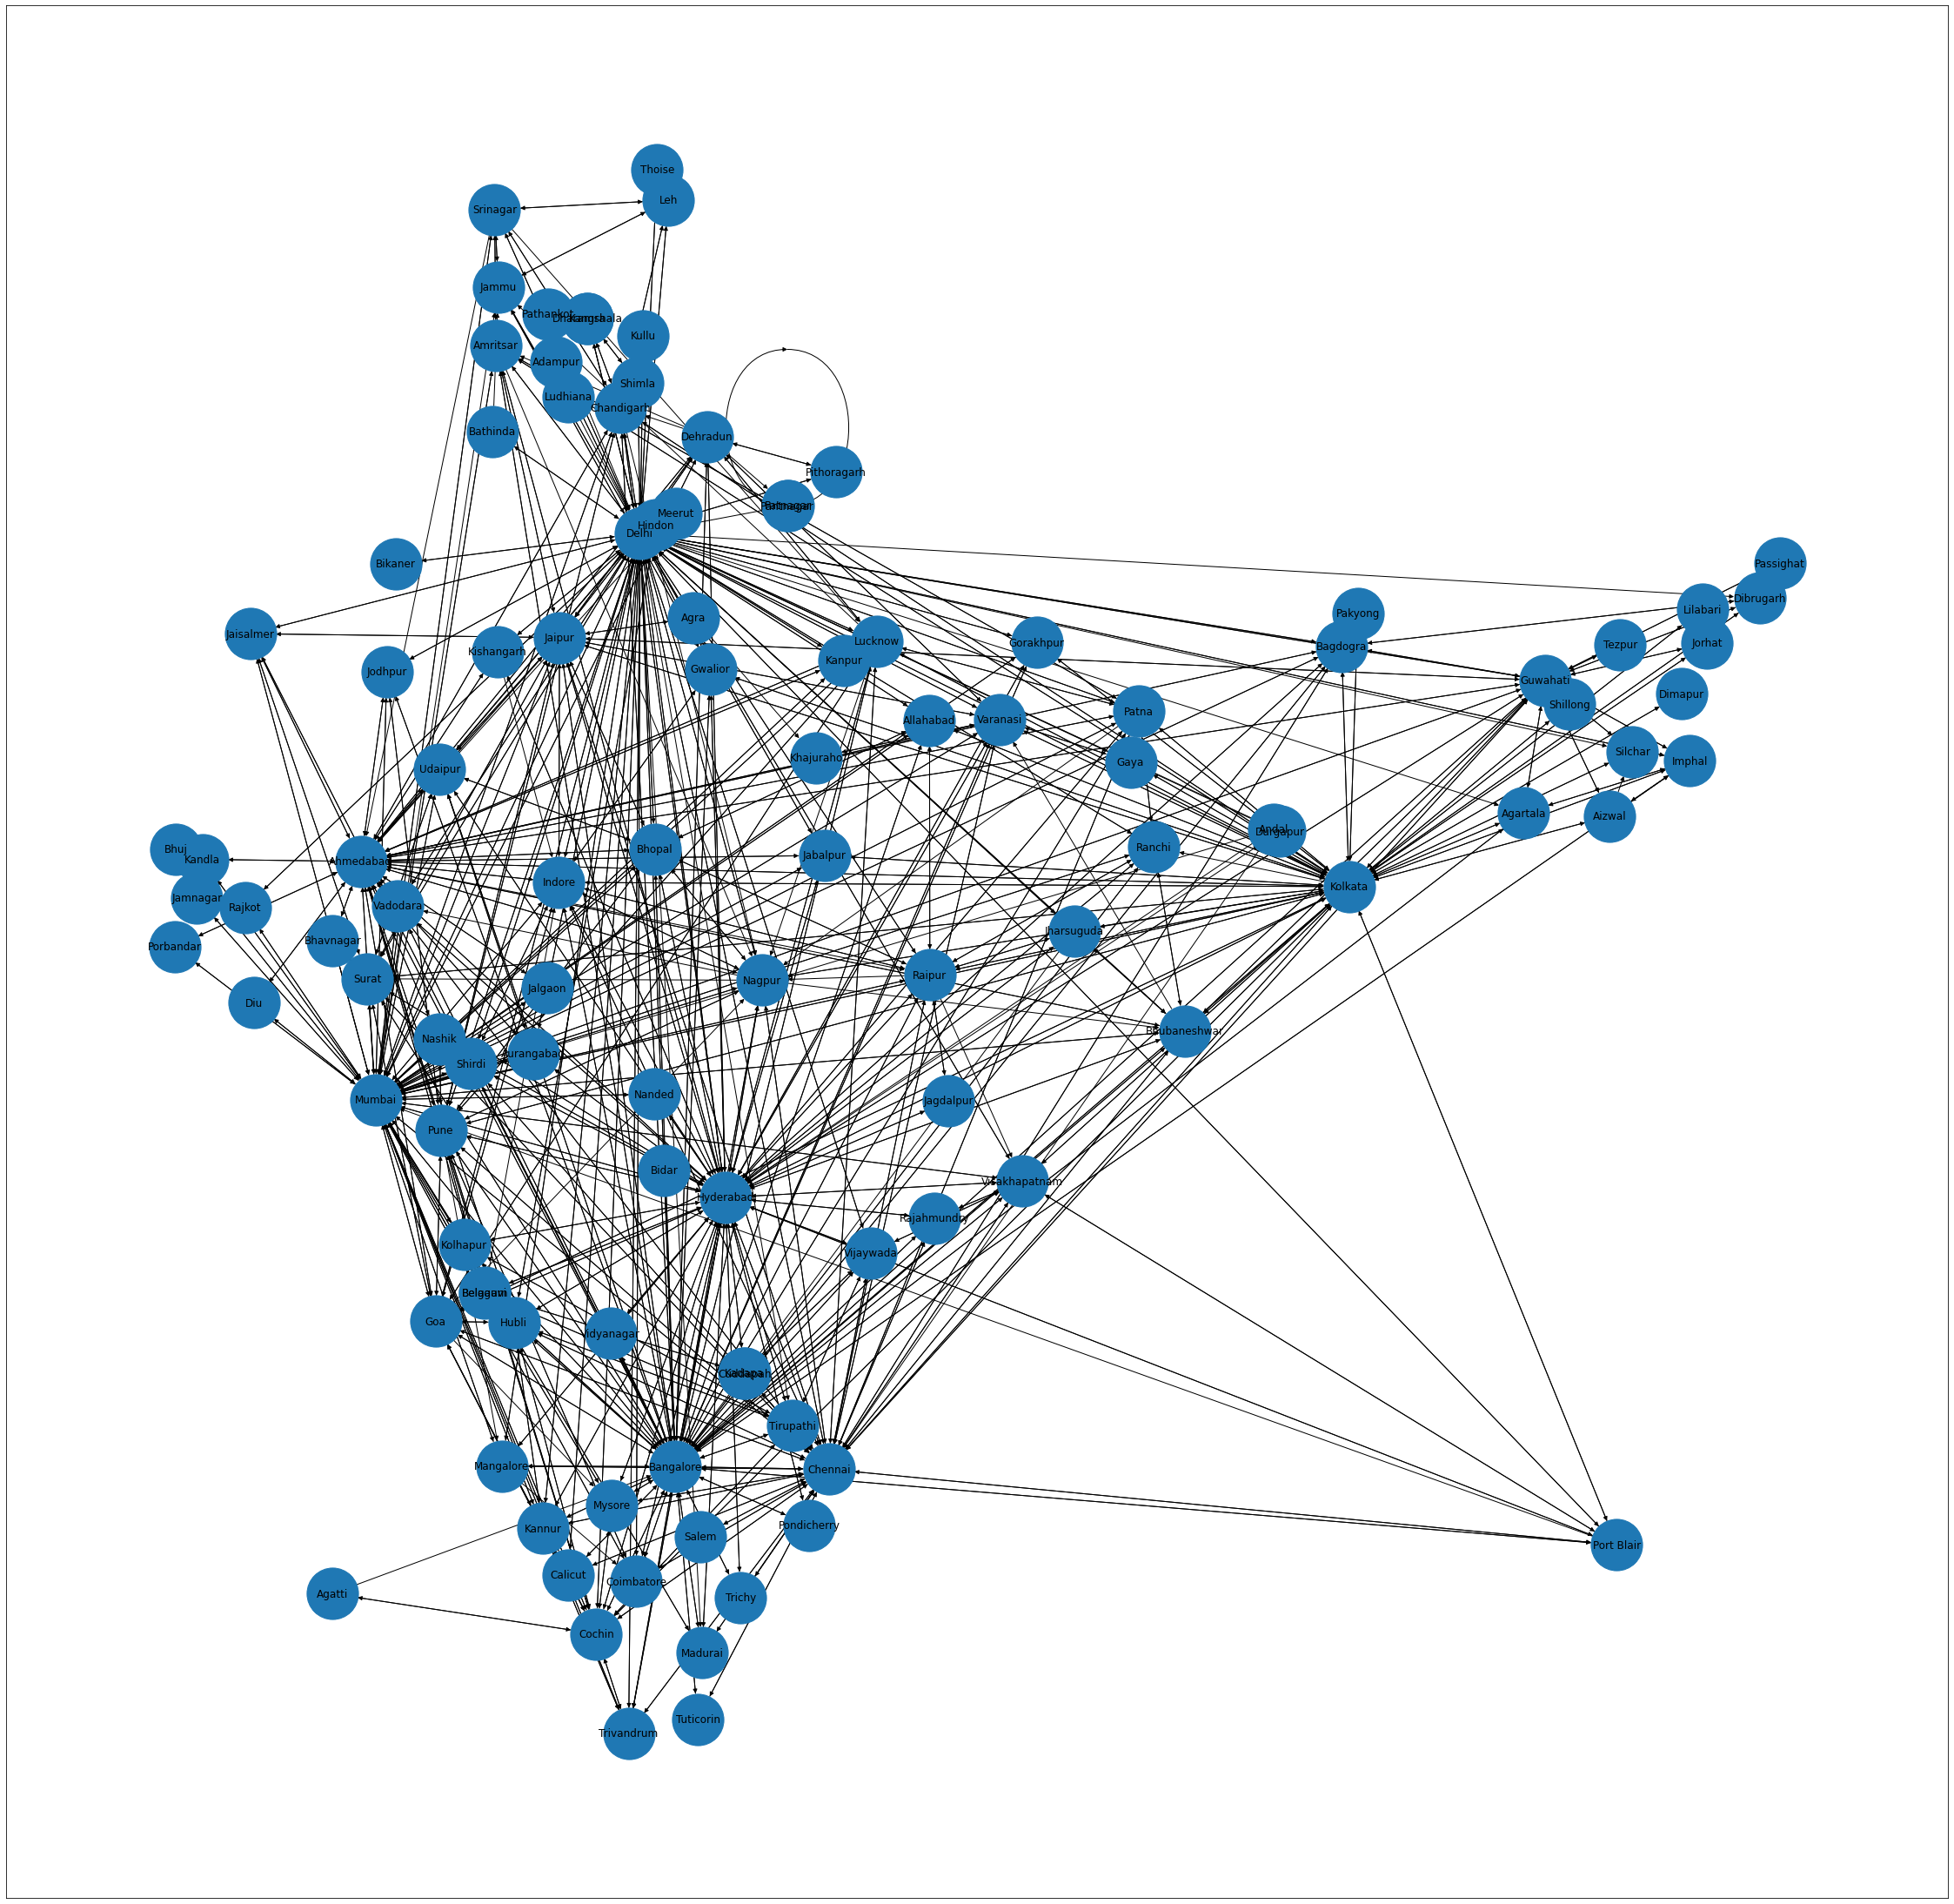

In [10]:
#indian map
plt.rcParams["figure.figsize"] = (40,40)
nx.draw_networkx(G, pos = pos, with_labels=True,node_size=3500)
plt.savefig('network_position.pdf') 

In [ ]:
plt.rcParams["figure.figsize"] = (100,100)
for i in a_list :
    degree_0=G.in_degree(i[0],'weight')
    if degree_0>=2000:
        nx.draw_networkx(G, pos = pos, with_labels=True,node_color="tab:red",node_size=4000)
    else :
        nx.draw_networkx(G, pos = pos, with_labels=True,node_size=4000)
#plt.savefig('network_position.pdf') 

In [11]:
# not nedded
"""plt.rcParams["figure.figsize"] = (40,20)
nx.draw_kamada_kawai(G,with_labels = True)
plt.savefig('network_image.pdf') """

'plt.rcParams["figure.figsize"] = (40,20)\nnx.draw_kamada_kawai(G,with_labels = True)\nplt.savefig(\'network_image.pdf\') '

In [12]:
# not nedded
"""plt.rcParams["figure.figsize"] = (40,20)
nx.draw_circular(G,with_labels = True)"""

'plt.rcParams["figure.figsize"] = (40,20)\nnx.draw_circular(G,with_labels = True)'

In [13]:
# not nedded
"""plt.rcParams["figure.figsize"] = (40,20)
nx.draw_random(G,with_labels = True)
plt.savefig('network_random.pdf') """

'plt.rcParams["figure.figsize"] = (40,20)\nnx.draw_random(G,with_labels = True)\nplt.savefig(\'network_random.pdf\') '

In [14]:
#In Degree of each node
list_1=[]
for i in a_list :
    degree_1=G.in_degree(i[0],'weight')
    list_1.append(degree_1)
    print(i[0], "has in-degree", degree_1)
len(list_1)

total_in_degree=sum(list_1)
print('Total indegree of ANI',total_in_degree)
sum_top_4_node=2527+2577+1812+1631;
percen_in_degree_of_top_4_node=((sum_top_4_node/total_in_degree)*100)
print("% of top 4 airport compared to entire network",percen_in_degree_of_top_4_node)

Delhi has in-degree 2527
Mumbai has in-degree 2577
Kolkata has in-degree 1812
Chennai has in-degree 1631
Agartala has in-degree 123
Agatti has in-degree 14
Ahmedabad has in-degree 929
Bhavnagar has in-degree 12
Porbandar has in-degree 14
Jamnagar has in-degree 7
Rajkot has in-degree 35
Bhuj has in-degree 7
Kandla has in-degree 19
Surat has in-degree 177
Vadodara has in-degree 107
Aizwal has in-degree 39
Agra has in-degree 4
Allahabad has in-degree 91
Gorakhpur has in-degree 42
Hindon has in-degree 10
Kanpur has in-degree 27
Lucknow has in-degree 384
Varanasi has in-degree 358
Adampur has in-degree 7
Amritsar has in-degree 158
Bathinda has in-degree 3
Chandigarh has in-degree 333
Bagdogra has in-degree 225
Durgapur has in-degree 11
Bangalore has in-degree 2421
Belgaum has in-degree 96
Hubli has in-degree 76
Mangalore has in-degree 150
Vidyanagar has in-degree 14
Mysore has in-degree 56
Bhopal has in-degree 173
Gwalior has in-degree 33
Indore has in-degree 294
Khajuraho has in-degree 7
J

In [15]:
# Avarage degree of Network
print("List of In degree",list_1)
total=0
for ele in range(0, len(list_1)):
    total = total + list_1[ele]
print("Sum of all elements in given list: ", total)  #sum of in degree
avg_degree=total/len(list_1)
print("Avarage degree of Network",avg_degree)

List of In degree [2527, 2577, 1812, 1631, 123, 14, 929, 12, 14, 7, 35, 7, 19, 177, 107, 39, 4, 91, 42, 10, 27, 384, 358, 7, 158, 3, 333, 225, 11, 2421, 96, 76, 150, 14, 56, 173, 33, 294, 7, 55, 255, 35, 28, 410, 116, 144, 265, 152, 63, 42, 7, 146, 21, 70, 505, 14, 50, 3, 6, 13, 28, 468, 568, 1892, 103, 7, 425, 47, 89, 20, 156, 226, 282, 62, 33, 306, 571, 92, 22, 14, 12, 90, 14, 196, 28, 77, 112, 160, 257, 225, 7, 24, 42, 19, 13, 39, 2, 4, 7, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8]
Sum of all elements in given list:  24162
Avarage degree of Network 219.65454545454546


degree :  (2577, 2527, 2421, 1892, 1812, 1631, 929, 571, 568, 505, 468, 425, 410, 384, 358, 333, 306, 294, 282, 265, 257, 255, 226, 225, 196, 177, 173, 160, 158, 156, 152, 150, 146, 144, 123, 116, 112, 107, 103, 96, 92, 91, 90, 89, 77, 76, 70, 63, 62, 56, 55, 50, 47, 42, 39, 35, 33, 28, 27, 24, 22, 21, 20, 19, 14, 13, 12, 11, 10, 8, 7, 6, 4, 3, 2, 0)
repetition :  (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 6, 2, 3, 1, 1, 1, 8, 1, 2, 2, 1, 9)


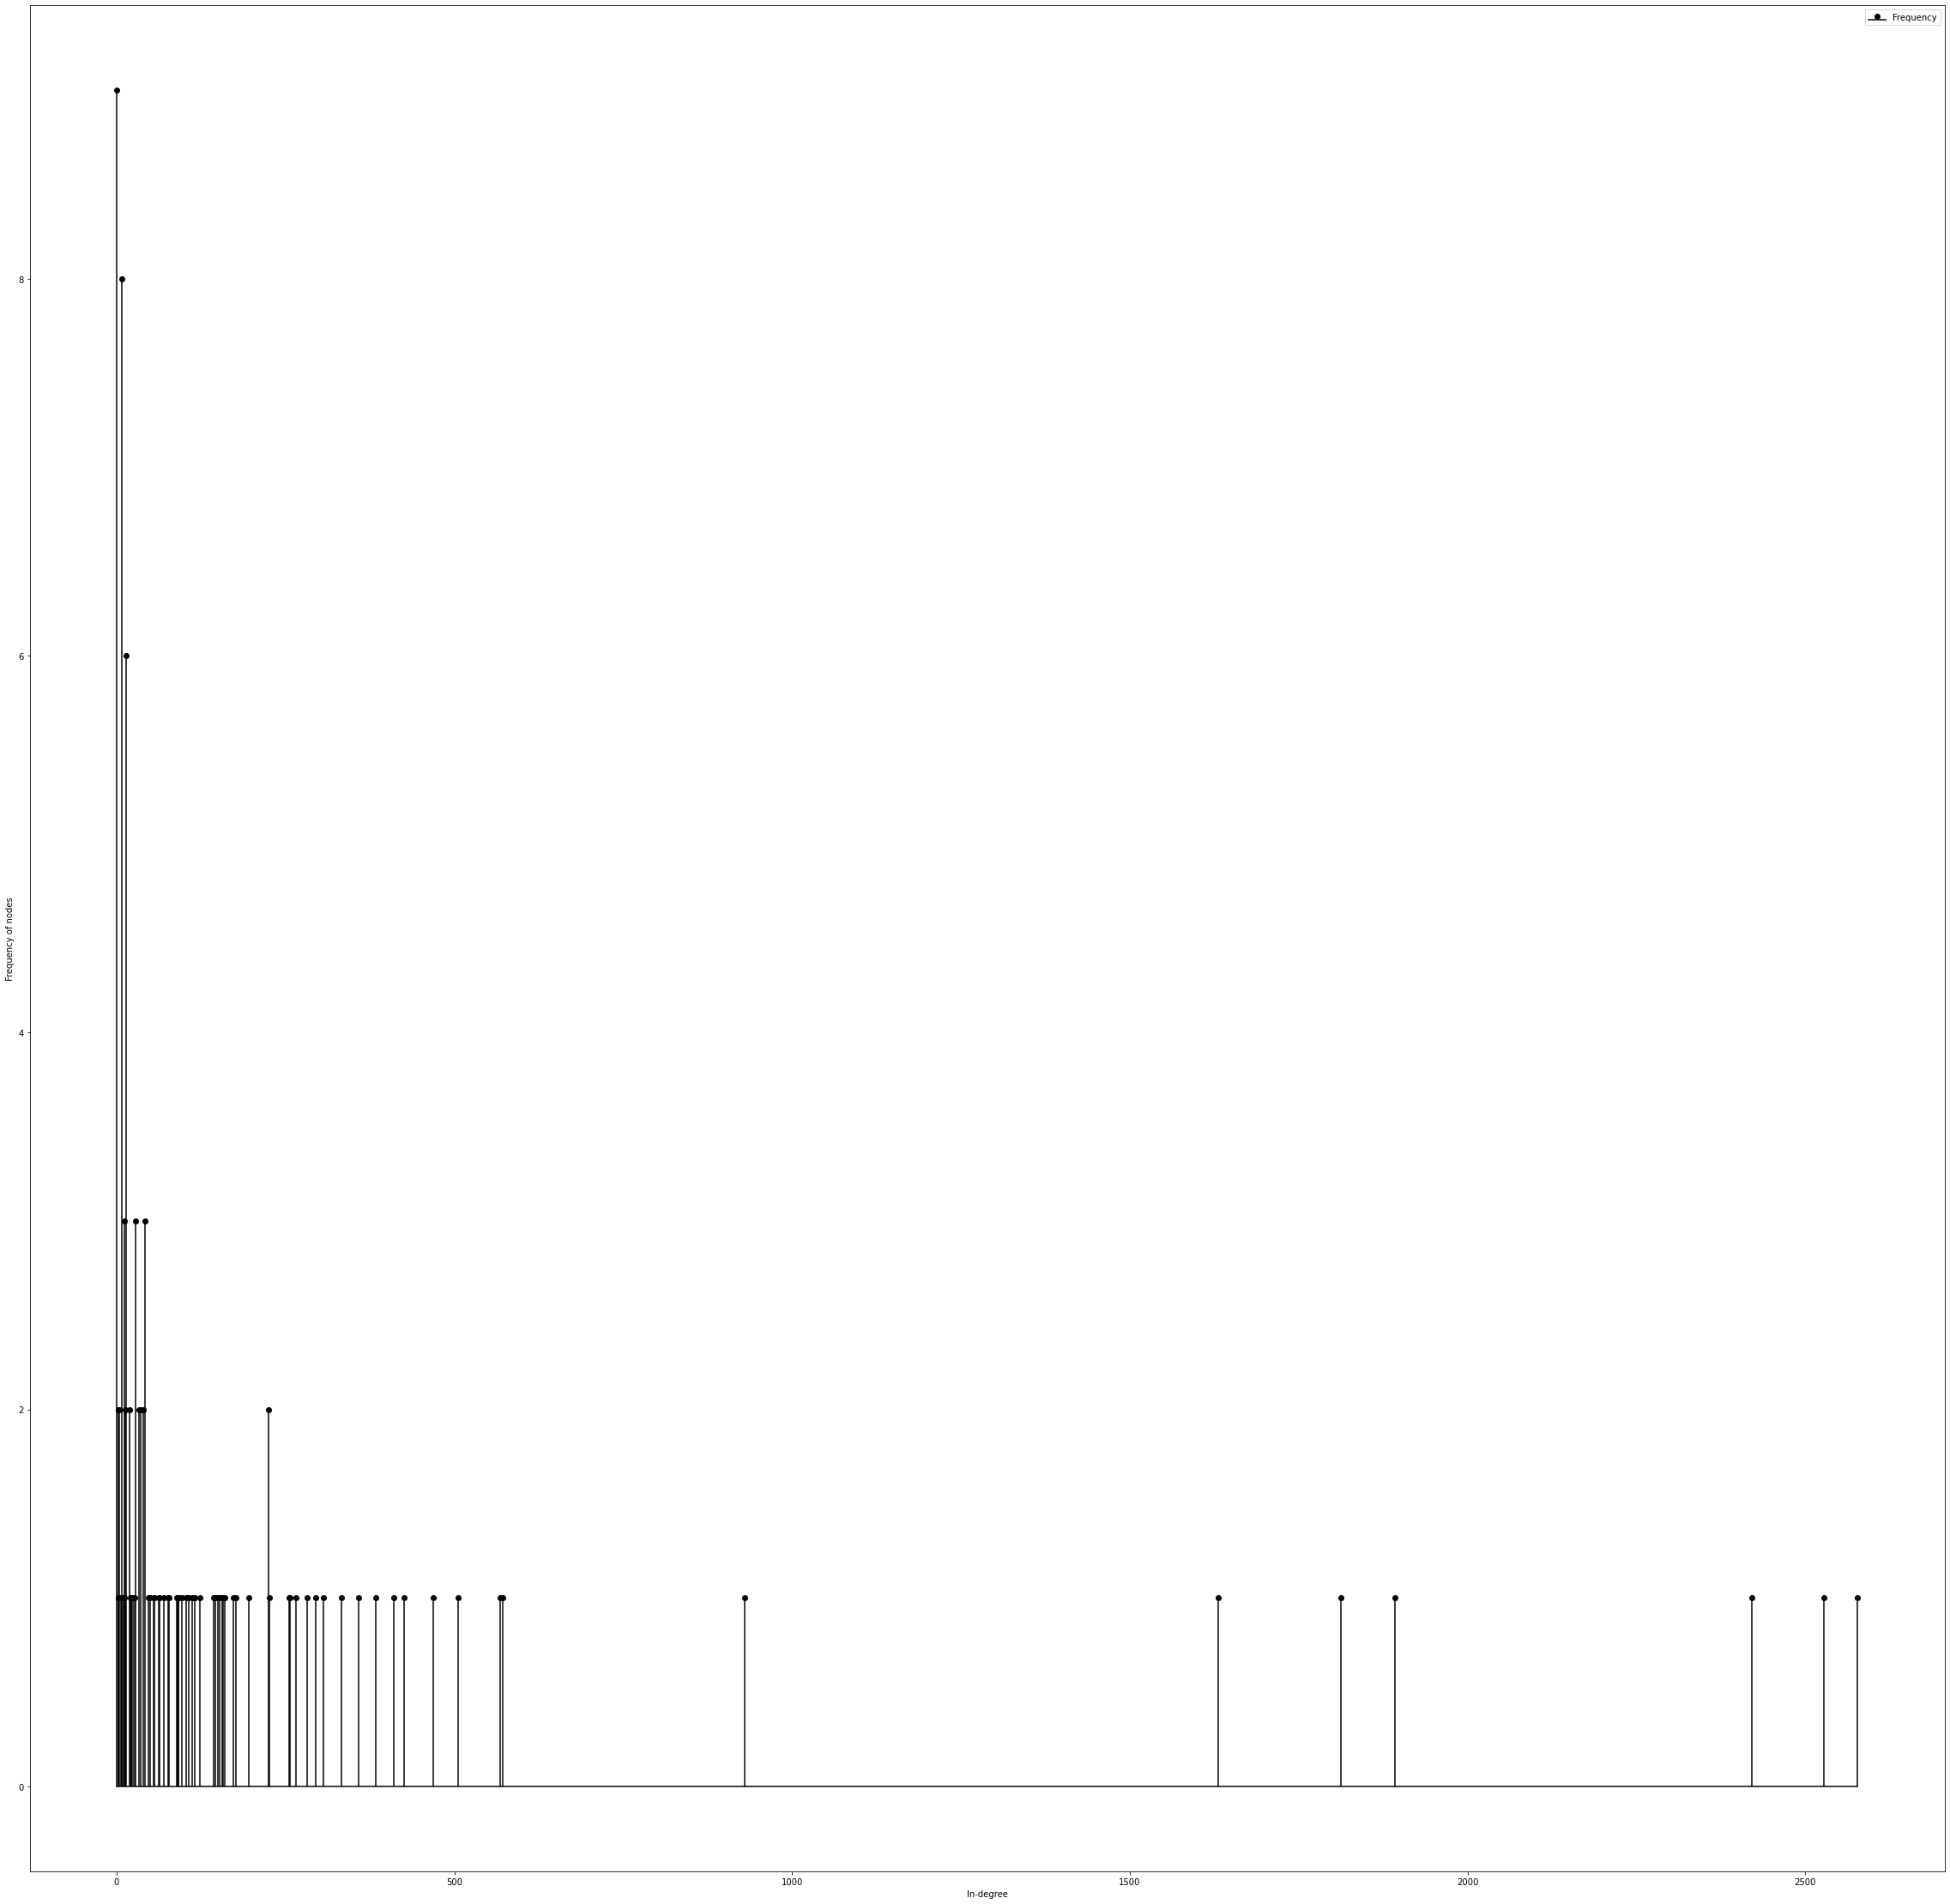

In [19]:
#weighted In degree distribution # no need later it has drawn 
import collections
degree_sequence=sorted([d for n,d in G.in_degree(weight='weight')],reverse=True)
degreeCount=collections.Counter(degree_sequence)
deg, cnt=zip(*degreeCount.items())   #cnt=list of the number of presence of a degree in network  
fig, ax=plt.subplots()               #deg=list of all degree in network 
#plt.bar(deg, cnt, width=20, color="r")
plt.stem(deg, cnt,linefmt='k-', markerfmt='ko', basefmt='k-')
#plt.title('Degree Distribution')
plt.xlabel('In-degree')
plt.ylabel('Frequency of nodes')
plt.legend(['Frequency'])
plt.savefig('in-degree distribution.pdf') 
print("degree : ",deg)
print("repetition : ",cnt)

In [20]:
"""#scatter plot #####not needed
plt.scatter(deg, cnt)
plt.show()"""

'#scatter plot #####not needed\nplt.scatter(deg, cnt)\nplt.show()'

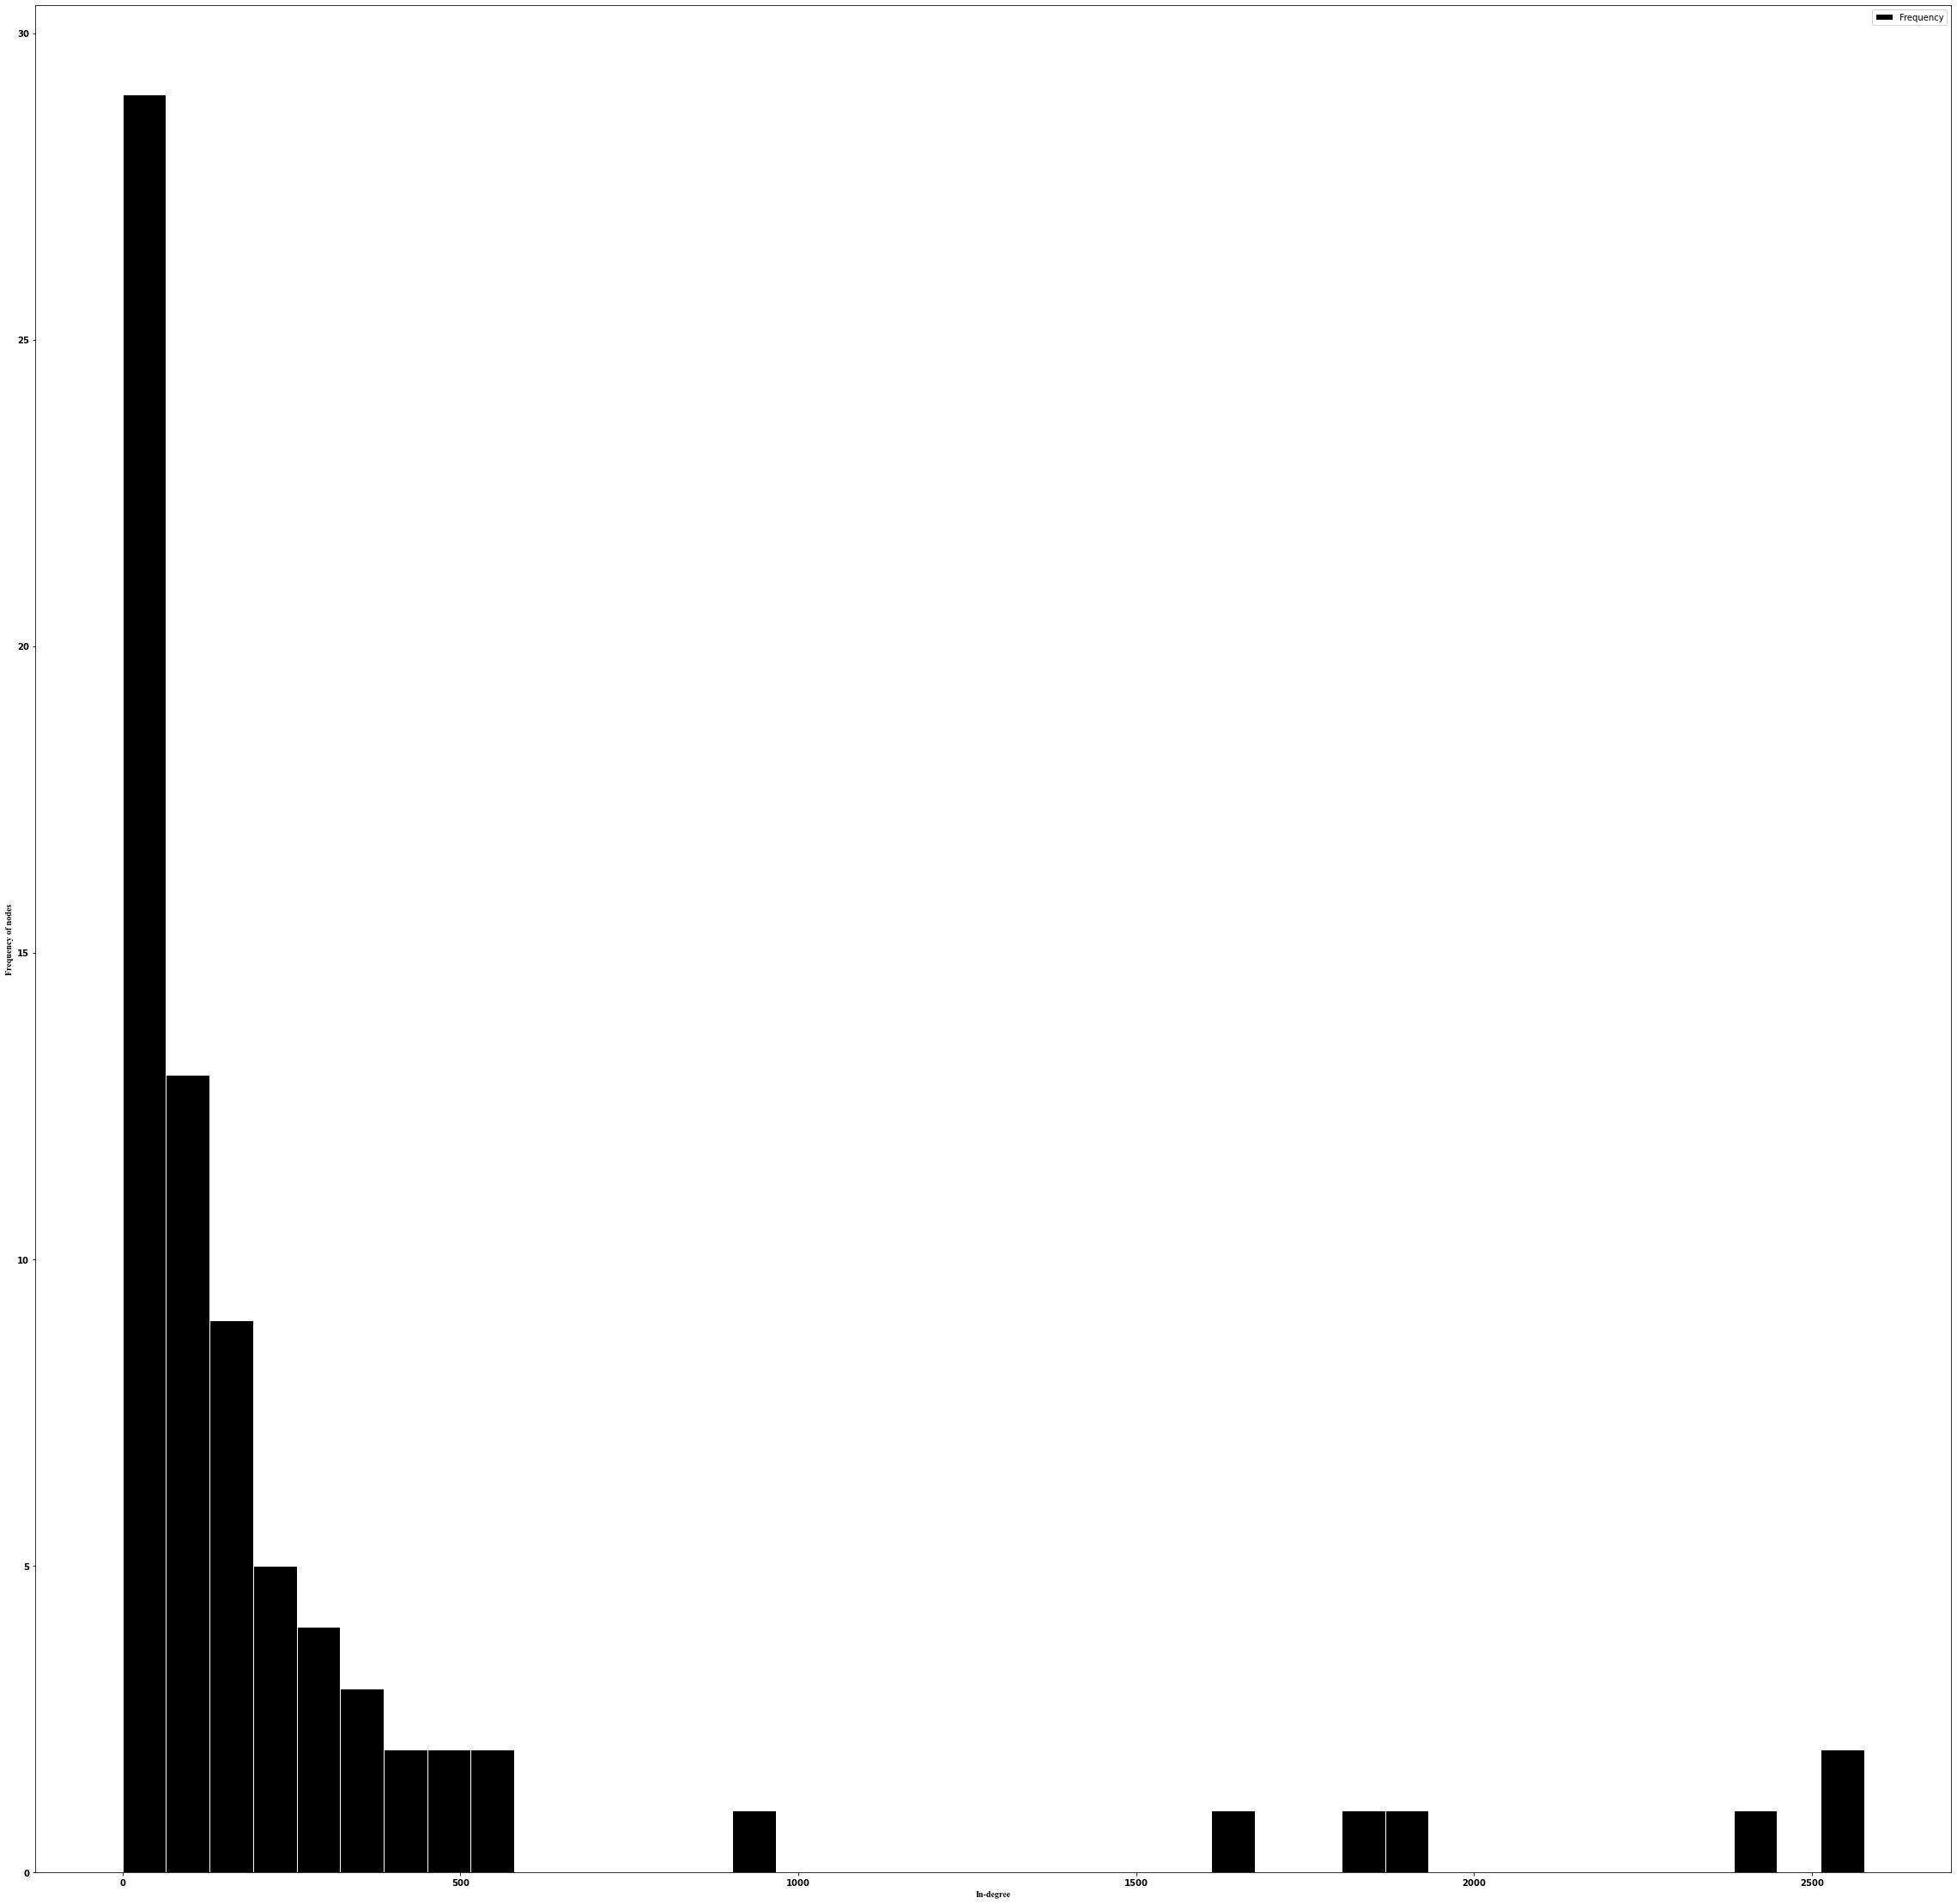

In [22]:
# in degree distribution
# repetation of number of flight per week
plt.hist(deg, bins=40,color='black',edgecolor='white')

plt.xlabel('In-degree',fontname='Times New Roman',weight="bold")
plt.ylabel('Frequency of nodes',fontname='Times New Roman',weight="bold")
plt.legend(['Frequency'])
plt.savefig('in-degree distribution.pdf') 
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [23]:
"""df = sns.load_dataset('iris')
sns.distplot(df[deg],kde = False)"""

"df = sns.load_dataset('iris')\nsns.distplot(df[deg],kde = False)"

In [24]:
"""deg=deg[:-1]
cnt=cnt[:-1]
log_deg=[]
log_cnt=[]
for inti in range(len(deg)):
    log_d=math.log10(deg[inti])
    log_deg.append(log_d)
    log_c=math.log10(cnt[inti])
    log_cnt.append(log_c)
plt.plot(log_deg,log_cnt,'r-o')
plt.show()"""

"deg=deg[:-1]\ncnt=cnt[:-1]\nlog_deg=[]\nlog_cnt=[]\nfor inti in range(len(deg)):\n    log_d=math.log10(deg[inti])\n    log_deg.append(log_d)\n    log_c=math.log10(cnt[inti])\n    log_cnt.append(log_c)\nplt.plot(log_deg,log_cnt,'r-o')\nplt.show()"

In [25]:
#pip install powerlaw

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
2.2424160298090836 0.024934496749058992
alpha value 2.0191789426370974


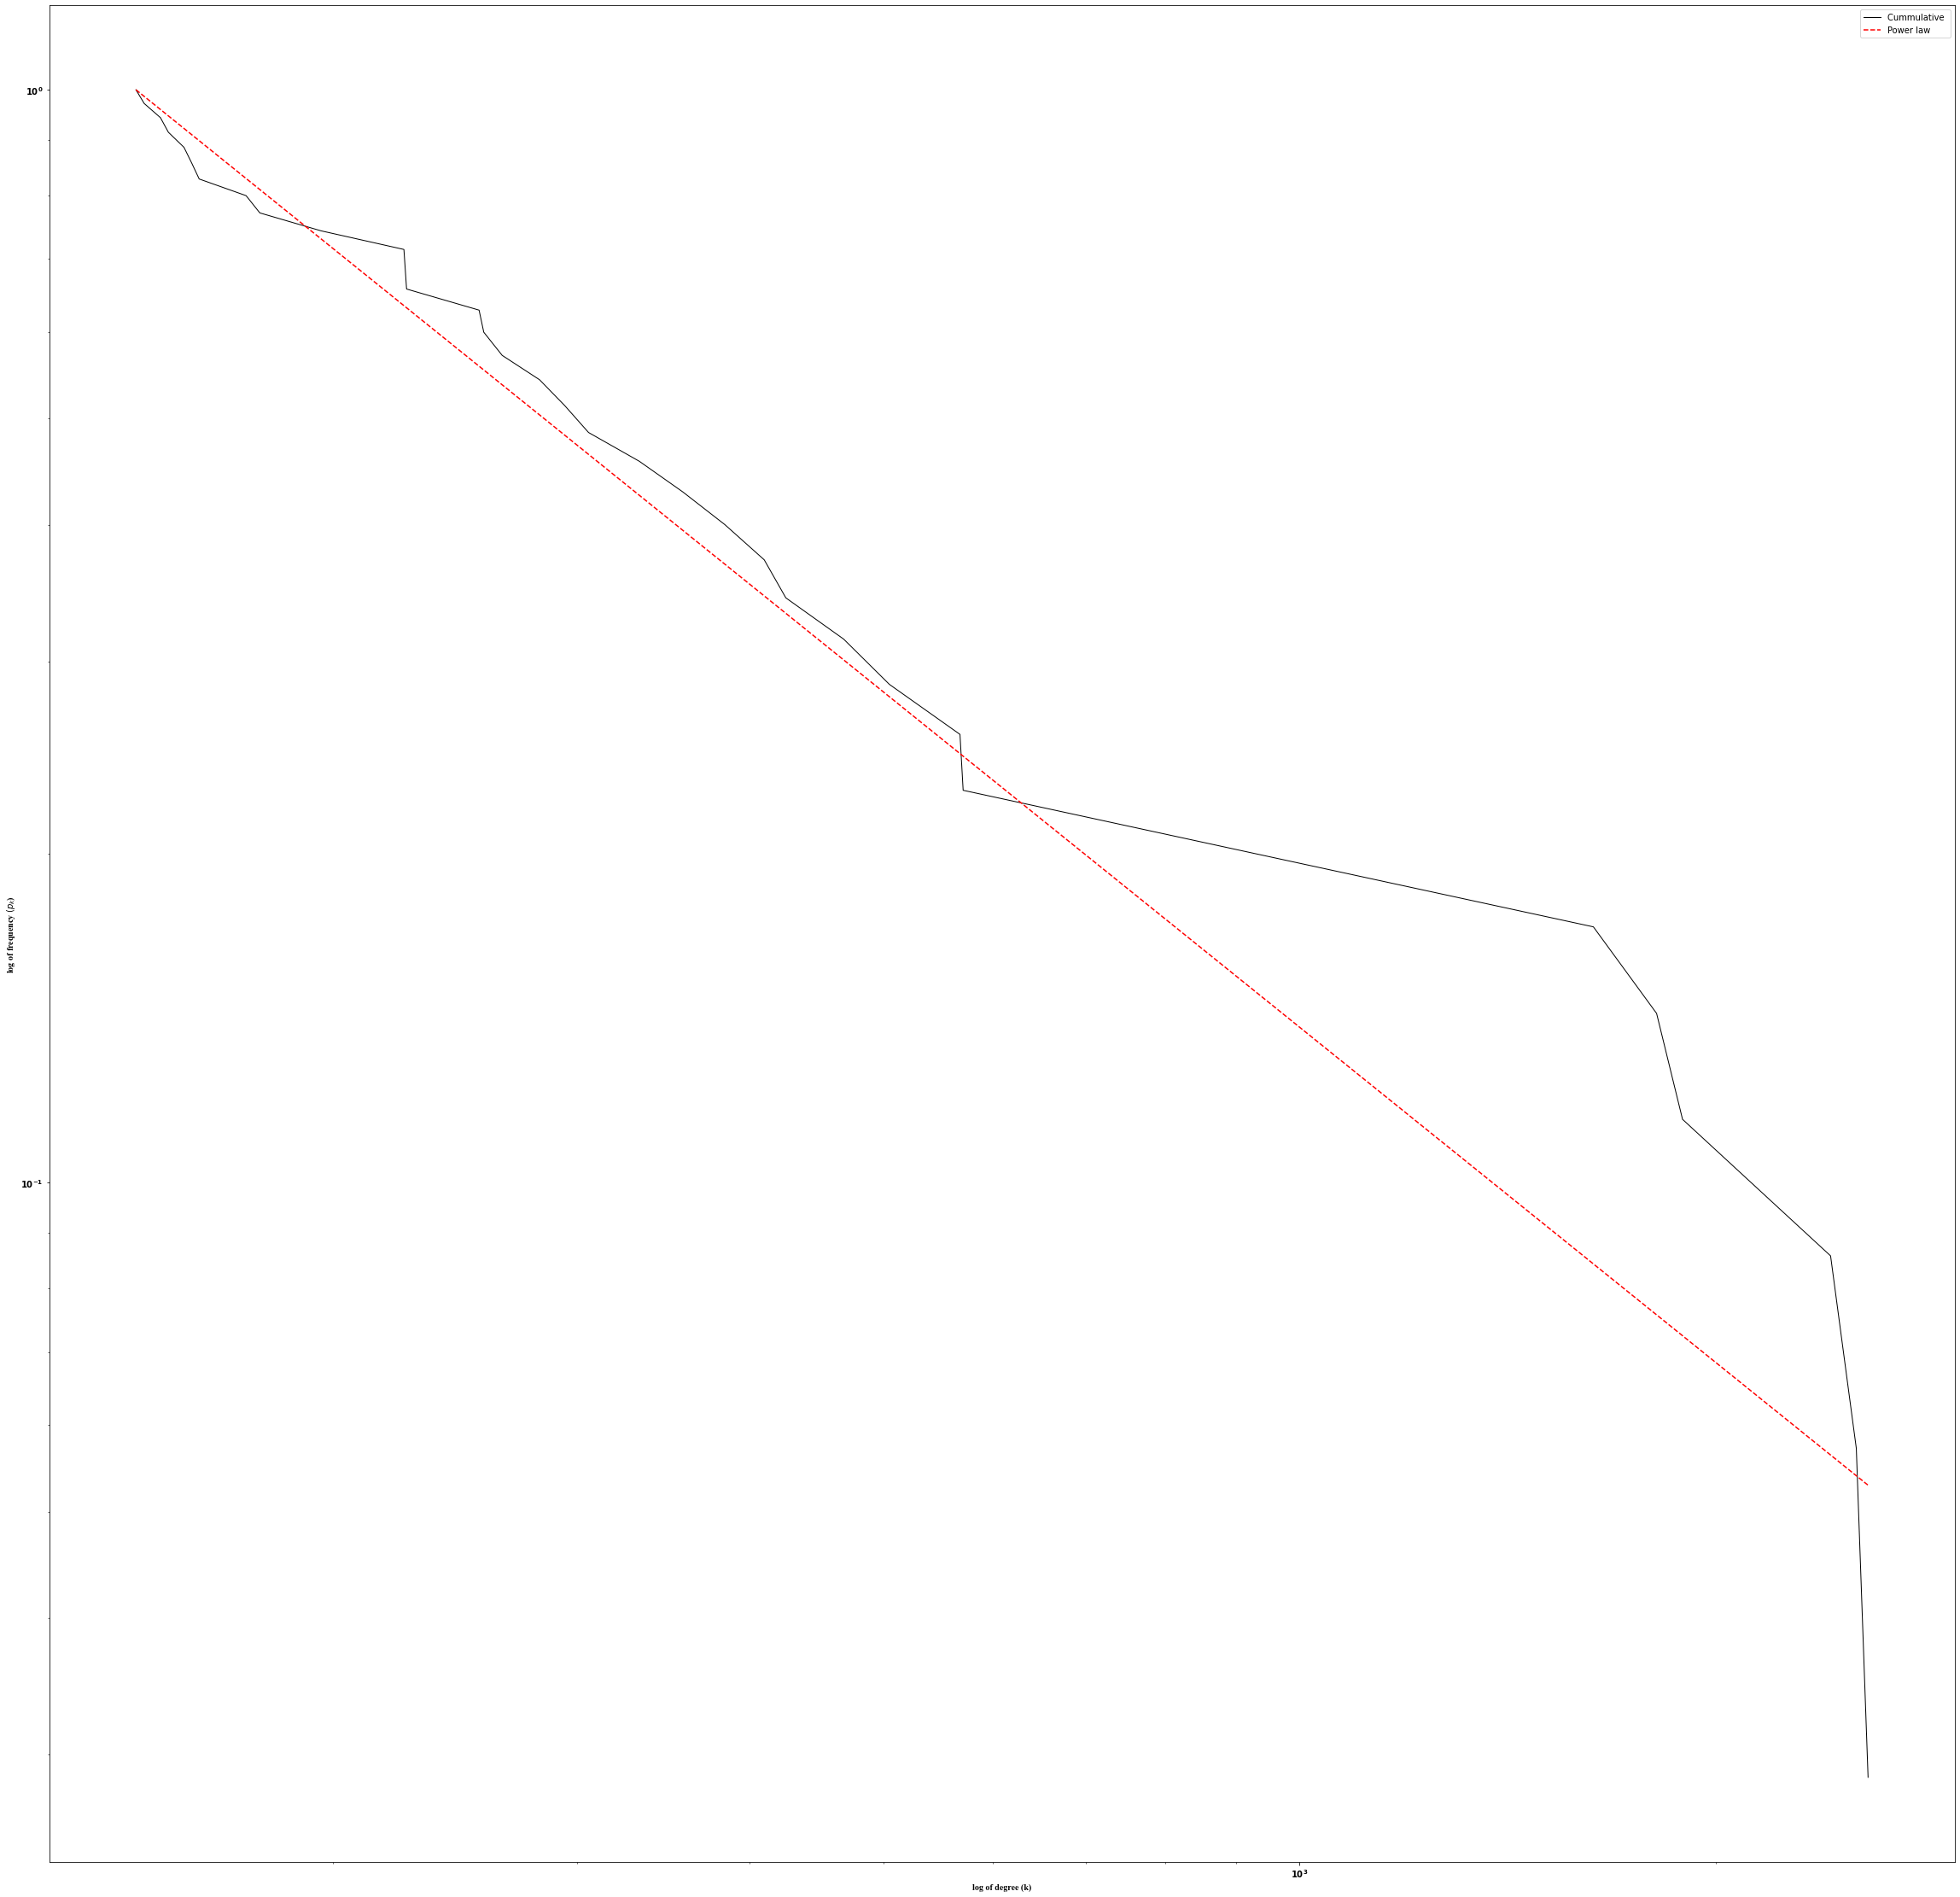

In [26]:
# Cummulative degree distribution and power-law approximation
import powerlaw 
fit = powerlaw.Fit(degree_sequence)
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print (R, p)
fig, ax=plt.subplots()
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=1, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw

plt.xlabel('log of degree (k)',fontname='Times New Roman',weight="bold")
plt.ylabel('log of frequency $(p_{k}$)',fontname='Times New Roman',weight="bold") #$Y_{axis}$
plt.legend(['Cummulative ','Power law'])
plt.yticks(weight="bold")
plt.xticks(weight="bold")
print('alpha value',fit.power_law.alpha)
plt.savefig('power law.pdf') 
###########                           STOP HERE
###########                           STOP HERE
###########                           STOP HERE
############################################################################################

##########################################################




###########                           STOP HERE




##########                       Run Networkx_2 for other simulation

In [27]:
# Average Shortest Path of unweighted graph
avg_shortest_path=nx.average_shortest_path_length(G, weight=None)#, method=None)
print(avg_shortest_path)

2.0079232693911595


In [28]:
#data taking between airport for table 1 (shortest path)
from collections import defaultdict
list_wt_1_element=[]
list_wt_2_element=[]
list_wt_3_element=[]
list_wt_4_element=[]
list_wt_5_element=[]
##


list_wt_6_element=[]
for i in a_list:
    for j in a_list: 
       # print([p for p in nx.all_shortest_paths(G, source=i[0], target=j[0])])
        try:   
            shtst_pat_list=([p for p in nx.all_shortest_paths(G, source=i[0], target=j[0])])
            print('source and destination',shtst_pat_list)
            count = 0
            for listElem in shtst_pat_list:
                count += len(listElem)                    
                print('Total Number of elements : ', count)
                if count == 1:
                    list_wt_1_element.append(count)
                if count == 2:
                    list_wt_2_element.append(count)  
                if count == 3:
                    list_wt_3_element.append(count)
                if count == 4:
                    list_wt_4_element.append(count)
                if count == 5:
                    list_wt_5_element.append(count)
                
        except nx.exception.NetworkXNoPath:
            continue
print("Number of path with shortest path lenght 1 :",len(list_wt_1_element))
print("Number of path with shortest path lenght 2 :",len(list_wt_2_element))
print("Number of path with shortest path lenght 3 :",len(list_wt_3_element))
print("Number of path with shortest path lenght 4 :",len(list_wt_4_element))
print("Number of path with shortest path lenght 5 :",len(list_wt_5_element))
#print("Number of path with shortest path lenght 3 :",len(list_wt_6_element))







source and destination [['Delhi']]
Total Number of elements :  1
source and destination [['Delhi', 'Mumbai']]
Total Number of elements :  2
source and destination [['Delhi', 'Kolkata']]
Total Number of elements :  2
source and destination [['Delhi', 'Chennai']]
Total Number of elements :  2
source and destination [['Delhi', 'Agartala']]
Total Number of elements :  2
source and destination [['Delhi', 'Cochin', 'Agatti']]
Total Number of elements :  3
source and destination [['Delhi', 'Ahmedabad']]
Total Number of elements :  2
source and destination [['Delhi', 'Ahmedabad', 'Bhavnagar'], ['Delhi', 'Surat', 'Bhavnagar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Delhi', 'Ahmedabad', 'Porbandar'], ['Delhi', 'Mumbai', 'Porbandar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Delhi', 'Mumbai', 'Jamnagar']]
Total Number of elements :  3
source and destination [['Delhi', 'Rajkot']]
Total Number of elements : 

Total Number of elements :  2
source and destination [['Mumbai', 'Lucknow']]
Total Number of elements :  2
source and destination [['Mumbai', 'Varanasi']]
Total Number of elements :  2
source and destination [['Mumbai', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Mumbai', 'Amritsar']]
Total Number of elements :  2
source and destination [['Mumbai', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['Mumbai', 'Chandigarh']]
Total Number of elements :  2
source and destination [['Mumbai', 'Bagdogra']]
Total Number of elements :  2
source and destination [['Mumbai', 'Delhi', 'Durgapur'], ['Mumbai', 'Hyderabad', 'Durgapur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Mumbai', 'Bangalore']]
Total Number of elements :  2
source and destination [['Mumbai', 'Belgaum']]
Total Number of elements :  2
source and destination [['Mumbai', 'Hubli']]
Total Number of elements :  2
source and destinatio

source and destination [['Kolkata', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['Kolkata', 'Chandigarh']]
Total Number of elements :  2
source and destination [['Kolkata', 'Bagdogra']]
Total Number of elements :  2
source and destination [['Kolkata', 'Delhi', 'Durgapur'], ['Kolkata', 'Hyderabad', 'Durgapur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kolkata', 'Bangalore']]
Total Number of elements :  2
source and destination [['Kolkata', 'Ahmedabad', 'Belgaum'], ['Kolkata', 'Bangalore', 'Belgaum'], ['Kolkata', 'Hyderabad', 'Belgaum'], ['Kolkata', 'Mumbai', 'Belgaum'], ['Kolkata', 'Pune', 'Belgaum']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Kolkata', 'Ahmedabad', 'Hubli'], ['Kolkata', 'Bangalore', 'Hubli'], ['Kolkata', 'Cochin', 'Hubli'], ['Kolkata', 'Chennai', 'Hubli'], ['Ko

source and destination [['Kolkata', 'Bangalore', 'Pondicherry'], ['Kolkata', 'Hyderabad', 'Pondicherry']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kolkata', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Lucknow', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Varanasi', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Delhi', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Hyderabad', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Jaipur', 'Dehradun', 'Pantnagar'], ['Kolkata', 'Mumbai', 'Dehradun', 'Pantnagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Chennai', 'Delhi']]
Total Number of elements :  2
source and destination [['Chennai', 'Mumbai']]
Total Number of elements :  2
source and desti

Total Number of elements :  6
source and destination [['Chennai', 'Ahmedabad', 'Aurangabad'], ['Chennai', 'Delhi', 'Aurangabad'], ['Chennai', 'Hyderabad', 'Aurangabad'], ['Chennai', 'Mumbai', 'Aurangabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Chennai', 'Bangalore', 'Kolhapur'], ['Chennai', 'Hyderabad', 'Kolhapur'], ['Chennai', 'Mumbai', 'Kolhapur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Chennai', 'Nagpur']]
Total Number of elements :  2
source and destination [['Chennai', 'Pune']]
Total Number of elements :  2
source and destination [['Chennai', 'Shirdi']]
Total Number of elements :  2
source and destination [['Chennai', 'Ahmedabad', 'Nashik'], ['Chennai', 'Hyderabad', 'Nashik'], ['Chennai', 'Pune', 'Nashik']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
s

Total Number of elements :  4
Total Number of elements :  8
source and destination [['Agartala', 'Kolkata', 'Jabalpur']]
Total Number of elements :  3
source and destination [['Agartala', 'Kolkata', 'Bhubaneshwar'], ['Agartala', 'Bangalore', 'Bhubaneshwar'], ['Agartala', 'Guwahati', 'Bhubaneshwar']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Agartala', 'Kolkata', 'Jharsuguda']]
Total Number of elements :  3
source and destination [['Agartala', 'Bangalore', 'Calicut']]
Total Number of elements :  3
source and destination [['Agartala', 'Kolkata', 'Cochin'], ['Agartala', 'Bangalore', 'Cochin']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Agartala', 'Bangalore', 'Kannur']]
Total Number of elements :  3
source and destination [['Agartala', 'Bangalore', 'Trivandrum']]
Total Number of elements :  3
source and destination [['Agartala', 'Bangalore', 'Coimbatore']]
Total Number of e

source and destination [['Agartala', 'Bangalore', 'Dehradun', 'Pantnagar']]
Total Number of elements :  4
source and destination [['Agatti', 'Bangalore', 'Delhi'], ['Agatti', 'Cochin', 'Delhi']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Agatti', 'Bangalore', 'Mumbai'], ['Agatti', 'Cochin', 'Mumbai']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Agatti', 'Bangalore', 'Kolkata'], ['Agatti', 'Cochin', 'Kolkata']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Agatti', 'Bangalore', 'Chennai'], ['Agatti', 'Cochin', 'Chennai']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Agatti', 'Bangalore', 'Agartala']]
Total Number of elements :  3
source and destination [['Agatti']]
Total Number of elements :  1
source and destination [['Agatti', 'Bangalore', 'Ahmedabad'], ['Agatti', 'Cochin', 'Ahmedabad']]
Total Number of elements :  3
Tota

source and destination [['Agatti', 'Bangalore', 'Delhi', 'Bikaner'], ['Agatti', 'Cochin', 'Delhi', 'Bikaner']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Agatti', 'Bangalore', 'Jaipur']]
Total Number of elements :  3
source and destination [['Agatti', 'Bangalore', 'Jaisalmer']]
Total Number of elements :  3
source and destination [['Agatti', 'Bangalore', 'Jodhpur']]
Total Number of elements :  3
source and destination [['Agatti', 'Bangalore', 'Ahmedabad', 'Kishangarh'], ['Agatti', 'Cochin', 'Ahmedabad', 'Kishangarh'], ['Agatti', 'Bangalore', 'Delhi', 'Kishangarh'], ['Agatti', 'Cochin', 'Delhi', 'Kishangarh'], ['Agatti', 'Bangalore', 'Hyderabad', 'Kishangarh'], ['Agatti', 'Cochin', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Agatti', 'Bangalore', 'Udaipu

Total Number of elements :  2
source and destination [['Ahmedabad', 'Delhi', 'Durgapur'], ['Ahmedabad', 'Hyderabad', 'Durgapur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Ahmedabad', 'Bangalore']]
Total Number of elements :  2
source and destination [['Ahmedabad', 'Belgaum']]
Total Number of elements :  2
source and destination [['Ahmedabad', 'Hubli']]
Total Number of elements :  2
source and destination [['Ahmedabad', 'Bangalore', 'Mangalore'], ['Ahmedabad', 'Chennai', 'Mangalore'], ['Ahmedabad', 'Delhi', 'Mangalore'], ['Ahmedabad', 'Hyderabad', 'Mangalore'], ['Ahmedabad', 'Mumbai', 'Mangalore'], ['Ahmedabad', 'Pune', 'Mangalore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Ahmedabad', 'Bangalore', 'Vidyanagar'], ['Ahmedabad', 'Hyderabad', 'Vidyanagar']]
Total Number of element

source and destination [['Ahmedabad', 'Chandigarh', 'Dharamshala'], ['Ahmedabad', 'Delhi', 'Dharamshala']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Ahmedabad', 'Chandigarh', 'Kullu'], ['Ahmedabad', 'Delhi', 'Kullu']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Ahmedabad', 'Chandigarh', 'Shimla'], ['Ahmedabad', 'Delhi', 'Shimla']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Ahmedabad', 'Diu']]
Total Number of elements :  2
source and destination [['Ahmedabad', 'Chandigarh', 'Leh'], ['Ahmedabad', 'Delhi', 'Leh']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Ahmedabad', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Ahmedabad', 'Guwahati', 'Passighat']]
Total Number of elements :  3
source and destination [['Ahmedabad', 'Kolkata', 'Pakyong']]
Total Number of elements :  3
source and destinatio

Total Number of elements :  6
source and destination [['Bhavnagar', 'Mumbai', 'Kannur']]
Total Number of elements :  3
source and destination [['Bhavnagar', 'Mumbai', 'Trivandrum']]
Total Number of elements :  3
source and destination [['Bhavnagar', 'Mumbai', 'Coimbatore']]
Total Number of elements :  3
source and destination [['Bhavnagar', 'Mumbai', 'Madurai']]
Total Number of elements :  3
source and destination [['Bhavnagar', 'Ahmedabad', 'Bangalore', 'Trichy'], ['Bhavnagar', 'Surat', 'Bangalore', 'Trichy'], ['Bhavnagar', 'Mumbai', 'Bangalore', 'Trichy'], ['Bhavnagar', 'Ahmedabad', 'Chennai', 'Trichy'], ['Bhavnagar', 'Surat', 'Chennai', 'Trichy'], ['Bhavnagar', 'Mumbai', 'Chennai', 'Trichy'], ['Bhavnagar', 'Ahmedabad', 'Hyderabad', 'Trichy'], ['Bhavnagar', 'Surat', 'Hyderabad', 'Trichy'], ['Bhavnagar', 'Mumbai', 'Hyderabad', 'Trichy']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements : 

source and destination [['Bhavnagar', 'Ahmedabad', 'Delhi', 'Thoise'], ['Bhavnagar', 'Surat', 'Delhi', 'Thoise'], ['Bhavnagar', 'Mumbai', 'Delhi', 'Thoise']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Bhavnagar', 'Ahmedabad', 'Guwahati', 'Passighat'], ['Bhavnagar', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Bhavnagar', 'Ahmedabad', 'Kolkata', 'Pakyong'], ['Bhavnagar', 'Surat', 'Kolkata', 'Pakyong'], ['Bhavnagar', 'Mumbai', 'Kolkata', 'Pakyong']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Bhavnagar', 'Ahmedabad', 'Bangalore', 'Pondicherry'], ['Bhavnagar', 'Surat', 'Bangalore', 'Pondicherry'], ['Bhavnagar', 'Mumbai', 'Bangalore', 'Pondicherry'], ['Bhavnagar', 'Ahmedabad', 'Hyderabad', 'Pondicherry'], ['Bhavnagar', 'Surat', 'Hyderabad', 'Pondicherry'], ['Bhavnagar',

source and destination [['Porbandar', 'Ahmedabad', 'Bagdogra', 'Dibrugarh'], ['Porbandar', 'Mumbai', 'Bagdogra', 'Dibrugarh'], ['Porbandar', 'Ahmedabad', 'Kolkata', 'Dibrugarh'], ['Porbandar', 'Mumbai', 'Kolkata', 'Dibrugarh'], ['Porbandar', 'Ahmedabad', 'Delhi', 'Dibrugarh'], ['Porbandar', 'Mumbai', 'Delhi', 'Dibrugarh'], ['Porbandar', 'Ahmedabad', 'Guwahati', 'Dibrugarh'], ['Porbandar', 'Mumbai', 'Guwahati', 'Dibrugarh']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Porbandar', 'Ahmedabad', 'Guwahati'], ['Porbandar', 'Mumbai', 'Guwahati']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Porbandar', 'Ahmedabad', 'Kolkata', 'Jorhat'], ['Porbandar', 'Mumbai', 'Kolkata', 'Jorhat'], ['Porbandar', 'Ahmedabad', 'Guwahati', 'Jorhat

source and destination [['Porbandar', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Porbandar', 'Mumbai', 'Dehradun', 'Pantnagar']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Jamnagar', 'Mumbai', 'Delhi']]
Total Number of elements :  3
source and destination [['Jamnagar', 'Mumbai']]
Total Number of elements :  2
source and destination [['Jamnagar', 'Mumbai', 'Kolkata']]
Total Number of elements :  3
source and destination [['Jamnagar', 'Mumbai', 'Chennai']]
Total Number of elements :  3
source and destination [['Jamnagar', 'Mumbai', 'Kolkata', 'Agartala'], ['Jamnagar', 'Mumbai', 'Bangalore', 'Agartala'], ['Jamnagar', 'Mumbai', 'Delhi', 'Agartala'], ['Jamnagar', 'Mumbai', 'Guwahati', 'Agartala']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Jamnagar', 'Mumbai', 'Cochin', 'Agatti']]
Total Number of elements :  4
source and destination [['Jamnagar', 

source and destination [['Jamnagar', 'Mumbai', 'Bangalore', 'Tirupathi'], ['Jamnagar', 'Mumbai', 'Hubli', 'Tirupathi'], ['Jamnagar', 'Mumbai', 'Cochin', 'Tirupathi'], ['Jamnagar', 'Mumbai', 'Delhi', 'Tirupathi'], ['Jamnagar', 'Mumbai', 'Hyderabad', 'Tirupathi'], ['Jamnagar', 'Mumbai', 'Kolhapur', 'Tirupathi']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Jamnagar', 'Mumbai', 'Bangalore', 'Vijaywada'], ['Jamnagar', 'Mumbai', 'Chennai', 'Vijaywada'], ['Jamnagar', 'Mumbai', 'Delhi', 'Vijaywada'], ['Jamnagar', 'Mumbai', 'Hyderabad', 'Vijaywada'], ['Jamnagar', 'Mumbai', 'Visakhapatnam', 'Vijaywada']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Jamnagar', 'Mumbai', 'Visakhapatnam']]
Total Number o

source and destination [['Bhuj', 'Mumbai', 'Kolkata', 'Jharsuguda'], ['Bhuj', 'Mumbai', 'Bhubaneshwar', 'Jharsuguda'], ['Bhuj', 'Mumbai', 'Delhi', 'Jharsuguda'], ['Bhuj', 'Mumbai', 'Hyderabad', 'Jharsuguda'], ['Bhuj', 'Mumbai', 'Raipur', 'Jharsuguda']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Bhuj', 'Mumbai', 'Calicut']]
Total Number of elements :  3
source and destination [['Bhuj', 'Mumbai', 'Cochin']]
Total Number of elements :  3
source and destination [['Bhuj', 'Mumbai', 'Kannur']]
Total Number of elements :  3
source and destination [['Bhuj', 'Mumbai', 'Trivandrum']]
Total Number of elements :  3
source and destination [['Bhuj', 'Mumbai', 'Coimbatore']]
Total Number of elements :  3
source and destination [['Bhuj', 'Mumbai', 'Madurai']]
Total Number of elements :  3
source and destination [['Bhuj', 'Mumbai', 'Bangalore', 'Trichy'], ['Bhuj', 'Mum

source and destination [['Kandla', 'Ahmedabad', 'Cochin', 'Agatti'], ['Kandla', 'Mumbai', 'Cochin', 'Agatti']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Kandla', 'Ahmedabad']]
Total Number of elements :  2
source and destination [['Kandla', 'Ahmedabad', 'Bhavnagar']]
Total Number of elements :  3
source and destination [['Kandla', 'Ahmedabad', 'Porbandar'], ['Kandla', 'Mumbai', 'Porbandar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kandla', 'Mumbai', 'Jamnagar']]
Total Number of elements :  3
source and destination [['Kandla', 'Mumbai', 'Rajkot']]
Total Number of elements :  3
source and destination [['Kandla', 'Mumbai', 'Bhuj']]
Total Number of elements :  3
source and destination [['Kandla']]
Total Number of elements :  1
source and destination [['Kandla', 'Mumbai', 'Surat']]
Total Number of elements :  3
source and destination [['Kandla', 'Mumbai', 'Vadodara']]
Total Number of elements :  3
sour

source and destination [['Kandla', 'Ahmedabad', 'Raipur'], ['Kandla', 'Mumbai', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kandla', 'Ahmedabad', 'Chennai', 'Cuddapah'], ['Kandla', 'Mumbai', 'Chennai', 'Cuddapah'], ['Kandla', 'Ahmedabad', 'Hyderabad', 'Cuddapah'], ['Kandla', 'Mumbai', 'Hyderabad', 'Cuddapah']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Kandla', 'Ahmedabad', 'Bangalore', 'Rajahmundry'], ['Kandla', 'Mumbai', 'Bangalore', 'Rajahmundry'], ['Kandla', 'Ahmedabad', 'Chennai', 'Rajahmundry'], ['Kandla', 'Mumbai', 'Chennai', 'Rajahmundry'], ['Kandla', 'Ahmedabad', 'Hyderabad', 'Rajahmundry'], ['Kandla', 'Mumbai', 'Hyderabad', 'Rajahmundry'], ['Kandla', 'Mumbai', 'Visakhapatnam', 'Rajahmundry']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Nu

source and destination [['Surat', 'Bangalore', 'Madurai'], ['Surat', 'Chennai', 'Madurai'], ['Surat', 'Delhi', 'Madurai'], ['Surat', 'Hyderabad', 'Madurai'], ['Surat', 'Mumbai', 'Madurai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Surat', 'Bangalore', 'Trichy'], ['Surat', 'Chennai', 'Trichy'], ['Surat', 'Hyderabad', 'Trichy']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Surat', 'Bangalore', 'Tuticorin'], ['Surat', 'Chennai', 'Tuticorin']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Surat', 'Chennai', 'Salem']]
Total Number of elements :  3
source and destination [['Surat', 'Bangalore', 'Dehradun'], ['Surat', 'Delhi', 'Dehradun'], ['Surat', 'Hyderabad', 'Dehradun'], ['Surat', 'Jaipur', 'Dehradun'], ['Surat', 'Mumbai', 'Dehradun']]
Total Num

source and destination [['Vadodara', 'Bangalore', 'Chandigarh'], ['Vadodara', 'Delhi', 'Chandigarh'], ['Vadodara', 'Hyderabad', 'Chandigarh'], ['Vadodara', 'Mumbai', 'Chandigarh']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Vadodara', 'Bangalore', 'Bagdogra'], ['Vadodara', 'Delhi', 'Bagdogra'], ['Vadodara', 'Hyderabad', 'Bagdogra'], ['Vadodara', 'Mumbai', 'Bagdogra']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Vadodara', 'Delhi', 'Durgapur'], ['Vadodara', 'Hyderabad', 'Durgapur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Vadodara', 'Bangalore']]
Total Number of elements :  2
source and destination [['Vadodara', 'Bangalore', 'Belgaum'], ['Vadodara', 'Hyderabad', 'Belgaum'], ['Vadodara', 'Mumbai', 'Belgaum']]
Total Number of elements :  3


Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Aizwal', 'Kolkata', 'Mumbai', 'Jamnagar'], ['Aizwal', 'Guwahati', 'Mumbai', 'Jamnagar']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Aizwal', 'Kolkata', 'Delhi', 'Rajkot'], ['Aizwal', 'Guwahati', 'Delhi', 'Rajkot'], ['Aizwal', 'Imphal', 'Delhi', 'Rajkot'], ['Aizwal', 'Kolkata', 'Mumbai', 'Rajkot'], ['Aizwal', 'Guwahati', 'Mumbai', 'Rajkot']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Aizwal', 'Kolkata', 'Mumbai', 'Bhuj'], ['Aizwal', 'Guwahati', 'Mumbai', 'Bhuj']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Aizwal', 'Kolkata', 'Ahmedabad', 'Kandla'], ['Aizwal', 'Guwahati', 'Ahmedabad', 'Kandla'], ['Aizwal', 'Kolkata', 'Mumbai

source and destination [['Aizwal', 'Kolkata', 'Bangalore', 'Madurai'], ['Aizwal', 'Guwahati', 'Bangalore', 'Madurai'], ['Aizwal', 'Imphal', 'Bangalore', 'Madurai'], ['Aizwal', 'Kolkata', 'Chennai', 'Madurai'], ['Aizwal', 'Guwahati', 'Chennai', 'Madurai'], ['Aizwal', 'Kolkata', 'Delhi', 'Madurai'], ['Aizwal', 'Guwahati', 'Delhi', 'Madurai'], ['Aizwal', 'Imphal', 'Delhi', 'Madurai'], ['Aizwal', 'Kolkata', 'Hyderabad', 'Madurai'], ['Aizwal', 'Guwahati', 'Hyderabad', 'Madurai'], ['Aizwal', 'Kolkata', 'Mumbai', 'Madurai'], ['Aizwal', 'Guwahati', 'Mumbai', 'Madurai']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
source and destination [['Aizwal', 'Kolkata', 'Bangalore', 'T

source and destination [['Aizwal', 'Kolkata', 'Bangalore', 'Pondicherry'], ['Aizwal', 'Guwahati', 'Bangalore', 'Pondicherry'], ['Aizwal', 'Imphal', 'Bangalore', 'Pondicherry'], ['Aizwal', 'Kolkata', 'Hyderabad', 'Pondicherry'], ['Aizwal', 'Guwahati', 'Hyderabad', 'Pondicherry']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Aizwal', 'Kolkata', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Guwahati', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Kolkata', 'Lucknow', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Kolkata', 'Varanasi', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Kolkata', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Guwahati', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Imphal', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Kolkata', 'Delhi', 'Dehradun', 'Pantnagar'], ['Aizwal', 'Guwahati', 'Delhi', 'Dehradun', 'Pantnagar'], ['A

Total Number of elements :  4
Total Number of elements :  8
source and destination [['Agra', 'Jaipur', 'Chennai', 'Salem']]
Total Number of elements :  4
source and destination [['Agra', 'Jaipur', 'Dehradun']]
Total Number of elements :  3
source and destination [['Agra', 'Jaipur', 'Dehradun', 'Pithoragarh']]
Total Number of elements :  4
source and destination [['Agra', 'Jaipur', 'Kolkata', 'Dibrugarh'], ['Agra', 'Jaipur', 'Delhi', 'Dibrugarh'], ['Agra', 'Jaipur', 'Guwahati', 'Dibrugarh']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Agra', 'Jaipur', 'Guwahati']]
Total Number of elements :  3
source and destination [['Agra', 'Jaipur', 'Kolkata', 'Jorhat'], ['Agra', 'Jaipur', 'Guwahati', 'Jorhat']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Agra', 'Jaipur', 'Kolkata', 'Silchar'], ['Agra', 'Jaipur', 'Delhi', 'Silchar'], ['Agra', 'Jaipur', 'Guwahati', 'Silchar']]
Total Numbe

source and destination [['Allahabad', 'Kolkata', 'Ahmedabad'], ['Allahabad', 'Bangalore', 'Ahmedabad'], ['Allahabad', 'Bhopal', 'Ahmedabad'], ['Allahabad', 'Delhi', 'Ahmedabad'], ['Allahabad', 'Mumbai', 'Ahmedabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Allahabad', 'Kolkata', 'Ahmedabad', 'Bhavnagar'], ['Allahabad', 'Bangalore', 'Ahmedabad', 'Bhavnagar'], ['Allahabad', 'Bhopal', 'Ahmedabad', 'Bhavnagar'], ['Allahabad', 'Delhi', 'Ahmedabad', 'Bhavnagar'], ['Allahabad', 'Mumbai', 'Ahmedabad', 'Bhavnagar'], ['Allahabad', 'Kolkata', 'Surat', 'Bhavnagar'], ['Allahabad', 'Bangalore', 'Surat', 'Bhavnagar'], ['Allahabad', 'Delhi', 'Surat', 'Bhavnagar'], ['Allahabad', 'Mumbai', 'Surat', 'Bhavnagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total

source and destination [['Allahabad', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source and destination [['Allahabad', 'Kolkata', 'Jaipur'], ['Allahabad', 'Bangalore', 'Jaipur'], ['Allahabad', 'Bhopal', 'Jaipur'], ['Allahabad', 'Delhi', 'Jaipur'], ['Allahabad', 'Mumbai', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Allahabad', 'Bangalore', 'Jaisalmer'], ['Allahabad', 'Delhi', 'Jaisalmer'], ['Allahabad', 'Mumbai', 'Jaisalmer']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Allahabad', 'Bangalore', 'Jodhpur'], ['Allahabad', 'Delhi', 'Jodhpur'], ['Allahabad', 'Mumbai', 'Jodhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Allahabad', 'Delhi', 'Kishangarh']]
Total Number of elements :  3
source and 

source and destination [['Gorakhpur', 'Kolkata', 'Allahabad'], ['Gorakhpur', 'Bangalore', 'Allahabad'], ['Gorakhpur', 'Delhi', 'Allahabad'], ['Gorakhpur', 'Mumbai', 'Allahabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Gorakhpur']]
Total Number of elements :  1
source and destination [['Gorakhpur', 'Bangalore', 'Hubli', 'Hindon'], ['Gorakhpur', 'Hyderabad', 'Hubli', 'Hindon'], ['Gorakhpur', 'Mumbai', 'Hubli', 'Hindon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Gorakhpur', 'Delhi', 'Kanpur'], ['Gorakhpur', 'Mumbai', 'Kanpur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Gorakhpur', 'Kolkata', 'Lucknow'], ['Gorakhpur', 'Bangalore', 'Lucknow'], ['Gorakhpur', 'Delhi', 'Lucknow'], ['Gorakhpur', 'Hyderabad', 'Lucknow'], ['Gorakhpur', 'Mumbai', 'Lucknow']]
Total Number of

Total Number of elements :  9
source and destination [['Gorakhpur', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source and destination [['Gorakhpur', 'Kolkata', 'Jaipur'], ['Gorakhpur', 'Bangalore', 'Jaipur'], ['Gorakhpur', 'Delhi', 'Jaipur'], ['Gorakhpur', 'Hyderabad', 'Jaipur'], ['Gorakhpur', 'Mumbai', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Gorakhpur', 'Bangalore', 'Jaisalmer'], ['Gorakhpur', 'Delhi', 'Jaisalmer'], ['Gorakhpur', 'Mumbai', 'Jaisalmer']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Gorakhpur', 'Bangalore', 'Jodhpur'], ['Gorakhpur', 'Delhi', 'Jodhpur'], ['Gorakhpur', 'Mumbai', 'Jodhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Gorakhpur', 'Delhi', 'Kishangarh'], ['Gorakh

source and destination [['Hindon', 'Hubli', 'Cochin']]
Total Number of elements :  3
source and destination [['Hindon', 'Hubli', 'Kannur']]
Total Number of elements :  3
source and destination [['Hindon', 'Hubli', 'Bangalore', 'Trivandrum'], ['Hindon', 'Hubli', 'Cochin', 'Trivandrum'], ['Hindon', 'Hubli', 'Kannur', 'Trivandrum'], ['Hindon', 'Hubli', 'Chennai', 'Trivandrum'], ['Hindon', 'Hubli', 'Hyderabad', 'Trivandrum'], ['Hindon', 'Hubli', 'Mumbai', 'Trivandrum']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Hindon', 'Hubli', 'Bangalore', 'Coimbatore'], ['Hindon', 'Hubli', 'Chennai', 'Coimbatore'], ['Hindon', 'Hubli', 'Hyderabad', 'Coimbatore'], ['Hindon', 'Hubli', 'Mumbai', 'Coimbatore']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and d

source and destination [['Kanpur', 'Delhi', 'Mangalore'], ['Kanpur', 'Mumbai', 'Mangalore']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kanpur', 'Ahmedabad', 'Bangalore', 'Vidyanagar'], ['Kanpur', 'Delhi', 'Bangalore', 'Vidyanagar'], ['Kanpur', 'Mumbai', 'Bangalore', 'Vidyanagar'], ['Kanpur', 'Ahmedabad', 'Hyderabad', 'Vidyanagar'], ['Kanpur', 'Delhi', 'Hyderabad', 'Vidyanagar'], ['Kanpur', 'Mumbai', 'Hyderabad', 'Vidyanagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Kanpur', 'Ahmedabad', 'Bangalore', 'Mysore'], ['Kanpur', 'Delhi', 'Bangalore', 'Mysore'], ['Kanpur', 'Mumbai', 'Bangalore', 'Mysore'], ['Kanpur', 'Ahmedabad', 'Cochin', 'Mysore'], ['Kanpur', 'Delhi', 'Cochin', 'Mysore'], ['Kanpur', 'Mumbai', 'Cochin', 'Mysore'], ['Kanpur', 'Ahmedabad', 'Chennai', 'Mysore'], ['Kanp

source and destination [['Lucknow', 'Ahmedabad', 'Bhubaneshwar'], ['Lucknow', 'Kolkata', 'Bhubaneshwar'], ['Lucknow', 'Bangalore', 'Bhubaneshwar'], ['Lucknow', 'Chennai', 'Bhubaneshwar'], ['Lucknow', 'Delhi', 'Bhubaneshwar'], ['Lucknow', 'Hyderabad', 'Bhubaneshwar'], ['Lucknow', 'Mumbai', 'Bhubaneshwar'], ['Lucknow', 'Nagpur', 'Bhubaneshwar']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
source and destination [['Lucknow', 'Kolkata', 'Jharsuguda'], ['Lucknow', 'Delhi', 'Jharsuguda'], ['Lucknow', 'Hyderabad', 'Jharsuguda']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Lucknow', 'Bangalore', 'Calicut'], ['Lucknow', 'Chennai', 'Calicut'], ['Lucknow', 'Delhi', 'Calicut'], ['Lucknow', 'Mumbai', 'Calicut']]
Total Number of el

Total Number of elements :  3
Total Number of elements :  6
source and destination [['Varanasi', 'Mumbai', 'Jamnagar']]
Total Number of elements :  3
source and destination [['Varanasi', 'Delhi', 'Rajkot'], ['Varanasi', 'Mumbai', 'Rajkot']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Varanasi', 'Mumbai', 'Bhuj']]
Total Number of elements :  3
source and destination [['Varanasi', 'Ahmedabad', 'Kandla'], ['Varanasi', 'Mumbai', 'Kandla']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Varanasi', 'Kolkata', 'Surat'], ['Varanasi', 'Bangalore', 'Surat'], ['Varanasi', 'Chennai', 'Surat'], ['Varanasi', 'Delhi', 'Surat'], ['Varanasi', 'Hyderabad', 'Surat'], ['Varanasi', 'Jaipur', 'Surat'], ['Varanasi', 'Mumbai', 'Surat']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number 

source and destination [['Varanasi', 'Delhi', 'Kullu']]
Total Number of elements :  3
source and destination [['Varanasi', 'Delhi', 'Shimla']]
Total Number of elements :  3
source and destination [['Varanasi', 'Ahmedabad', 'Diu'], ['Varanasi', 'Mumbai', 'Diu']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Varanasi', 'Delhi', 'Leh']]
Total Number of elements :  3
source and destination [['Varanasi', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Varanasi', 'Ahmedabad', 'Guwahati', 'Passighat'], ['Varanasi', 'Kolkata', 'Guwahati', 'Passighat'], ['Varanasi', 'Bangalore', 'Guwahati', 'Passighat'], ['Varanasi', 'Chennai', 'Guwahati', 'Passighat'], ['Varanasi', 'Delhi', 'Guwahati', 'Passighat'], ['Varanasi', 'Hyderabad', 'Guwahati', 'Passighat'], ['Varanasi', 'Jaipur', 'Guwahati', 'Passighat'], ['Varanasi', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of eleme

source and destination [['Adampur', 'Delhi', 'Shirdi']]
Total Number of elements :  3
source and destination [['Adampur', 'Delhi', 'Ahmedabad', 'Nashik'], ['Adampur', 'Delhi', 'Hyderabad', 'Nashik'], ['Adampur', 'Delhi', 'Pune', 'Nashik']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Adampur', 'Delhi', 'Hyderabad', 'Nanded'], ['Adampur', 'Delhi', 'Mumbai', 'Nanded']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Adampur', 'Delhi', 'Ahmedabad', 'Jalgaon'], ['Adampur', 'Delhi', 'Mumbai', 'Jalgaon']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Adampur', 'Delhi', 'Port Blair']]
Total Number of elements :  3
source and destination [['Adampur', 'Delhi', 'Hyderabad', 'Jagdalpur'], ['Adampur', 'Delhi', 'Raipur', 'Jagdalpur']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Adampur', 'Delhi', 'Raipur']]
To

source and destination [['Amritsar', 'Bangalore', 'Coimbatore'], ['Amritsar', 'Delhi', 'Coimbatore'], ['Amritsar', 'Hyderabad', 'Coimbatore'], ['Amritsar', 'Mumbai', 'Coimbatore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Amritsar', 'Bangalore', 'Madurai'], ['Amritsar', 'Delhi', 'Madurai'], ['Amritsar', 'Hyderabad', 'Madurai'], ['Amritsar', 'Mumbai', 'Madurai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Amritsar', 'Bangalore', 'Trichy'], ['Amritsar', 'Hyderabad', 'Trichy']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Amritsar', 'Bangalore', 'Tuticorin']]
Total Number of elements :  3
source and destination [['Amritsar', 'Kolkata', 'Chennai', 'Salem'], ['Amritsar', 'Bangalore', 'Chennai', 'Salem'], ['Amritsar', 'Delhi', 'Chennai', 'Salem'

source and destination [['Bathinda', 'Delhi', 'Ahmedabad', 'Porbandar'], ['Bathinda', 'Delhi', 'Mumbai', 'Porbandar']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Bathinda', 'Delhi', 'Mumbai', 'Jamnagar']]
Total Number of elements :  4
source and destination [['Bathinda', 'Delhi', 'Rajkot']]
Total Number of elements :  3
source and destination [['Bathinda', 'Delhi', 'Mumbai', 'Bhuj']]
Total Number of elements :  4
source and destination [['Bathinda', 'Delhi', 'Ahmedabad', 'Kandla'], ['Bathinda', 'Delhi', 'Mumbai', 'Kandla']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Bathinda', 'Delhi', 'Surat']]
Total Number of elements :  3
source and destination [['Bathinda', 'Delhi', 'Vadodara']]
Total Number of elements :  3
source and destination [['Bathinda', 'Delhi', 'Kolkata', 'Aizwal'], ['Bathinda', 'Delhi', 'Guwahati', 'Aizwal'], ['Bathinda', 'Delhi', 'Imphal', 'Aizwal']]
Total Number of elements :  4
Total 

source and destination [['Chandigarh', 'Kolkata', 'Aizwal']]
Total Number of elements :  3
source and destination [['Chandigarh', 'Ahmedabad', 'Jaipur', 'Agra'], ['Chandigarh', 'Kolkata', 'Jaipur', 'Agra'], ['Chandigarh', 'Bangalore', 'Jaipur', 'Agra'], ['Chandigarh', 'Delhi', 'Jaipur', 'Agra'], ['Chandigarh', 'Hyderabad', 'Jaipur', 'Agra'], ['Chandigarh', 'Mumbai', 'Jaipur', 'Agra'], ['Chandigarh', 'Pune', 'Jaipur', 'Agra']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
source and destination [['Chandigarh', 'Kolkata', 'Allahabad'], ['Chandigarh', 'Bangalore', 'Allahabad'], ['Chandigarh', 'Delhi', 'Allahabad'], ['Chandigarh', 'Mumbai', 'Allahabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Chandigarh', 'Kolkata', '

source and destination [['Chandigarh', 'Ahmedabad', 'Goa'], ['Chandigarh', 'Kolkata', 'Goa'], ['Chandigarh', 'Bangalore', 'Goa'], ['Chandigarh', 'Delhi', 'Goa'], ['Chandigarh', 'Hyderabad', 'Goa'], ['Chandigarh', 'Mumbai', 'Goa'], ['Chandigarh', 'Pune', 'Goa']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
source and destination [['Chandigarh', 'Hyderabad']]
Total Number of elements :  2
source and destination [['Chandigarh', 'Kolkata', 'Imphal'], ['Chandigarh', 'Bangalore', 'Imphal'], ['Chandigarh', 'Delhi', 'Imphal']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Chandigarh', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source and destination [['Chandigarh', 'Ahmedabad', 'Jaipur'], ['Chandigarh', 'Kolkata', 'Jaipur'], ['Chandigarh', 'Bangalore'

source and destination [['Bagdogra', 'Delhi', 'Rajkot'], ['Bagdogra', 'Mumbai', 'Rajkot']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bagdogra', 'Mumbai', 'Bhuj']]
Total Number of elements :  3
source and destination [['Bagdogra', 'Ahmedabad', 'Kandla'], ['Bagdogra', 'Mumbai', 'Kandla']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bagdogra', 'Kolkata', 'Surat'], ['Bagdogra', 'Bangalore', 'Surat'], ['Bagdogra', 'Chennai', 'Surat'], ['Bagdogra', 'Delhi', 'Surat'], ['Bagdogra', 'Hyderabad', 'Surat'], ['Bagdogra', 'Mumbai', 'Surat']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Bagdogra', 'Bangalore', 'Vadodara'], ['Bagdogra', 'Delhi', 'Vadodara'], ['Bagdogra', 'Hyderabad', 'Vadodara'], ['Bagdogra', 'Mumbai', 'Vadodara']]
Total Number of element

Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Bagdogra', 'Guwahati', 'Tezpur']]
Total Number of elements :  3
source and destination [['Bagdogra', 'Kolkata', 'Lilabari']]
Total Number of elements :  3
source and destination [['Bagdogra', 'Kolkata', 'Dimapur']]
Total Number of elements :  3
source and destination [['Bagdogra', 'Kolkata', 'Gaya'], ['Bagdogra', 'Delhi', 'Gaya']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bagdogra', 'Ahmedabad', 'Patna'], ['Bagdogra', 'Kolkata', 'Patna'], ['Bagdogra', 'Bangalore', 'Patna'], ['Bagdogra', 'Chennai', 'Patna'], ['Bagdogra', 'Delhi', 'Patna'], ['Bagdogra', 'Hyderabad', 'Patna'], ['Bagdogra', 'Mumbai', 'Patna']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
source and d

source and destination [['Bangalore', 'Ahmedabad', 'Porbandar'], ['Bangalore', 'Mumbai', 'Porbandar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bangalore', 'Mumbai', 'Jamnagar']]
Total Number of elements :  3
source and destination [['Bangalore', 'Delhi', 'Rajkot'], ['Bangalore', 'Mumbai', 'Rajkot']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bangalore', 'Mumbai', 'Bhuj']]
Total Number of elements :  3
source and destination [['Bangalore', 'Ahmedabad', 'Kandla'], ['Bangalore', 'Mumbai', 'Kandla']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bangalore', 'Surat']]
Total Number of elements :  2
source and destination [['Bangalore', 'Vadodara']]
Total Number of elements :  2
source and destination [['Bangalore', 'Kolkata', 'Aizwal'], ['Bangalore', 'Guwahati', 'Aizwal'], ['Bangalore', 'Imphal', 'Aizwal']]
Total Number of elements :  3
Total Number of elements :  

source and destination [['Belgaum', 'Bangalore', 'Vadodara'], ['Belgaum', 'Mumbai', 'Vadodara']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Belgaum', 'Ahmedabad', 'Kolkata', 'Aizwal'], ['Belgaum', 'Bangalore', 'Kolkata', 'Aizwal'], ['Belgaum', 'Indore', 'Kolkata', 'Aizwal'], ['Belgaum', 'Mumbai', 'Kolkata', 'Aizwal'], ['Belgaum', 'Ahmedabad', 'Guwahati', 'Aizwal'], ['Belgaum', 'Bangalore', 'Guwahati', 'Aizwal'], ['Belgaum', 'Mumbai', 'Guwahati', 'Aizwal'], ['Belgaum', 'Bangalore', 'Imphal', 'Aizwal']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Belgaum', 'Ahmedabad', 'Jaipur', 'Agra'], ['Belgaum', 'Bangalore', 'Jaipur', 'Agra'], ['Belgaum', 'Indore', 'Jaipur', 'Agra'], ['Belgaum', 'Mumbai', 'Jaipur', 'Agra']]
Total Numb

Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Belgaum', 'Mumbai', 'Jammu']]
Total Number of elements :  3
source and destination [['Belgaum', 'Mumbai', 'Srinagar']]
Total Number of elements :  3
source and destination [['Belgaum', 'Ahmedabad', 'Aurangabad'], ['Belgaum', 'Mumbai', 'Aurangabad']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Belgaum', 'Bangalore', 'Kolhapur'], ['Belgaum', 'Mumbai', 'Kolhapur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Belgaum', 'Ahmedabad', 'Nagpur'], ['Belgaum', 'Bangalore', 'Nagpur'], ['Belgaum', 'Indore', 'Nagpur'], ['Belgaum', 'Mumbai', 'Nagpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Belgaum', 'Ahmedabad', 'Pune'], ['Belgaum', 'Bangalore', 'Pune']]
Total Number of elements :  3
Total Number

Total Number of elements :  6
source and destination [['Hubli', 'Ahmedabad', 'Lucknow'], ['Hubli', 'Bangalore', 'Lucknow'], ['Hubli', 'Chennai', 'Lucknow'], ['Hubli', 'Goa', 'Lucknow'], ['Hubli', 'Hyderabad', 'Lucknow'], ['Hubli', 'Mumbai', 'Lucknow']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Hubli', 'Ahmedabad', 'Varanasi'], ['Hubli', 'Bangalore', 'Varanasi'], ['Hubli', 'Chennai', 'Varanasi'], ['Hubli', 'Hyderabad', 'Varanasi'], ['Hubli', 'Mumbai', 'Varanasi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Hubli', 'Ahmedabad', 'Delhi', 'Adampur'], ['Hubli', 'Bangalore', 'Delhi', 'Adampur'], ['Hubli', 'Cochin', 'Delhi', 'Adampur'], ['Hubli', 'Kannur', 'Delhi', 'Adampur'], ['Hubli', 'Chennai'

source and destination [['Hubli', 'Bangalore', 'Rajahmundry'], ['Hubli', 'Chennai', 'Rajahmundry'], ['Hubli', 'Hyderabad', 'Rajahmundry']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Hubli', 'Tirupathi']]
Total Number of elements :  2
source and destination [['Hubli', 'Bangalore', 'Vijaywada'], ['Hubli', 'Chennai', 'Vijaywada'], ['Hubli', 'Hyderabad', 'Vijaywada'], ['Hubli', 'Tirupathi', 'Vijaywada']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Hubli', 'Bangalore', 'Visakhapatnam'], ['Hubli', 'Chennai', 'Visakhapatnam'], ['Hubli', 'Hyderabad', 'Visakhapatnam'], ['Hubli', 'Mumbai', 'Visakhapatnam']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Hubli', 'Bangalore', 'Ranchi'], ['Hubli', 'Hyderabad', 'Ranchi'], ['Hubl

source and destination [['Mangalore', 'Bangalore', 'Mysore'], ['Mangalore', 'Chennai', 'Mysore'], ['Mangalore', 'Hyderabad', 'Mysore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Mangalore', 'Bangalore', 'Bhopal'], ['Mangalore', 'Delhi', 'Bhopal'], ['Mangalore', 'Hyderabad', 'Bhopal'], ['Mangalore', 'Mumbai', 'Bhopal']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Mangalore', 'Bangalore', 'Gwalior'], ['Mangalore', 'Delhi', 'Gwalior'], ['Mangalore', 'Hyderabad', 'Gwalior']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Mangalore', 'Bangalore', 'Indore'], ['Mangalore', 'Chennai', 'Indore'], ['Mangalore', 'Delhi', 'Indore'], ['Mangalore', 'Hyderabad', 'Indore'], ['Mangalore', 'Mumbai', 'Indore']]
Total Number of elements :  3
Total Number of elemen

source and destination [['Mangalore', 'Bangalore', 'Visakhapatnam'], ['Mangalore', 'Chennai', 'Visakhapatnam'], ['Mangalore', 'Delhi', 'Visakhapatnam'], ['Mangalore', 'Hyderabad', 'Visakhapatnam'], ['Mangalore', 'Mumbai', 'Visakhapatnam']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Mangalore', 'Bangalore', 'Ranchi'], ['Mangalore', 'Delhi', 'Ranchi'], ['Mangalore', 'Hyderabad', 'Ranchi'], ['Mangalore', 'Mumbai', 'Ranchi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Mangalore', 'Bangalore', 'Kolkata', 'Shillong'], ['Mangalore', 'Chennai', 'Kolkata', 'Shillong'], ['Mangalore', 'Delhi', 'Kolkata', 'Shillong'], ['Mangalore', 'Hyderabad', 'Kolkata', 'Shillong'], ['Mangalore', 'Mumbai', 'Kolkata', 'Shillong']]
Total Number of elements :  4
Total Number of el

source and destination [['Vidyanagar', 'Bangalore', 'Bagdogra', 'Dibrugarh'], ['Vidyanagar', 'Hyderabad', 'Bagdogra', 'Dibrugarh'], ['Vidyanagar', 'Bangalore', 'Kolkata', 'Dibrugarh'], ['Vidyanagar', 'Hyderabad', 'Kolkata', 'Dibrugarh'], ['Vidyanagar', 'Bangalore', 'Delhi', 'Dibrugarh'], ['Vidyanagar', 'Hyderabad', 'Delhi', 'Dibrugarh'], ['Vidyanagar', 'Bangalore', 'Guwahati', 'Dibrugarh'], ['Vidyanagar', 'Hyderabad', 'Guwahati', 'Dibrugarh']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Vidyanagar', 'Bangalore', 'Guwahati'], ['Vidyanagar', 'Hyderabad', 'Guwahati']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Vidyanagar', 'Bangalore', 'Kolkata', 'Jorhat'], ['Vidyanagar', 'Hyderabad', 'Kolkata', 'Jorhat'], ['Vidyanagar', '

Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
source and destination [['Mysore', 'Bangalore', 'Mumbai', 'Bhuj'], ['Mysore', 'Belgaum', 'Mumbai', 'Bhuj'], ['Mysore', 'Cochin', 'Mumbai', 'Bhuj'], ['Mysore', 'Chennai', 'Mumbai', 'Bhuj'], ['Mysore', 'Hyderabad', 'Mumbai', 'Bhuj']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Mysore', 'Bangalore', 'Ahmedabad', 'Kandla'], ['Mysore', 'Belgaum', 'Ahmedabad', 'Kandla'], ['Mysore', 'Cochin', 'Ahmedabad', 'Kandla'], ['Mysore', 'Chennai', 'Ahmedabad', 'Kandla'], ['Mysore', 'Hyderabad', 'Ahmedabad', 'Kandla'], ['Mysore', 'Bangalore', 'Mumbai', 'Kandla'], ['Mysore', 'Belgaum', 'Mumbai', 'Kandla'], ['Mysore', 'Cochin', 'Mumbai', 'Kandla'], ['Mysore', 

source and destination [['Mysore', 'Bangalore', 'Imphal']]
Total Number of elements :  3
source and destination [['Mysore', 'Bangalore', 'Delhi', 'Bikaner'], ['Mysore', 'Cochin', 'Delhi', 'Bikaner'], ['Mysore', 'Chennai', 'Delhi', 'Bikaner'], ['Mysore', 'Hyderabad', 'Delhi', 'Bikaner']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Mysore', 'Bangalore', 'Jaipur'], ['Mysore', 'Chennai', 'Jaipur'], ['Mysore', 'Hyderabad', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Mysore', 'Bangalore', 'Jaisalmer']]
Total Number of elements :  3
source and destination [['Mysore', 'Bangalore', 'Jodhpur']]
Total Number of elements :  3
source and destination [['Mysore', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  3
source and destination [['Mysore', 'Bangalore', 'Udaipur'], ['Mysore', 'Hyderabad', 'Udaipur']]
To

source and destination [['Bhopal', 'Bangalore', 'Amritsar'], ['Bhopal', 'Delhi', 'Amritsar'], ['Bhopal', 'Hyderabad', 'Amritsar'], ['Bhopal', 'Jaipur', 'Amritsar'], ['Bhopal', 'Mumbai', 'Amritsar']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Bhopal', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['Bhopal', 'Ahmedabad', 'Chandigarh'], ['Bhopal', 'Bangalore', 'Chandigarh'], ['Bhopal', 'Delhi', 'Chandigarh'], ['Bhopal', 'Hyderabad', 'Chandigarh'], ['Bhopal', 'Mumbai', 'Chandigarh'], ['Bhopal', 'Pune', 'Chandigarh']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Bhopal', 'Ahmedabad', 'Bagdogra'], ['Bhopal', 'Bangalore', 'Bagdogra'], ['Bhopal', 'Delhi', 'Bagdogra'], ['

Total Number of elements :  15
source and destination [['Bhopal', 'Ahmedabad', 'Kishangarh'], ['Bhopal', 'Delhi', 'Kishangarh'], ['Bhopal', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Bhopal', 'Udaipur']]
Total Number of elements :  2
source and destination [['Bhopal', 'Delhi', 'Jammu'], ['Bhopal', 'Mumbai', 'Jammu']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bhopal', 'Delhi', 'Srinagar'], ['Bhopal', 'Mumbai', 'Srinagar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bhopal', 'Ahmedabad', 'Aurangabad'], ['Bhopal', 'Delhi', 'Aurangabad'], ['Bhopal', 'Hyderabad', 'Aurangabad'], ['Bhopal', 'Udaipur', 'Aurangabad'], ['Bhopal', 'Mumbai', 'Aurangabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source 

Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Gwalior', 'Kolkata', 'Allahabad'], ['Gwalior', 'Bangalore', 'Allahabad'], ['Gwalior', 'Delhi', 'Allahabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Gwalior', 'Kolkata', 'Gorakhpur'], ['Gwalior', 'Bangalore', 'Gorakhpur'], ['Gwalior', 'Delhi', 'Gorakhpur'], ['Gwalior', 'Hyderabad', 'Gorakhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Gwalior', 'Bangalore', 'Hubli', 'Hindon'], ['Gwalior', 'Hyderabad', 'Hubli', 'Hindon']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Gwalior', 'Delhi', 'Kanpur']]
Total Number of elements :  3
source and destination [['Gwalior', 'Kolkata', 'Lucknow'], ['Gwalior', 'Bangalore', 'Lucknow'], [

source and destination [['Gwalior', 'Kolkata', 'Patna'], ['Gwalior', 'Bangalore', 'Patna'], ['Gwalior', 'Delhi', 'Patna'], ['Gwalior', 'Hyderabad', 'Patna']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Gwalior', 'Kolkata', 'Goa'], ['Gwalior', 'Bangalore', 'Goa'], ['Gwalior', 'Indore', 'Goa'], ['Gwalior', 'Delhi', 'Goa'], ['Gwalior', 'Hyderabad', 'Goa']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Gwalior', 'Hyderabad']]
Total Number of elements :  2
source and destination [['Gwalior', 'Kolkata', 'Imphal'], ['Gwalior', 'Bangalore', 'Imphal'], ['Gwalior', 'Delhi', 'Imphal']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Gwalior', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source

source and destination [['Indore', 'Gwalior']]
Total Number of elements :  2
source and destination [['Indore']]
Total Number of elements :  1
source and destination [['Indore', 'Ahmedabad', 'Varanasi', 'Khajuraho'], ['Indore', 'Kolkata', 'Varanasi', 'Khajuraho'], ['Indore', 'Bangalore', 'Varanasi', 'Khajuraho'], ['Indore', 'Chennai', 'Varanasi', 'Khajuraho'], ['Indore', 'Delhi', 'Varanasi', 'Khajuraho'], ['Indore', 'Hyderabad', 'Varanasi', 'Khajuraho'], ['Indore', 'Jaipur', 'Varanasi', 'Khajuraho'], ['Indore', 'Mumbai', 'Varanasi', 'Khajuraho'], ['Indore', 'Jaipur', 'Agra', 'Khajuraho']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
source and destination [['Indore', 'Ahmedabad', 'Jabalpur'], ['Indore', 'Kolkata', 'Jabalpur'], ['Indore', 'Delhi', 'Jabalpur']

source and destination [['Khajuraho', 'Varanasi']]
Total Number of elements :  2
source and destination [['Khajuraho', 'Varanasi', 'Delhi', 'Adampur']]
Total Number of elements :  4
source and destination [['Khajuraho', 'Varanasi', 'Kolkata', 'Amritsar'], ['Khajuraho', 'Varanasi', 'Bangalore', 'Amritsar'], ['Khajuraho', 'Varanasi', 'Dehradun', 'Amritsar'], ['Khajuraho', 'Varanasi', 'Delhi', 'Amritsar'], ['Khajuraho', 'Varanasi', 'Hyderabad', 'Amritsar'], ['Khajuraho', 'Varanasi', 'Jaipur', 'Amritsar'], ['Khajuraho', 'Varanasi', 'Mumbai', 'Amritsar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
source and destination [['Khajuraho', 'Varanasi', 'Delhi', 'Bathinda']]
Total Number of elements :  4
source and destination [['Khajuraho', 'Varanasi', 'Ahmedabad', 'Chandigarh'], ['Khajuraho', 'Varanasi', 'Kolkata', 'Chandigarh

source and destination [['Khajuraho', 'Varanasi', 'Hyderabad', 'Nanded'], ['Khajuraho', 'Varanasi', 'Mumbai', 'Nanded']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Khajuraho', 'Varanasi', 'Ahmedabad', 'Jalgaon'], ['Khajuraho', 'Varanasi', 'Mumbai', 'Jalgaon']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Khajuraho', 'Varanasi', 'Kolkata', 'Port Blair'], ['Khajuraho', 'Varanasi', 'Bangalore', 'Port Blair'], ['Khajuraho', 'Varanasi', 'Chennai', 'Port Blair'], ['Khajuraho', 'Varanasi', 'Delhi', 'Port Blair'], ['Khajuraho', 'Varanasi', 'Hyderabad', 'Port Blair']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Khajuraho', 'Varanasi', 'Hyderabad', 'Jagdalpur']]
Total Number of elements :  4
source and destination [['Khajuraho', 'Varanasi', 'Ahmedabad', 'Raipur'], ['Khajuraho', 'V

source and destination [['Jabalpur', 'Ahmedabad', 'Lucknow'], ['Jabalpur', 'Kolkata', 'Lucknow'], ['Jabalpur', 'Delhi', 'Lucknow'], ['Jabalpur', 'Hyderabad', 'Lucknow'], ['Jabalpur', 'Mumbai', 'Lucknow']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Jabalpur', 'Ahmedabad', 'Varanasi'], ['Jabalpur', 'Kolkata', 'Varanasi'], ['Jabalpur', 'Delhi', 'Varanasi'], ['Jabalpur', 'Hyderabad', 'Varanasi'], ['Jabalpur', 'Mumbai', 'Varanasi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Jabalpur', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Jabalpur', 'Kolkata', 'Amritsar'], ['Jabalpur', 'Delhi', 'Amritsar'], ['Jabalpur', 'Hyderabad', 'Amritsar'], ['Jabalpur', 'Mumbai', 'Amritsar']]
Total Number of elemen

source and destination [['Jabalpur', 'Ahmedabad', 'Pune'], ['Jabalpur', 'Kolkata', 'Pune'], ['Jabalpur', 'Delhi', 'Pune'], ['Jabalpur', 'Hyderabad', 'Pune']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Jabalpur', 'Delhi', 'Shirdi'], ['Jabalpur', 'Hyderabad', 'Shirdi'], ['Jabalpur', 'Mumbai', 'Shirdi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Jabalpur', 'Ahmedabad', 'Nashik'], ['Jabalpur', 'Hyderabad', 'Nashik']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jabalpur', 'Hyderabad', 'Nanded'], ['Jabalpur', 'Mumbai', 'Nanded']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jabalpur', 'Ahmedabad', 'Jalgaon'], ['Jabalpur', 'Mumbai', 'Jalgaon']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jabalpu

source and destination [['Bhubaneshwar', 'Ahmedabad', 'Hubli'], ['Bhubaneshwar', 'Bangalore', 'Hubli'], ['Bhubaneshwar', 'Chennai', 'Hubli'], ['Bhubaneshwar', 'Hyderabad', 'Hubli'], ['Bhubaneshwar', 'Mumbai', 'Hubli']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Bhubaneshwar', 'Bangalore', 'Mangalore'], ['Bhubaneshwar', 'Chennai', 'Mangalore'], ['Bhubaneshwar', 'Delhi', 'Mangalore'], ['Bhubaneshwar', 'Hyderabad', 'Mangalore'], ['Bhubaneshwar', 'Mumbai', 'Mangalore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Bhubaneshwar', 'Bangalore', 'Vidyanagar'], ['Bhubaneshwar', 'Hyderabad', 'Vidyanagar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bhubaneshwar', 'Bangalore', 'Mysore'], ['B

source and destination [['Bhubaneshwar', 'Ahmedabad', 'Raipur'], ['Bhubaneshwar', 'Kolkata', 'Raipur'], ['Bhubaneshwar', 'Bangalore', 'Raipur'], ['Bhubaneshwar', 'Jharsuguda', 'Raipur'], ['Bhubaneshwar', 'Chennai', 'Raipur'], ['Bhubaneshwar', 'Delhi', 'Raipur'], ['Bhubaneshwar', 'Hyderabad', 'Raipur'], ['Bhubaneshwar', 'Mumbai', 'Raipur'], ['Bhubaneshwar', 'Ranchi', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Total Number of elements :  27
source and destination [['Bhubaneshwar', 'Chennai', 'Cuddapah'], ['Bhubaneshwar', 'Hyderabad', 'Cuddapah']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Bhubaneshwar', 'Bangalore', 'Rajahmundry'], ['Bhubaneshwar', 'Chennai', 'Rajahmundry'], ['Bhubaneshwar', 'Hyderabad', 'Rajahmundry']]
Total Number of 

source and destination [['Jharsuguda', 'Bangalore', 'Hubli'], ['Jharsuguda', 'Hyderabad', 'Hubli']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jharsuguda', 'Bangalore', 'Mangalore'], ['Jharsuguda', 'Delhi', 'Mangalore'], ['Jharsuguda', 'Hyderabad', 'Mangalore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Jharsuguda', 'Bangalore', 'Vidyanagar'], ['Jharsuguda', 'Hyderabad', 'Vidyanagar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jharsuguda', 'Bangalore', 'Mysore'], ['Jharsuguda', 'Hyderabad', 'Mysore']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jharsuguda', 'Bangalore', 'Bhopal'], ['Jharsuguda', 'Delhi', 'Bhopal'], ['Jharsuguda', 'Hyderabad', 'Bhopal'], ['Jharsuguda', 'Raipur', 'Bhopal']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Num

source and destination [['Jharsuguda', 'Delhi', 'Dharamshala']]
Total Number of elements :  3
source and destination [['Jharsuguda', 'Delhi', 'Kullu']]
Total Number of elements :  3
source and destination [['Jharsuguda', 'Delhi', 'Shimla']]
Total Number of elements :  3
source and destination [['Jharsuguda', 'Bangalore', 'Ahmedabad', 'Diu'], ['Jharsuguda', 'Bhubaneshwar', 'Ahmedabad', 'Diu'], ['Jharsuguda', 'Delhi', 'Ahmedabad', 'Diu'], ['Jharsuguda', 'Hyderabad', 'Ahmedabad', 'Diu'], ['Jharsuguda', 'Bangalore', 'Mumbai', 'Diu'], ['Jharsuguda', 'Bhubaneshwar', 'Mumbai', 'Diu'], ['Jharsuguda', 'Delhi', 'Mumbai', 'Diu'], ['Jharsuguda', 'Hyderabad', 'Mumbai', 'Diu'], ['Jharsuguda', 'Raipur', 'Mumbai', 'Diu']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
source 

source and destination [['Calicut', 'Kannur']]
Total Number of elements :  2
source and destination [['Calicut', 'Bangalore', 'Trivandrum'], ['Calicut', 'Kannur', 'Trivandrum'], ['Calicut', 'Chennai', 'Trivandrum'], ['Calicut', 'Delhi', 'Trivandrum'], ['Calicut', 'Mumbai', 'Trivandrum']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Calicut', 'Bangalore', 'Coimbatore'], ['Calicut', 'Chennai', 'Coimbatore'], ['Calicut', 'Delhi', 'Coimbatore'], ['Calicut', 'Mumbai', 'Coimbatore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Calicut', 'Bangalore', 'Madurai'], ['Calicut', 'Chennai', 'Madurai'], ['Calicut', 'Delhi', 'Madurai'], ['Calicut', 'Mumbai', 'Madurai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Numb

source and destination [['Cochin', 'Kolkata', 'Agartala'], ['Cochin', 'Bangalore', 'Agartala'], ['Cochin', 'Delhi', 'Agartala']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Cochin', 'Agatti']]
Total Number of elements :  2
source and destination [['Cochin', 'Ahmedabad']]
Total Number of elements :  2
source and destination [['Cochin', 'Ahmedabad', 'Bhavnagar']]
Total Number of elements :  3
source and destination [['Cochin', 'Ahmedabad', 'Porbandar'], ['Cochin', 'Mumbai', 'Porbandar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Cochin', 'Mumbai', 'Jamnagar']]
Total Number of elements :  3
source and destination [['Cochin', 'Delhi', 'Rajkot'], ['Cochin', 'Mumbai', 'Rajkot']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Cochin', 'Mumbai', 'Bhuj']]
Total Number of elements :  3
source and destination [['Cochin', 'Ahmedabad', 'Kandla'],

source and destination [['Cochin', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source and destination [['Cochin', 'Ahmedabad', 'Jaipur'], ['Cochin', 'Kolkata', 'Jaipur'], ['Cochin', 'Bangalore', 'Jaipur'], ['Cochin', 'Chennai', 'Jaipur'], ['Cochin', 'Delhi', 'Jaipur'], ['Cochin', 'Hyderabad', 'Jaipur'], ['Cochin', 'Mumbai', 'Jaipur'], ['Cochin', 'Pune', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
source and destination [['Cochin', 'Ahmedabad', 'Jaisalmer'], ['Cochin', 'Bangalore', 'Jaisalmer'], ['Cochin', 'Delhi', 'Jaisalmer'], ['Cochin', 'Mumbai', 'Jaisalmer']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Cochin', 'Ahmedabad', 'Jodhpur'], ['Cochin', 'Bangalore', 'Jodhpu

source and destination [['Kannur', 'Bangalore', 'Varanasi'], ['Kannur', 'Chennai', 'Varanasi'], ['Kannur', 'Delhi', 'Varanasi'], ['Kannur', 'Hyderabad', 'Varanasi'], ['Kannur', 'Mumbai', 'Varanasi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Kannur', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Kannur', 'Bangalore', 'Amritsar'], ['Kannur', 'Delhi', 'Amritsar'], ['Kannur', 'Hyderabad', 'Amritsar'], ['Kannur', 'Mumbai', 'Amritsar']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Kannur', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['Kannur', 'Bangalore', 'Chandigarh'], ['Kannur', 'Delhi', 'Chandigarh'], ['Kannur', 'Hyderabad', 'Chandigarh'], ['Kannur', 'Mumbai', 'Chandigarh']]
Total Number of 

Total Number of elements :  15
source and destination [['Kannur', 'Hyderabad', 'Nashik']]
Total Number of elements :  3
source and destination [['Kannur', 'Hyderabad', 'Nanded'], ['Kannur', 'Mumbai', 'Nanded']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kannur', 'Mumbai', 'Jalgaon']]
Total Number of elements :  3
source and destination [['Kannur', 'Bangalore', 'Port Blair'], ['Kannur', 'Chennai', 'Port Blair'], ['Kannur', 'Delhi', 'Port Blair'], ['Kannur', 'Hyderabad', 'Port Blair']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Kannur', 'Hyderabad', 'Jagdalpur']]
Total Number of elements :  3
source and destination [['Kannur', 'Bangalore', 'Raipur'], ['Kannur', 'Chennai', 'Raipur'], ['Kannur', 'Delhi', 'Raipur'], ['Kannur', 'Hyderabad', 'Raipur'], ['Kannur', 'Mumbai', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
Total

source and destination [['Trivandrum', 'Bangalore', 'Allahabad'], ['Trivandrum', 'Delhi', 'Allahabad'], ['Trivandrum', 'Mumbai', 'Allahabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Trivandrum', 'Bangalore', 'Gorakhpur'], ['Trivandrum', 'Delhi', 'Gorakhpur'], ['Trivandrum', 'Hyderabad', 'Gorakhpur'], ['Trivandrum', 'Mumbai', 'Gorakhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Trivandrum', 'Bangalore', 'Hubli', 'Hindon'], ['Trivandrum', 'Cochin', 'Hubli', 'Hindon'], ['Trivandrum', 'Kannur', 'Hubli', 'Hindon'], ['Trivandrum', 'Chennai', 'Hubli', 'Hindon'], ['Trivandrum', 'Hyderabad', 'Hubli', 'Hindon'], ['Trivandrum', 'Mumbai', 'Hubli', 'Hindon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total N

source and destination [['Coimbatore', 'Bangalore', 'Agartala'], ['Coimbatore', 'Delhi', 'Agartala']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Coimbatore', 'Bangalore', 'Cochin', 'Agatti'], ['Coimbatore', 'Chennai', 'Cochin', 'Agatti'], ['Coimbatore', 'Delhi', 'Cochin', 'Agatti'], ['Coimbatore', 'Hyderabad', 'Cochin', 'Agatti'], ['Coimbatore', 'Mumbai', 'Cochin', 'Agatti'], ['Coimbatore', 'Pune', 'Cochin', 'Agatti']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Coimbatore', 'Bangalore', 'Ahmedabad'], ['Coimbatore', 'Chennai', 'Ahmedabad'], ['Coimbatore', 'Delhi', 'Ahmedabad'], ['Coimbatore', 'Hyderabad', 'Ahmedabad'], ['Coimbatore', 'Mumbai', 'Ahmedabad'], ['Coimbatore', 'Pune', 'Ahmedabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  

source and destination [['Coimbatore', 'Mumbai', 'Diu']]
Total Number of elements :  3
source and destination [['Coimbatore', 'Delhi', 'Leh']]
Total Number of elements :  3
source and destination [['Coimbatore', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Coimbatore', 'Bangalore', 'Guwahati', 'Passighat'], ['Coimbatore', 'Chennai', 'Guwahati', 'Passighat'], ['Coimbatore', 'Delhi', 'Guwahati', 'Passighat'], ['Coimbatore', 'Hyderabad', 'Guwahati', 'Passighat'], ['Coimbatore', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Coimbatore', 'Bangalore', 'Kolkata', 'Pakyong'], ['Coimbatore', 'Chennai', 'Kolkata', 'Pakyong'], ['Coimbatore', 'Delhi', 'Kolkata', 'Pakyong'], ['Coimbatore', 'Hyderabad', 'Kolkata', 'Pakyong'], ['Coimbatore', 'Mumbai', 'Kolkata', 'Pakyong'], ['Coimbatore', 'Pune', 'Kolkat

Total Number of elements :  12
source and destination [['Madurai', 'Bangalore', 'Trivandrum'], ['Madurai', 'Chennai', 'Trivandrum'], ['Madurai', 'Hyderabad', 'Trivandrum'], ['Madurai', 'Mumbai', 'Trivandrum']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Madurai', 'Bangalore', 'Coimbatore'], ['Madurai', 'Chennai', 'Coimbatore'], ['Madurai', 'Hyderabad', 'Coimbatore'], ['Madurai', 'Mumbai', 'Coimbatore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Madurai']]
Total Number of elements :  1
source and destination [['Madurai', 'Bangalore', 'Trichy'], ['Madurai', 'Chennai', 'Trichy'], ['Madurai', 'Hyderabad', 'Trichy']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Madurai', 'Bangalore', 'Tuticorin'], ['Madurai', 'Chenna

source and destination [['Trichy', 'Bangalore', 'Ahmedabad'], ['Trichy', 'Chennai', 'Ahmedabad'], ['Trichy', 'Hyderabad', 'Ahmedabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Trichy', 'Bangalore', 'Ahmedabad', 'Bhavnagar'], ['Trichy', 'Chennai', 'Ahmedabad', 'Bhavnagar'], ['Trichy', 'Hyderabad', 'Ahmedabad', 'Bhavnagar'], ['Trichy', 'Bangalore', 'Surat', 'Bhavnagar'], ['Trichy', 'Chennai', 'Surat', 'Bhavnagar'], ['Trichy', 'Hyderabad', 'Surat', 'Bhavnagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Trichy', 'Bangalore', 'Ahmedabad', 'Porbandar'], ['Trichy', 'Chennai', 'Ahmedabad', 'Porbandar'], ['Trichy', 'Hyderabad', 'Ahmedabad', 'Porbandar'], ['Trichy', 'Bangalore', 'Mumbai', 'Porbandar'], ['Trichy', 'Chennai', 'Mumbai', 'Porbandar'], ['Trich

source and destination [['Trichy', 'Bangalore', 'Goa'], ['Trichy', 'Chennai', 'Goa'], ['Trichy', 'Hyderabad', 'Goa']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Trichy', 'Hyderabad']]
Total Number of elements :  2
source and destination [['Trichy', 'Bangalore', 'Imphal']]
Total Number of elements :  3
source and destination [['Trichy', 'Bangalore', 'Delhi', 'Bikaner'], ['Trichy', 'Chennai', 'Delhi', 'Bikaner'], ['Trichy', 'Hyderabad', 'Delhi', 'Bikaner']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Trichy', 'Bangalore', 'Jaipur'], ['Trichy', 'Chennai', 'Jaipur'], ['Trichy', 'Hyderabad', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Trichy', 'Bangalore', 'Jaisalmer']]
Total Number of elements :  3
source and destination [['Trichy', 'Bangalore', 'Jodhpur']]
Total N

source and destination [['Tuticorin', 'Bangalore', 'Allahabad']]
Total Number of elements :  3
source and destination [['Tuticorin', 'Bangalore', 'Gorakhpur']]
Total Number of elements :  3
source and destination [['Tuticorin', 'Bangalore', 'Hubli', 'Hindon'], ['Tuticorin', 'Chennai', 'Hubli', 'Hindon']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Tuticorin', 'Bangalore', 'Ahmedabad', 'Kanpur'], ['Tuticorin', 'Chennai', 'Ahmedabad', 'Kanpur'], ['Tuticorin', 'Bangalore', 'Delhi', 'Kanpur'], ['Tuticorin', 'Chennai', 'Delhi', 'Kanpur'], ['Tuticorin', 'Bangalore', 'Mumbai', 'Kanpur'], ['Tuticorin', 'Chennai', 'Mumbai', 'Kanpur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Tuticorin', 'Bangalore', 'Lucknow'], ['Tuticorin', 'Chennai', 'Lucknow']]
Total Number of elements :  3
Total Numb

source and destination [['Tuticorin', 'Bangalore', 'Hyderabad', 'Jagdalpur'], ['Tuticorin', 'Chennai', 'Hyderabad', 'Jagdalpur'], ['Tuticorin', 'Bangalore', 'Raipur', 'Jagdalpur'], ['Tuticorin', 'Chennai', 'Raipur', 'Jagdalpur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Tuticorin', 'Bangalore', 'Raipur'], ['Tuticorin', 'Chennai', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Tuticorin', 'Chennai', 'Cuddapah']]
Total Number of elements :  3
source and destination [['Tuticorin', 'Bangalore', 'Rajahmundry'], ['Tuticorin', 'Chennai', 'Rajahmundry']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Tuticorin', 'Bangalore', 'Tirupathi']]
Total Number of elements :  3
source and destination [['Tuticorin', 'Bangalore', 'Vijaywada'], ['Tuticorin', 'Chennai', 'Vijaywada']]
Total Number of elements :  3
T

source and destination [['Salem', 'Chennai', 'Ahmedabad', 'Jodhpur'], ['Salem', 'Chennai', 'Bangalore', 'Jodhpur'], ['Salem', 'Chennai', 'Delhi', 'Jodhpur'], ['Salem', 'Chennai', 'Mumbai', 'Jodhpur'], ['Salem', 'Chennai', 'Pune', 'Jodhpur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Salem', 'Chennai', 'Ahmedabad', 'Kishangarh'], ['Salem', 'Chennai', 'Delhi', 'Kishangarh'], ['Salem', 'Chennai', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Salem', 'Chennai', 'Ahmedabad', 'Udaipur'], ['Salem', 'Chennai', 'Surat', 'Udaipur'], ['Salem', 'Chennai', 'Bangalore', 'Udaipur'], ['Salem', 'Chennai', 'Delhi', 'Udaipur'], ['Salem', 'Chennai', 'Hyderabad', 'Udaipur'], ['Salem', 'Chennai', 'Jaipur', 'Udaipur'], ['Salem', 'Chennai', 'Mumbai', 'Udaipur']]
Total Number of

source and destination [['Dehradun', 'Varanasi']]
Total Number of elements :  2
source and destination [['Dehradun', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Dehradun', 'Amritsar']]
Total Number of elements :  2
source and destination [['Dehradun', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['Dehradun', 'Chandigarh']]
Total Number of elements :  2
source and destination [['Dehradun', 'Ahmedabad', 'Bagdogra'], ['Dehradun', 'Bangalore', 'Bagdogra'], ['Dehradun', 'Delhi', 'Bagdogra'], ['Dehradun', 'Hyderabad', 'Bagdogra'], ['Dehradun', 'Mumbai', 'Bagdogra']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Dehradun', 'Delhi', 'Durgapur'], ['Dehradun', 'Hyderabad', 'Durgapur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Dehradun', 'Bangalore']]
Total Nu

source and destination [['Dehradun', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Dehradun', 'Ahmedabad', 'Guwahati', 'Passighat'], ['Dehradun', 'Bangalore', 'Guwahati', 'Passighat'], ['Dehradun', 'Delhi', 'Guwahati', 'Passighat'], ['Dehradun', 'Hyderabad', 'Guwahati', 'Passighat'], ['Dehradun', 'Jaipur', 'Guwahati', 'Passighat'], ['Dehradun', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Dehradun', 'Ahmedabad', 'Kolkata', 'Pakyong'], ['Dehradun', 'Lucknow', 'Kolkata', 'Pakyong'], ['Dehradun', 'Varanasi', 'Kolkata', 'Pakyong'], ['Dehradun', 'Amritsar', 'Kolkata', 'Pakyong'], ['Dehradun', 'Chandigarh', 'Kolkata', 'Pakyong'], ['Dehradun', 'Bangalore', 'Kolkata', 'Pakyong'], ['Dehradun', 'Delhi', 'Kolkata', 'Pakyong'], ['Dehradun', 'Hyderabad', 'Kolkata', 'Pakyo

source and destination [['Pithoragarh', 'Dehradun', 'Bangalore', 'Madurai'], ['Pithoragarh', 'Dehradun', 'Delhi', 'Madurai'], ['Pithoragarh', 'Dehradun', 'Hyderabad', 'Madurai'], ['Pithoragarh', 'Dehradun', 'Mumbai', 'Madurai']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Pithoragarh', 'Dehradun', 'Bangalore', 'Trichy'], ['Pithoragarh', 'Dehradun', 'Hyderabad', 'Trichy']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Pithoragarh', 'Dehradun', 'Bangalore', 'Tuticorin']]
Total Number of elements :  4
source and destination [['Pithoragarh', 'Hindon', 'Hubli', 'Chennai', 'Salem'], ['Pithoragarh', 'Dehradun', 'Ahmedabad', 'Chennai', 'Salem'], ['Pithoragarh', 'Dehradun', 'Lucknow', 'Chennai', 'Salem'], ['Pithoragarh', 'Dehradun', 'Varanasi', 'Chennai', 'Salem'], ['Pithoragarh', 'Dehradun', 'Bangalore', 'Chennai', 'Salem'], ['Pithoragarh', 'Dehradun',

source and destination [['Dibrugarh', 'Kolkata', 'Agartala'], ['Dibrugarh', 'Guwahati', 'Agartala']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Dibrugarh', 'Kolkata', 'Cochin', 'Agatti']]
Total Number of elements :  4
source and destination [['Dibrugarh', 'Bagdogra', 'Ahmedabad'], ['Dibrugarh', 'Kolkata', 'Ahmedabad'], ['Dibrugarh', 'Guwahati', 'Ahmedabad']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Dibrugarh', 'Bagdogra', 'Ahmedabad', 'Bhavnagar'], ['Dibrugarh', 'Kolkata', 'Ahmedabad', 'Bhavnagar'], ['Dibrugarh', 'Guwahati', 'Ahmedabad', 'Bhavnagar'], ['Dibrugarh', 'Kolkata', 'Surat', 'Bhavnagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dibrugarh', 'Bagdogra', 'Ahmedabad', 'Porbandar'], ['Dibrugarh', 'Kolkata', 'Ahmedabad', 'Porbandar'], ['Dibrugarh', 'Guwahati',

Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Total Number of elements :  56
Total Number of elements :  60
source and destination [['Dibrugarh', 'Bagdogra', 'Bangalore', 'Trichy'], ['Dibrugarh', 'Kolkata', 'Bangalore', 'Trichy'], ['Dibrugarh', 'Guwahati', 'Bangalore', 'Trichy'], ['Dibrugarh', 'Bagdogra', 'Chennai', 'Trichy'], ['Dibrugarh', 'Kolkata', 'Chennai', 'Trichy'], ['Dibrugarh', 'Guwahati', 'Chennai', 'Trichy'], ['Dibrugarh', 'Bagdogra', 'Hyderabad', 'Trichy'], ['Dibrugarh', 'Kolkata', 'Hyderabad', 'Trichy'], ['Dibrugarh', 'Guwahati', 'Hyderabad', 'Trichy']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
source and destination [['Dibrugarh', 'Bagdogra', 'Bangalore', 'Tuticorin'], ['Dibrugarh', 'Kolkata', '

source and destination [['Dibrugarh', 'Bagdogra', 'Delhi', 'Dharamshala'], ['Dibrugarh', 'Kolkata', 'Delhi', 'Dharamshala'], ['Dibrugarh', 'Guwahati', 'Delhi', 'Dharamshala'], ['Dibrugarh', 'Kolkata', 'Chandigarh', 'Dharamshala']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dibrugarh', 'Bagdogra', 'Delhi', 'Kullu'], ['Dibrugarh', 'Kolkata', 'Delhi', 'Kullu'], ['Dibrugarh', 'Guwahati', 'Delhi', 'Kullu'], ['Dibrugarh', 'Kolkata', 'Chandigarh', 'Kullu']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dibrugarh', 'Bagdogra', 'Delhi', 'Shimla'], ['Dibrugarh', 'Kolkata', 'Delhi', 'Shimla'], ['Dibrugarh', 'Guwahati', 'Delhi', 'Shimla'], ['Dibrugarh', 'Kolkata', 'Chandigarh', 'Shimla']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of 

source and destination [['Guwahati', 'Hyderabad', 'Jagdalpur']]
Total Number of elements :  3
source and destination [['Guwahati', 'Ahmedabad', 'Raipur'], ['Guwahati', 'Kolkata', 'Raipur'], ['Guwahati', 'Bangalore', 'Raipur'], ['Guwahati', 'Chennai', 'Raipur'], ['Guwahati', 'Delhi', 'Raipur'], ['Guwahati', 'Hyderabad', 'Raipur'], ['Guwahati', 'Mumbai', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
source and destination [['Guwahati', 'Chennai', 'Cuddapah'], ['Guwahati', 'Hyderabad', 'Cuddapah']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Guwahati', 'Bangalore', 'Rajahmundry'], ['Guwahati', 'Chennai', 'Rajahmundry'], ['Guwahati', 'Hyderabad', 'Rajahmundry']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination

source and destination [['Jorhat', 'Kolkata', 'Amritsar', 'Srinagar'], ['Jorhat', 'Kolkata', 'Chandigarh', 'Srinagar'], ['Jorhat', 'Kolkata', 'Delhi', 'Srinagar'], ['Jorhat', 'Guwahati', 'Delhi', 'Srinagar'], ['Jorhat', 'Kolkata', 'Mumbai', 'Srinagar'], ['Jorhat', 'Guwahati', 'Mumbai', 'Srinagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Jorhat', 'Kolkata', 'Ahmedabad', 'Aurangabad'], ['Jorhat', 'Guwahati', 'Ahmedabad', 'Aurangabad'], ['Jorhat', 'Kolkata', 'Delhi', 'Aurangabad'], ['Jorhat', 'Guwahati', 'Delhi', 'Aurangabad'], ['Jorhat', 'Kolkata', 'Hyderabad', 'Aurangabad'], ['Jorhat', 'Guwahati', 'Hyderabad', 'Aurangabad'], ['Jorhat', 'Kolkata', 'Mumbai', 'Aurangabad'], ['Jorhat', 'Guwahati', 'Mumbai', 'Aurangabad']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Numbe

Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Silchar', 'Kolkata', 'Ahmedabad', 'Bhopal'], ['Silchar', 'Guwahati', 'Ahmedabad', 'Bhopal'], ['Silchar', 'Kolkata', 'Allahabad', 'Bhopal'], ['Silchar', 'Kolkata', 'Bangalore', 'Bhopal'], ['Silchar', 'Guwahati', 'Bangalore', 'Bhopal'], ['Silchar', 'Kolkata', 'Delhi', 'Bhopal'], ['Silchar', 'Guwahati', 'Delhi', 'Bhopal'], ['Silchar', 'Kolkata', 'Hyderabad', 'Bhopal'], ['Silchar', 'Guwahati', 'Hyderabad', 'Bhopal'], ['Silchar', 'Kolkata', 'Jaipur', 'Bhopal'], ['Silchar', 'Guwahati', 'Jaipur', 'Bhopal'], ['Silchar', 'Kolkata', 'Mumbai', 'Bhopal'], ['Silchar', 'Guwahati', 'Mumbai', 'Bhopal'], ['Silchar', 'Kolkata', 'Nagpur', 'Bhopal'], ['Silchar', 'Kolkata', 'Pune', 'Bhopal'], ['Silchar', 'Kolkata', 'Raipur', 'Bhopal']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Tot

source and destination [['Silchar', 'Kolkata', 'Pakyong']]
Total Number of elements :  3
source and destination [['Silchar', 'Kolkata', 'Bangalore', 'Pondicherry'], ['Silchar', 'Guwahati', 'Bangalore', 'Pondicherry'], ['Silchar', 'Kolkata', 'Hyderabad', 'Pondicherry'], ['Silchar', 'Guwahati', 'Hyderabad', 'Pondicherry']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Silchar', 'Kolkata', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Silchar', 'Guwahati', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Silchar', 'Kolkata', 'Lucknow', 'Dehradun', 'Pantnagar'], ['Silchar', 'Kolkata', 'Varanasi', 'Dehradun', 'Pantnagar'], ['Silchar', 'Kolkata', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Silchar', 'Guwahati', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Silchar', 'Kolkata', 'Delhi', 'Dehradun', 'Pantnagar'], ['Silchar', 'Guwahati', 'Delhi', 'Dehradun', 'Pantnagar'], ['Silchar', 'Kolkata', 'Hyderabad', 'Dehrad

Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Tezpur', 'Guwahati', 'Bangalore', 'Vijaywada'], ['Tezpur', 'Guwahati', 'Chennai', 'Vijaywada'], ['Tezpur', 'Guwahati', 'Delhi', 'Vijaywada'], ['Tezpur', 'Guwahati', 'Hyderabad', 'Vijaywada']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Tezpur', 'Guwahati', 'Kolkata', 'Visakhapatnam'], ['Tezpur', 'Guwahati', 'Bangalore', 'Visakhapatnam'], ['Tezpur', 'Guwahati', 'Chennai', 'Visakhapatnam'], ['Tezpur', 'Guwahati', 'Delhi', 'Visakhapatnam'], ['Tezpur', 'Guwahati', 'Hyderabad', 'Visakhapatnam'], ['Tezpur', 'Guwahati', 'Mumbai', 'Visakhapatnam']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Tezpur', 'Guwahati', '

Total Number of elements :  8
source and destination [['Lilabari', 'Kolkata', 'Raipur']]
Total Number of elements :  3
source and destination [['Lilabari', 'Kolkata', 'Chennai', 'Cuddapah'], ['Lilabari', 'Kolkata', 'Hyderabad', 'Cuddapah']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Lilabari', 'Kolkata', 'Bangalore', 'Rajahmundry'], ['Lilabari', 'Kolkata', 'Chennai', 'Rajahmundry'], ['Lilabari', 'Kolkata', 'Hyderabad', 'Rajahmundry'], ['Lilabari', 'Kolkata', 'Visakhapatnam', 'Rajahmundry']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Lilabari', 'Kolkata', 'Bangalore', 'Tirupathi'], ['Lilabari', 'Kolkata', 'Cochin', 'Tirupathi'], ['Lilabari', 'Kolkata', 'Delhi', 'Tirupathi'], ['Lilabari', 'Kolkata', 'Hyderabad', 'Tirupathi']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements : 

source and destination [['Dimapur', 'Kolkata', 'Amritsar', 'Srinagar'], ['Dimapur', 'Kolkata', 'Chandigarh', 'Srinagar'], ['Dimapur', 'Kolkata', 'Delhi', 'Srinagar'], ['Dimapur', 'Kolkata', 'Mumbai', 'Srinagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dimapur', 'Kolkata', 'Ahmedabad', 'Aurangabad'], ['Dimapur', 'Kolkata', 'Delhi', 'Aurangabad'], ['Dimapur', 'Kolkata', 'Hyderabad', 'Aurangabad'], ['Dimapur', 'Kolkata', 'Mumbai', 'Aurangabad']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dimapur', 'Kolkata', 'Bangalore', 'Kolhapur'], ['Dimapur', 'Kolkata', 'Hyderabad', 'Kolhapur'], ['Dimapur', 'Kolkata', 'Mumbai', 'Kolhapur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Dimapur', 'Kolkata', 'Nagpur']]
Total

Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Gaya', 'Varanasi', 'Bangalore', 'Tuticorin'], ['Gaya', 'Kolkata', 'Bangalore', 'Tuticorin'], ['Gaya', 'Varanasi', 'Chennai', 'Tuticorin'], ['Gaya', 'Kolkata', 'Chennai', 'Tuticorin']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Gaya', 'Varanasi', 'Chennai', 'Salem'], ['Gaya', 'Kolkata', 'Chennai', 'Salem']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Gaya', 'Varanasi', 'Dehradun']]
Total Number of elements :  3
source and destination [['Gaya', 'Varanasi', 'Dehradun', 'Pithoragarh']]
Total Number of elements :  4
source and destination [['Gaya', 'Kolkata', 'Dibrugarh']]
Total Number of elements :  3
source and destination [['Gaya', 'Kolkata', 'Guwahati']]
Total Number of elements :  3
source and 

source and destination [['Patna', 'Ahmedabad', 'Hubli', 'Hindon'], ['Patna', 'Bangalore', 'Hubli', 'Hindon'], ['Patna', 'Chennai', 'Hubli', 'Hindon'], ['Patna', 'Hyderabad', 'Hubli', 'Hindon'], ['Patna', 'Mumbai', 'Hubli', 'Hindon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Patna', 'Ahmedabad', 'Kanpur'], ['Patna', 'Delhi', 'Kanpur'], ['Patna', 'Mumbai', 'Kanpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Patna', 'Lucknow']]
Total Number of elements :  2
source and destination [['Patna', 'Ahmedabad', 'Varanasi'], ['Patna', 'Kolkata', 'Varanasi'], ['Patna', 'Bangalore', 'Varanasi'], ['Patna', 'Chennai', 'Varanasi'], ['Patna', 'Delhi', 'Varanasi'], ['Patna', 'Hyderabad', 'Varanasi'], ['Patna', 'Mumbai', 'Varanasi']]
Total Number of elements :  3
Total Number of elements :  6
Tot

source and destination [['Patna', 'Delhi', 'Leh']]
Total Number of elements :  3
source and destination [['Patna', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Patna', 'Ahmedabad', 'Guwahati', 'Passighat'], ['Patna', 'Kolkata', 'Guwahati', 'Passighat'], ['Patna', 'Bangalore', 'Guwahati', 'Passighat'], ['Patna', 'Chennai', 'Guwahati', 'Passighat'], ['Patna', 'Delhi', 'Guwahati', 'Passighat'], ['Patna', 'Hyderabad', 'Guwahati', 'Passighat'], ['Patna', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
source and destination [['Patna', 'Kolkata', 'Pakyong']]
Total Number of elements :  3
source and destination [['Patna', 'Bangalore', 'Pondicherry'], ['Patna', 'Hyderabad', 'Pondicherry']]
Total Number of elements :  3
Total Number of elements :  6
source and dest

source and destination [['Goa', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source and destination [['Goa', 'Ahmedabad', 'Jaipur'], ['Goa', 'Surat', 'Jaipur'], ['Goa', 'Kolkata', 'Jaipur'], ['Goa', 'Bangalore', 'Jaipur'], ['Goa', 'Indore', 'Jaipur'], ['Goa', 'Chennai', 'Jaipur'], ['Goa', 'Delhi', 'Jaipur'], ['Goa', 'Hyderabad', 'Jaipur'], ['Goa', 'Mumbai', 'Jaipur'], ['Goa', 'Pune', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Total Number of elements :  27
Total Number of elements :  30
source and destination [['Goa', 'Ahmedabad', 'Jaisalmer'], ['Goa', 'Surat', 'Jaisalmer'], ['Goa', 'Bangalore', 'Jaisalmer'], ['Goa', 'Delhi', 'Jaisalmer'], ['Goa', 'Mumbai', 'Jaisalmer']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Numbe

source and destination [['Hyderabad', 'Jabalpur']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Bhubaneshwar']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Jharsuguda']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Bangalore', 'Calicut'], ['Hyderabad', 'Chennai', 'Calicut'], ['Hyderabad', 'Delhi', 'Calicut'], ['Hyderabad', 'Mumbai', 'Calicut']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Hyderabad', 'Cochin']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Kannur']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Trivandrum']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Coimbatore']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Madurai']]
Total Number of elements :  2
source and destination [['Hyderabad', 'Trichy']]
Total 

Total Number of elements :  24
Total Number of elements :  28
source and destination [['Imphal', 'Kolkata', 'Ahmedabad', 'Porbandar'], ['Imphal', 'Bangalore', 'Ahmedabad', 'Porbandar'], ['Imphal', 'Delhi', 'Ahmedabad', 'Porbandar'], ['Imphal', 'Guwahati', 'Ahmedabad', 'Porbandar'], ['Imphal', 'Kolkata', 'Mumbai', 'Porbandar'], ['Imphal', 'Bangalore', 'Mumbai', 'Porbandar'], ['Imphal', 'Delhi', 'Mumbai', 'Porbandar'], ['Imphal', 'Guwahati', 'Mumbai', 'Porbandar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Imphal', 'Kolkata', 'Mumbai', 'Jamnagar'], ['Imphal', 'Bangalore', 'Mumbai', 'Jamnagar'], ['Imphal', 'Delhi', 'Mumbai', 'Jamnagar'], ['Imphal', 'Guwahati', 'Mumbai', 'Jamnagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of eleme

source and destination [['Imphal', 'Kolkata', 'Hyderabad', 'Jagdalpur'], ['Imphal', 'Bangalore', 'Hyderabad', 'Jagdalpur'], ['Imphal', 'Delhi', 'Hyderabad', 'Jagdalpur'], ['Imphal', 'Guwahati', 'Hyderabad', 'Jagdalpur'], ['Imphal', 'Kolkata', 'Raipur', 'Jagdalpur'], ['Imphal', 'Bangalore', 'Raipur', 'Jagdalpur'], ['Imphal', 'Delhi', 'Raipur', 'Jagdalpur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
source and destination [['Imphal', 'Kolkata', 'Raipur'], ['Imphal', 'Bangalore', 'Raipur'], ['Imphal', 'Delhi', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Imphal', 'Kolkata', 'Chennai', 'Cuddapah'], ['Imphal', 'Bangalore', 'Chennai', 'Cuddapah'], ['Imphal', 'Delhi', 'Chennai', 'Cuddapah'], ['Imphal', 'Guwahati', 'Chennai', 'Cuddapah'], ['Im

Total Number of elements :  15
source and destination [['Jaipur', 'Ahmedabad', 'Bhubaneshwar'], ['Jaipur', 'Kolkata', 'Bhubaneshwar'], ['Jaipur', 'Bangalore', 'Bhubaneshwar'], ['Jaipur', 'Chennai', 'Bhubaneshwar'], ['Jaipur', 'Delhi', 'Bhubaneshwar'], ['Jaipur', 'Guwahati', 'Bhubaneshwar'], ['Jaipur', 'Hyderabad', 'Bhubaneshwar'], ['Jaipur', 'Mumbai', 'Bhubaneshwar']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
source and destination [['Jaipur', 'Kolkata', 'Jharsuguda'], ['Jaipur', 'Delhi', 'Jharsuguda'], ['Jaipur', 'Hyderabad', 'Jharsuguda']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Jaipur', 'Bangalore', 'Calicut'], ['Jaipur', 'Chennai', 'Calicut'], ['Jaipur', 'Delhi', 'Calicut'], ['Jaipur', 'Mumbai', 'Calicut']]


source and destination [['Jaisalmer', 'Ahmedabad', 'Kanpur'], ['Jaisalmer', 'Delhi', 'Kanpur'], ['Jaisalmer', 'Mumbai', 'Kanpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Jaisalmer', 'Ahmedabad', 'Lucknow'], ['Jaisalmer', 'Bangalore', 'Lucknow'], ['Jaisalmer', 'Delhi', 'Lucknow'], ['Jaisalmer', 'Mumbai', 'Lucknow']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Jaisalmer', 'Ahmedabad', 'Varanasi'], ['Jaisalmer', 'Bangalore', 'Varanasi'], ['Jaisalmer', 'Delhi', 'Varanasi'], ['Jaisalmer', 'Jaipur', 'Varanasi'], ['Jaisalmer', 'Mumbai', 'Varanasi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Jaisalmer', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Jais

Total Number of elements :  36
Total Number of elements :  40
source and destination [['Jaisalmer', 'Ahmedabad', 'Raipur'], ['Jaisalmer', 'Bangalore', 'Raipur'], ['Jaisalmer', 'Delhi', 'Raipur'], ['Jaisalmer', 'Mumbai', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Jaisalmer', 'Ahmedabad', 'Chennai', 'Cuddapah'], ['Jaisalmer', 'Surat', 'Chennai', 'Cuddapah'], ['Jaisalmer', 'Bangalore', 'Chennai', 'Cuddapah'], ['Jaisalmer', 'Delhi', 'Chennai', 'Cuddapah'], ['Jaisalmer', 'Jaipur', 'Chennai', 'Cuddapah'], ['Jaisalmer', 'Mumbai', 'Chennai', 'Cuddapah'], ['Jaisalmer', 'Ahmedabad', 'Hyderabad', 'Cuddapah'], ['Jaisalmer', 'Surat', 'Hyderabad', 'Cuddapah'], ['Jaisalmer', 'Bangalore', 'Hyderabad', 'Cuddapah'], ['Jaisalmer', 'Delhi', 'Hyderabad', 'Cuddapah'], ['Jaisalmer', 'Jaipur', 'Hyderabad', 'Cuddapah'], ['Jaisalmer', 'Mumbai', 'Hyderabad', 'Cuddapah'], ['Jaisalmer', 'Bangalore', '

Total Number of elements :  36
source and destination [['Jodhpur', 'Ahmedabad', 'Raipur'], ['Jodhpur', 'Bangalore', 'Raipur'], ['Jodhpur', 'Delhi', 'Raipur'], ['Jodhpur', 'Mumbai', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Jodhpur', 'Ahmedabad', 'Chennai', 'Cuddapah'], ['Jodhpur', 'Bangalore', 'Chennai', 'Cuddapah'], ['Jodhpur', 'Delhi', 'Chennai', 'Cuddapah'], ['Jodhpur', 'Mumbai', 'Chennai', 'Cuddapah'], ['Jodhpur', 'Pune', 'Chennai', 'Cuddapah'], ['Jodhpur', 'Ahmedabad', 'Hyderabad', 'Cuddapah'], ['Jodhpur', 'Bangalore', 'Hyderabad', 'Cuddapah'], ['Jodhpur', 'Delhi', 'Hyderabad', 'Cuddapah'], ['Jodhpur', 'Mumbai', 'Hyderabad', 'Cuddapah'], ['Jodhpur', 'Pune', 'Hyderabad', 'Cuddapah'], ['Jodhpur', 'Bangalore', 'Vijaywada', 'Cuddapah'], ['Jodhpur', 'Delhi', 'Vijaywada', 'Cuddapah']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  1

source and destination [['Kishangarh', 'Hyderabad']]
Total Number of elements :  2
source and destination [['Kishangarh', 'Delhi', 'Imphal']]
Total Number of elements :  3
source and destination [['Kishangarh', 'Delhi', 'Bikaner']]
Total Number of elements :  3
source and destination [['Kishangarh', 'Ahmedabad', 'Jaipur'], ['Kishangarh', 'Indore', 'Jaipur'], ['Kishangarh', 'Delhi', 'Jaipur'], ['Kishangarh', 'Hyderabad', 'Jaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Kishangarh', 'Ahmedabad', 'Jaisalmer'], ['Kishangarh', 'Delhi', 'Jaisalmer']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kishangarh', 'Ahmedabad', 'Jodhpur'], ['Kishangarh', 'Delhi', 'Jodhpur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kishangarh']]
Total Number of elements :  1
source and destination [['Kishangarh', 'Ahmedabad'

source and destination [['Udaipur', 'Bangalore']]
Total Number of elements :  2
source and destination [['Udaipur', 'Ahmedabad', 'Belgaum'], ['Udaipur', 'Bangalore', 'Belgaum'], ['Udaipur', 'Hyderabad', 'Belgaum'], ['Udaipur', 'Mumbai', 'Belgaum']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Udaipur', 'Ahmedabad', 'Hubli'], ['Udaipur', 'Bangalore', 'Hubli'], ['Udaipur', 'Hyderabad', 'Hubli'], ['Udaipur', 'Mumbai', 'Hubli']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Udaipur', 'Bangalore', 'Mangalore'], ['Udaipur', 'Delhi', 'Mangalore'], ['Udaipur', 'Hyderabad', 'Mangalore'], ['Udaipur', 'Mumbai', 'Mangalore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Udaipur', 'Bangalore', 'Vidy

source and destination [['Udaipur', 'Delhi', 'Shimla']]
Total Number of elements :  3
source and destination [['Udaipur', 'Ahmedabad', 'Diu'], ['Udaipur', 'Mumbai', 'Diu']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Udaipur', 'Delhi', 'Leh']]
Total Number of elements :  3
source and destination [['Udaipur', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Udaipur', 'Ahmedabad', 'Guwahati', 'Passighat'], ['Udaipur', 'Bangalore', 'Guwahati', 'Passighat'], ['Udaipur', 'Delhi', 'Guwahati', 'Passighat'], ['Udaipur', 'Hyderabad', 'Guwahati', 'Passighat'], ['Udaipur', 'Jaipur', 'Guwahati', 'Passighat'], ['Udaipur', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Udaipur', 'Ahmedabad', 'Kolkata', 'Pakyong'], ['Udaipur', 'Surat', '

Total Number of elements :  3
source and destination [['Jammu']]
Total Number of elements :  1
source and destination [['Jammu', 'Srinagar']]
Total Number of elements :  2
source and destination [['Jammu', 'Delhi', 'Aurangabad']]
Total Number of elements :  3
source and destination [['Jammu', 'Gwalior', 'Bangalore', 'Kolhapur'], ['Jammu', 'Delhi', 'Bangalore', 'Kolhapur'], ['Jammu', 'Gwalior', 'Hyderabad', 'Kolhapur'], ['Jammu', 'Delhi', 'Hyderabad', 'Kolhapur'], ['Jammu', 'Delhi', 'Mumbai', 'Kolhapur'], ['Jammu', 'Srinagar', 'Mumbai', 'Kolhapur'], ['Jammu', 'Delhi', 'Tirupathi', 'Kolhapur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
source and destination [['Jammu', 'Delhi', 'Nagpur']]
Total Number of elements :  3
source and destination [['Jammu', 'Delhi', 'Pune']]
Total Number of elements :  3
source and destinat

source and destination [['Srinagar', 'Ahmedabad', 'Jaisalmer'], ['Srinagar', 'Delhi', 'Jaisalmer'], ['Srinagar', 'Mumbai', 'Jaisalmer']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Srinagar', 'Ahmedabad', 'Jodhpur'], ['Srinagar', 'Delhi', 'Jodhpur'], ['Srinagar', 'Mumbai', 'Jodhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Srinagar', 'Ahmedabad', 'Kishangarh'], ['Srinagar', 'Delhi', 'Kishangarh']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Srinagar', 'Ahmedabad', 'Udaipur'], ['Srinagar', 'Delhi', 'Udaipur'], ['Srinagar', 'Mumbai', 'Udaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Srinagar', 'Jammu']]
Total Number of elements :  2
source and destination [['Srinagar']]
Total Number of elements :  1
source and destination [

source and destination [['Aurangabad', 'Delhi', 'Madurai'], ['Aurangabad', 'Hyderabad', 'Madurai'], ['Aurangabad', 'Mumbai', 'Madurai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Aurangabad', 'Hyderabad', 'Trichy']]
Total Number of elements :  3
source and destination [['Aurangabad', 'Ahmedabad', 'Bangalore', 'Tuticorin'], ['Aurangabad', 'Delhi', 'Bangalore', 'Tuticorin'], ['Aurangabad', 'Hyderabad', 'Bangalore', 'Tuticorin'], ['Aurangabad', 'Udaipur', 'Bangalore', 'Tuticorin'], ['Aurangabad', 'Mumbai', 'Bangalore', 'Tuticorin'], ['Aurangabad', 'Ahmedabad', 'Chennai', 'Tuticorin'], ['Aurangabad', 'Delhi', 'Chennai', 'Tuticorin'], ['Aurangabad', 'Hyderabad', 'Chennai', 'Tuticorin'], ['Aurangabad', 'Mumbai', 'Chennai', 'Tuticorin']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
T

Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Kolhapur', 'Bangalore', 'Hubli'], ['Kolhapur', 'Hyderabad', 'Hubli'], ['Kolhapur', 'Mumbai', 'Hubli'], ['Kolhapur', 'Tirupathi', 'Hubli']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Kolhapur', 'Bangalore', 'Mangalore'], ['Kolhapur', 'Hyderabad', 'Mangalore'], ['Kolhapur', 'Mumbai', 'Mangalore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Kolhapur', 'Bangalore', 'Vidyanagar'], ['Kolhapur', 'Hyderabad', 'Vidyanagar']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kolhapur', 'Bangalore', 'Mysore'], ['Kolhapur', 'Hyderabad', 'Mysore']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Kolhapur', '

source and destination [['Kolhapur', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Kolhapur', 'Hyderabad', 'Dehradun', 'Pantnagar'], ['Kolhapur', 'Mumbai', 'Dehradun', 'Pantnagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Nagpur', 'Delhi']]
Total Number of elements :  2
source and destination [['Nagpur', 'Mumbai']]
Total Number of elements :  2
source and destination [['Nagpur', 'Kolkata']]
Total Number of elements :  2
source and destination [['Nagpur', 'Chennai']]
Total Number of elements :  2
source and destination [['Nagpur', 'Kolkata', 'Agartala'], ['Nagpur', 'Bangalore', 'Agartala'], ['Nagpur', 'Delhi', 'Agartala']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Nagpur', 'Ahmedabad', 'Cochin', 'Agatti'], ['Nagpur', 'Kolkata', 'Cochin', 'Agatti'], ['Nagpur', 'Bangalore', 'Cochin', 'Agatti'], ['Nagpur', 'Chennai', 'Cochin', 'Agatti'], ['Nagpur

Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Nagpur', 'Ahmedabad', 'Kishangarh'], ['Nagpur', 'Delhi', 'Kishangarh'], ['Nagpur', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Nagpur', 'Ahmedabad', 'Udaipur'], ['Nagpur', 'Surat', 'Udaipur'], ['Nagpur', 'Bangalore', 'Udaipur'], ['Nagpur', 'Bhopal', 'Udaipur'], ['Nagpur', 'Delhi', 'Udaipur'], ['Nagpur', 'Hyderabad', 'Udaipur'], ['Nagpur', 'Mumbai', 'Udaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
source and destination [['Nagpur', 'Delhi', 'Jammu'], ['Nagpur', 'Mumbai', 'Jammu']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Nagpur', 'Delhi', 'Srinagar'], ['N

source and destination [['Pune', 'Kolkata', 'Gorakhpur'], ['Pune', 'Bangalore', 'Gorakhpur'], ['Pune', 'Delhi', 'Gorakhpur'], ['Pune', 'Hyderabad', 'Gorakhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Pune', 'Ahmedabad', 'Hubli', 'Hindon'], ['Pune', 'Bangalore', 'Hubli', 'Hindon'], ['Pune', 'Cochin', 'Hubli', 'Hindon'], ['Pune', 'Chennai', 'Hubli', 'Hindon'], ['Pune', 'Goa', 'Hubli', 'Hindon'], ['Pune', 'Hyderabad', 'Hubli', 'Hindon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Pune', 'Ahmedabad', 'Kanpur'], ['Pune', 'Delhi', 'Kanpur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Pune', 'Lucknow']]
Total Number of elements :  2
source and destination [['Pune', 'Ahmedabad', '

Total Number of elements :  2
source and destination [['Shirdi', 'Bangalore', 'Kolkata'], ['Shirdi', 'Indore', 'Kolkata'], ['Shirdi', 'Chennai', 'Kolkata'], ['Shirdi', 'Delhi', 'Kolkata'], ['Shirdi', 'Hyderabad', 'Kolkata'], ['Shirdi', 'Mumbai', 'Kolkata']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Shirdi', 'Chennai']]
Total Number of elements :  2
source and destination [['Shirdi', 'Bangalore', 'Agartala'], ['Shirdi', 'Delhi', 'Agartala']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Shirdi', 'Bangalore', 'Cochin', 'Agatti'], ['Shirdi', 'Chennai', 'Cochin', 'Agatti'], ['Shirdi', 'Delhi', 'Cochin', 'Agatti'], ['Shirdi', 'Hyderabad', 'Cochin', 'Agatti'], ['Shirdi', 'Mumbai', 'Cochin', 'Agatti']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  

source and destination [['Nashik', 'Ahmedabad', 'Chennai'], ['Nashik', 'Hyderabad', 'Chennai'], ['Nashik', 'Pune', 'Chennai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Nashik', 'Ahmedabad', 'Kolkata', 'Agartala'], ['Nashik', 'Hyderabad', 'Kolkata', 'Agartala'], ['Nashik', 'Pune', 'Kolkata', 'Agartala'], ['Nashik', 'Ahmedabad', 'Bangalore', 'Agartala'], ['Nashik', 'Hyderabad', 'Bangalore', 'Agartala'], ['Nashik', 'Pune', 'Bangalore', 'Agartala'], ['Nashik', 'Ahmedabad', 'Delhi', 'Agartala'], ['Nashik', 'Hyderabad', 'Delhi', 'Agartala'], ['Nashik', 'Pune', 'Delhi', 'Agartala'], ['Nashik', 'Ahmedabad', 'Guwahati', 'Agartala'], ['Nashik', 'Hyderabad', 'Guwahati', 'Agartala']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  3

Total Number of elements :  3
source and destination [['Nashik', 'Hyderabad', 'Jagdalpur']]
Total Number of elements :  3
source and destination [['Nashik', 'Ahmedabad', 'Raipur'], ['Nashik', 'Hyderabad', 'Raipur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Nashik', 'Hyderabad', 'Cuddapah']]
Total Number of elements :  3
source and destination [['Nashik', 'Hyderabad', 'Rajahmundry']]
Total Number of elements :  3
source and destination [['Nashik', 'Hyderabad', 'Tirupathi']]
Total Number of elements :  3
source and destination [['Nashik', 'Hyderabad', 'Vijaywada']]
Total Number of elements :  3
source and destination [['Nashik', 'Hyderabad', 'Visakhapatnam']]
Total Number of elements :  3
source and destination [['Nashik', 'Hyderabad', 'Ranchi']]
Total Number of elements :  3
source and destination [['Nashik', 'Ahmedabad', 'Kolkata', 'Shillong'], ['Nashik', 'Hyderabad', 'Kolkata', 'Shillong'], ['Nashik', 'Pune', 'Kolkata', 'Shillong']]
Total N

source and destination [['Nanded', 'Hyderabad', 'Vijaywada']]
Total Number of elements :  3
source and destination [['Nanded', 'Hyderabad', 'Visakhapatnam'], ['Nanded', 'Mumbai', 'Visakhapatnam']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Nanded', 'Hyderabad', 'Ranchi'], ['Nanded', 'Mumbai', 'Ranchi']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Nanded', 'Hyderabad', 'Kolkata', 'Shillong'], ['Nanded', 'Mumbai', 'Kolkata', 'Shillong']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Nanded', 'Hyderabad', 'Chandigarh', 'Dharamshala'], ['Nanded', 'Mumbai', 'Chandigarh', 'Dharamshala'], ['Nanded', 'Hyderabad', 'Delhi', 'Dharamshala'], ['Nanded', 'Mumbai', 'Delhi', 'Dharamshala']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Nanded', 'Hyderabad', 'Chandigarh', 'Kullu'

source and destination [['Jalgaon', 'Ahmedabad', 'Varanasi', 'Gaya'], ['Jalgaon', 'Mumbai', 'Varanasi', 'Gaya'], ['Jalgaon', 'Ahmedabad', 'Kolkata', 'Gaya'], ['Jalgaon', 'Mumbai', 'Kolkata', 'Gaya'], ['Jalgaon', 'Ahmedabad', 'Delhi', 'Gaya'], ['Jalgaon', 'Mumbai', 'Delhi', 'Gaya']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Jalgaon', 'Ahmedabad', 'Patna'], ['Jalgaon', 'Mumbai', 'Patna']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jalgaon', 'Ahmedabad', 'Goa'], ['Jalgaon', 'Mumbai', 'Goa']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jalgaon', 'Ahmedabad', 'Hyderabad'], ['Jalgaon', 'Mumbai', 'Hyderabad']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jalgaon', 'Ahmedabad', 'Kolkata', 'Imphal'], ['Jal

source and destination [['Port Blair', 'Bangalore', 'Trivandrum'], ['Port Blair', 'Chennai', 'Trivandrum'], ['Port Blair', 'Delhi', 'Trivandrum'], ['Port Blair', 'Hyderabad', 'Trivandrum'], ['Port Blair', 'Mumbai', 'Trivandrum']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Port Blair', 'Bangalore', 'Coimbatore'], ['Port Blair', 'Chennai', 'Coimbatore'], ['Port Blair', 'Delhi', 'Coimbatore'], ['Port Blair', 'Hyderabad', 'Coimbatore'], ['Port Blair', 'Mumbai', 'Coimbatore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Port Blair', 'Bangalore', 'Madurai'], ['Port Blair', 'Chennai', 'Madurai'], ['Port Blair', 'Delhi', 'Madurai'], ['Port Blair', 'Hyderabad', 'Madurai'], ['Port Blair', 'Mumbai', 'Madurai']]
Total Number of eleme

Total Number of elements :  4
Total Number of elements :  8
source and destination [['Jagdalpur', 'Hyderabad', 'Chandigarh']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Bagdogra']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Durgapur']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Bangalore'], ['Jagdalpur', 'Raipur', 'Bangalore']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Jagdalpur', 'Hyderabad', 'Belgaum']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Hubli']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Mangalore']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Vidyanagar']]
Total Number of elements :  3
source and destination [['Jagdalpur', 'Hyderabad', 'Mysore']]
Total Number of elements :  3
source and destination [['

Total Number of elements :  18
source and destination [['Raipur', 'Kolkata', 'Varanasi'], ['Raipur', 'Bangalore', 'Varanasi'], ['Raipur', 'Chennai', 'Varanasi'], ['Raipur', 'Delhi', 'Varanasi'], ['Raipur', 'Hyderabad', 'Varanasi'], ['Raipur', 'Mumbai', 'Varanasi']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Raipur', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Raipur', 'Kolkata', 'Amritsar'], ['Raipur', 'Bangalore', 'Amritsar'], ['Raipur', 'Delhi', 'Amritsar'], ['Raipur', 'Hyderabad', 'Amritsar'], ['Raipur', 'Mumbai', 'Amritsar']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
source and destination [['Raipur', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['

source and destination [['Raipur', 'Delhi', 'Leh']]
Total Number of elements :  3
source and destination [['Raipur', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Raipur', 'Kolkata', 'Guwahati', 'Passighat'], ['Raipur', 'Bangalore', 'Guwahati', 'Passighat'], ['Raipur', 'Chennai', 'Guwahati', 'Passighat'], ['Raipur', 'Delhi', 'Guwahati', 'Passighat'], ['Raipur', 'Hyderabad', 'Guwahati', 'Passighat'], ['Raipur', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Raipur', 'Kolkata', 'Pakyong']]
Total Number of elements :  3
source and destination [['Raipur', 'Bangalore', 'Pondicherry'], ['Raipur', 'Hyderabad', 'Pondicherry']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Raipur', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Raipur',

source and destination [['Cuddapah', 'Hyderabad', 'Kolhapur']]
Total Number of elements :  3
source and destination [['Cuddapah', 'Chennai', 'Nagpur'], ['Cuddapah', 'Hyderabad', 'Nagpur']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Cuddapah', 'Chennai', 'Pune'], ['Cuddapah', 'Hyderabad', 'Pune']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Cuddapah', 'Chennai', 'Shirdi'], ['Cuddapah', 'Hyderabad', 'Shirdi']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Cuddapah', 'Hyderabad', 'Nashik']]
Total Number of elements :  3
source and destination [['Cuddapah', 'Hyderabad', 'Nanded']]
Total Number of elements :  3
source and destination [['Cuddapah', 'Belgaum', 'Ahmedabad', 'Jalgaon'], ['Cuddapah', 'Chennai', 'Ahmedabad', 'Jalgaon'], ['Cuddapah', 'Hyderabad', 'Ahmedabad', 'Jalgaon'], ['Cuddapah', 'Belgaum', 'Mumbai', 'Jalgaon'], ['Cuddapah', 'Chennai', 'Mumbai', 'Jalgaon

source and destination [['Rajahmundry', 'Bangalore', 'Tuticorin'], ['Rajahmundry', 'Chennai', 'Tuticorin']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Rajahmundry', 'Chennai', 'Salem']]
Total Number of elements :  3
source and destination [['Rajahmundry', 'Bangalore', 'Dehradun'], ['Rajahmundry', 'Hyderabad', 'Dehradun']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Rajahmundry', 'Bangalore', 'Dehradun', 'Pithoragarh'], ['Rajahmundry', 'Hyderabad', 'Dehradun', 'Pithoragarh']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Rajahmundry', 'Bangalore', 'Bagdogra', 'Dibrugarh'], ['Rajahmundry', 'Chennai', 'Bagdogra', 'Dibrugarh'], ['Rajahmundry', 'Hyderabad', 'Bagdogra', 'Dibrugarh'], ['Rajahmundry', 'Bangalore', 'Kolkata', 'Dibrugarh'], ['Rajahmundry', 'Chennai', 'Kolkata', 'Dibrugarh'], ['Rajahmundry', 'Hyderabad', 'Kolkata', 'Dibrugarh'], ['Rajahmundry', 'Visakhapatn

source and destination [['Tirupathi', 'Bangalore', 'Mumbai'], ['Tirupathi', 'Belgaum', 'Mumbai'], ['Tirupathi', 'Hubli', 'Mumbai'], ['Tirupathi', 'Cochin', 'Mumbai'], ['Tirupathi', 'Hyderabad', 'Mumbai'], ['Tirupathi', 'Kolhapur', 'Mumbai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
source and destination [['Tirupathi', 'Bangalore', 'Kolkata'], ['Tirupathi', 'Cochin', 'Kolkata'], ['Tirupathi', 'Hyderabad', 'Kolkata']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Tirupathi', 'Bangalore', 'Chennai'], ['Tirupathi', 'Hubli', 'Chennai'], ['Tirupathi', 'Cochin', 'Chennai'], ['Tirupathi', 'Hyderabad', 'Chennai'], ['Tirupathi', 'Vijaywada', 'Chennai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number o

source and destination [['Tirupathi', 'Hyderabad', 'Nanded']]
Total Number of elements :  3
source and destination [['Tirupathi', 'Bangalore', 'Ahmedabad', 'Jalgaon'], ['Tirupathi', 'Belgaum', 'Ahmedabad', 'Jalgaon'], ['Tirupathi', 'Hubli', 'Ahmedabad', 'Jalgaon'], ['Tirupathi', 'Cochin', 'Ahmedabad', 'Jalgaon'], ['Tirupathi', 'Hyderabad', 'Ahmedabad', 'Jalgaon'], ['Tirupathi', 'Bangalore', 'Mumbai', 'Jalgaon'], ['Tirupathi', 'Belgaum', 'Mumbai', 'Jalgaon'], ['Tirupathi', 'Hubli', 'Mumbai', 'Jalgaon'], ['Tirupathi', 'Cochin', 'Mumbai', 'Jalgaon'], ['Tirupathi', 'Hyderabad', 'Mumbai', 'Jalgaon'], ['Tirupathi', 'Kolhapur', 'Mumbai', 'Jalgaon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
source and

source and destination [['Vijaywada', 'Bangalore', 'Mysore'], ['Vijaywada', 'Chennai', 'Mysore'], ['Vijaywada', 'Hyderabad', 'Mysore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Vijaywada', 'Bangalore', 'Bhopal'], ['Vijaywada', 'Delhi', 'Bhopal'], ['Vijaywada', 'Hyderabad', 'Bhopal']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Vijaywada', 'Bangalore', 'Gwalior'], ['Vijaywada', 'Delhi', 'Gwalior'], ['Vijaywada', 'Hyderabad', 'Gwalior']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Vijaywada', 'Bangalore', 'Indore'], ['Vijaywada', 'Chennai', 'Indore'], ['Vijaywada', 'Delhi', 'Indore'], ['Vijaywada', 'Hyderabad', 'Indore']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Vijayw

source and destination [['Visakhapatnam', 'Mumbai']]
Total Number of elements :  2
source and destination [['Visakhapatnam', 'Kolkata']]
Total Number of elements :  2
source and destination [['Visakhapatnam', 'Chennai']]
Total Number of elements :  2
source and destination [['Visakhapatnam', 'Kolkata', 'Agartala'], ['Visakhapatnam', 'Bangalore', 'Agartala'], ['Visakhapatnam', 'Delhi', 'Agartala']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Visakhapatnam', 'Kolkata', 'Cochin', 'Agatti'], ['Visakhapatnam', 'Bangalore', 'Cochin', 'Agatti'], ['Visakhapatnam', 'Chennai', 'Cochin', 'Agatti'], ['Visakhapatnam', 'Delhi', 'Cochin', 'Agatti'], ['Visakhapatnam', 'Hyderabad', 'Cochin', 'Agatti'], ['Visakhapatnam', 'Mumbai', 'Cochin', 'Agatti']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24


source and destination [['Visakhapatnam', 'Delhi', 'Thoise']]
Total Number of elements :  3
source and destination [['Visakhapatnam', 'Kolkata', 'Guwahati', 'Passighat'], ['Visakhapatnam', 'Bangalore', 'Guwahati', 'Passighat'], ['Visakhapatnam', 'Chennai', 'Guwahati', 'Passighat'], ['Visakhapatnam', 'Delhi', 'Guwahati', 'Passighat'], ['Visakhapatnam', 'Hyderabad', 'Guwahati', 'Passighat'], ['Visakhapatnam', 'Mumbai', 'Guwahati', 'Passighat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Visakhapatnam', 'Kolkata', 'Pakyong']]
Total Number of elements :  3
source and destination [['Visakhapatnam', 'Bangalore', 'Pondicherry'], ['Visakhapatnam', 'Hyderabad', 'Pondicherry']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Visakhapatnam', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Visakhapatnam

source and destination [['Ranchi', 'Bangalore', 'Kolkata', 'Dimapur'], ['Ranchi', 'Bhubaneshwar', 'Kolkata', 'Dimapur'], ['Ranchi', 'Delhi', 'Kolkata', 'Dimapur'], ['Ranchi', 'Patna', 'Kolkata', 'Dimapur'], ['Ranchi', 'Hyderabad', 'Kolkata', 'Dimapur'], ['Ranchi', 'Mumbai', 'Kolkata', 'Dimapur'], ['Ranchi', 'Raipur', 'Kolkata', 'Dimapur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
source and destination [['Ranchi', 'Delhi', 'Gaya']]
Total Number of elements :  3
source and destination [['Ranchi', 'Patna']]
Total Number of elements :  2
source and destination [['Ranchi', 'Bangalore', 'Goa'], ['Ranchi', 'Delhi', 'Goa'], ['Ranchi', 'Hyderabad', 'Goa'], ['Ranchi', 'Mumbai', 'Goa']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destinat

source and destination [['Shillong', 'Kolkata', 'Bangalore', 'Mysore'], ['Shillong', 'Kolkata', 'Cochin', 'Mysore'], ['Shillong', 'Kolkata', 'Chennai', 'Mysore'], ['Shillong', 'Kolkata', 'Goa', 'Mysore'], ['Shillong', 'Kolkata', 'Hyderabad', 'Mysore']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Shillong', 'Kolkata', 'Ahmedabad', 'Bhopal'], ['Shillong', 'Kolkata', 'Allahabad', 'Bhopal'], ['Shillong', 'Kolkata', 'Bangalore', 'Bhopal'], ['Shillong', 'Kolkata', 'Delhi', 'Bhopal'], ['Shillong', 'Kolkata', 'Hyderabad', 'Bhopal'], ['Shillong', 'Kolkata', 'Jaipur', 'Bhopal'], ['Shillong', 'Kolkata', 'Mumbai', 'Bhopal'], ['Shillong', 'Kolkata', 'Nagpur', 'Bhopal'], ['Shillong', 'Kolkata', 'Pune', 'Bhopal'], ['Shillong', 'Kolkata', 'Raipur', 'Bhopal']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elem

source and destination [['Shillong', 'Kolkata', 'Ahmedabad', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Lucknow', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Varanasi', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Bangalore', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Delhi', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Hyderabad', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Jaipur', 'Dehradun', 'Pantnagar'], ['Shillong', 'Kolkata', 'Mumbai', 'Dehradun', 'Pantnagar']]
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
source and destination [['Dharamshala', 'Delhi']]
Total Number of elements :  2
source and destination [['Dharamshala', 'Chandigarh', 'Mumbai'], ['Dharamshala', 'Delhi', 'Mumbai']]
Total Number of elements :  3
Total Number of elements : 

source and destination [['Dharamshala', 'Chandigarh', 'Hyderabad', 'Nanded'], ['Dharamshala', 'Delhi', 'Hyderabad', 'Nanded'], ['Dharamshala', 'Chandigarh', 'Mumbai', 'Nanded'], ['Dharamshala', 'Delhi', 'Mumbai', 'Nanded']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dharamshala', 'Chandigarh', 'Ahmedabad', 'Jalgaon'], ['Dharamshala', 'Delhi', 'Ahmedabad', 'Jalgaon'], ['Dharamshala', 'Chandigarh', 'Mumbai', 'Jalgaon'], ['Dharamshala', 'Delhi', 'Mumbai', 'Jalgaon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Dharamshala', 'Delhi', 'Port Blair']]
Total Number of elements :  3
source and destination [['Dharamshala', 'Chandigarh', 'Hyderabad', 'Jagdalpur'], ['Dharamshala', 'Delhi', 'Hyderabad', 'Jagdalpur'], ['Dharamshala', 'Delhi', 'Raipur', 'Jagdalpur']]
Total Number of elements :  

source and destination [['Kullu', 'Delhi', 'Guwahati']]
Total Number of elements :  3
source and destination [['Kullu', 'Chandigarh', 'Kolkata', 'Jorhat'], ['Kullu', 'Delhi', 'Kolkata', 'Jorhat'], ['Kullu', 'Delhi', 'Guwahati', 'Jorhat']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Kullu', 'Delhi', 'Silchar']]
Total Number of elements :  3
source and destination [['Kullu', 'Delhi', 'Guwahati', 'Tezpur']]
Total Number of elements :  4
source and destination [['Kullu', 'Chandigarh', 'Kolkata', 'Lilabari'], ['Kullu', 'Delhi', 'Kolkata', 'Lilabari']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Kullu', 'Chandigarh', 'Kolkata', 'Dimapur'], ['Kullu', 'Delhi', 'Kolkata', 'Dimapur']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Kullu', 'Delhi', 'Gaya']]
Total Number of elements :  3
source and destination [['Kullu', 'Delhi', 'Patna']]
Total 

source and destination [['Shimla', 'Delhi', 'Jaipur', 'Agra']]
Total Number of elements :  4
source and destination [['Shimla', 'Delhi', 'Allahabad']]
Total Number of elements :  3
source and destination [['Shimla', 'Delhi', 'Gorakhpur']]
Total Number of elements :  3
source and destination [['Shimla', 'Chandigarh', 'Ahmedabad', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Ahmedabad', 'Hubli', 'Hindon'], ['Shimla', 'Chandigarh', 'Bangalore', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Bangalore', 'Hubli', 'Hindon'], ['Shimla', 'Chandigarh', 'Hyderabad', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Hyderabad', 'Hubli', 'Hindon'], ['Shimla', 'Chandigarh', 'Mumbai', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Mumbai', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Cochin', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Kannur', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Chennai', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Goa', 'Hubli', 'Hindon'], ['Shimla', 'Delhi', 'Tirupathi', 'Hubli', 'Hindon'], ['Shimla', 'Delhi'

source and destination [['Shimla', 'Delhi', 'Shirdi']]
Total Number of elements :  3
source and destination [['Shimla', 'Chandigarh', 'Ahmedabad', 'Nashik'], ['Shimla', 'Delhi', 'Ahmedabad', 'Nashik'], ['Shimla', 'Chandigarh', 'Hyderabad', 'Nashik'], ['Shimla', 'Delhi', 'Hyderabad', 'Nashik'], ['Shimla', 'Chandigarh', 'Pune', 'Nashik'], ['Shimla', 'Delhi', 'Pune', 'Nashik']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Shimla', 'Chandigarh', 'Hyderabad', 'Nanded'], ['Shimla', 'Delhi', 'Hyderabad', 'Nanded'], ['Shimla', 'Chandigarh', 'Mumbai', 'Nanded'], ['Shimla', 'Delhi', 'Mumbai', 'Nanded']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Shimla', 'Chandigarh', 'Ahmedabad', 'Jalgaon'], ['Shimla', 'Delhi', 'Ahmedabad', 'Jalg

source and destination [['Diu', 'Ahmedabad', 'Kolkata', 'Jharsuguda'], ['Diu', 'Mumbai', 'Kolkata', 'Jharsuguda'], ['Diu', 'Ahmedabad', 'Bhubaneshwar', 'Jharsuguda'], ['Diu', 'Mumbai', 'Bhubaneshwar', 'Jharsuguda'], ['Diu', 'Ahmedabad', 'Delhi', 'Jharsuguda'], ['Diu', 'Mumbai', 'Delhi', 'Jharsuguda'], ['Diu', 'Ahmedabad', 'Hyderabad', 'Jharsuguda'], ['Diu', 'Mumbai', 'Hyderabad', 'Jharsuguda'], ['Diu', 'Ahmedabad', 'Raipur', 'Jharsuguda'], ['Diu', 'Mumbai', 'Raipur', 'Jharsuguda']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
source and destination [['Diu', 'Mumbai', 'Calicut']]
Total Number of elements :  3
source and destination [['Diu', 'Ahmedabad', 'Cochin'], ['Diu', 'Mumbai', 'Cochin']]
Total Number of elements :  3
Total 

source and destination [['Leh', 'Delhi', 'Vadodara']]
Total Number of elements :  3
source and destination [['Leh', 'Chandigarh', 'Kolkata', 'Aizwal'], ['Leh', 'Delhi', 'Kolkata', 'Aizwal'], ['Leh', 'Delhi', 'Guwahati', 'Aizwal'], ['Leh', 'Delhi', 'Imphal', 'Aizwal']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Leh', 'Delhi', 'Jaipur', 'Agra']]
Total Number of elements :  4
source and destination [['Leh', 'Delhi', 'Allahabad']]
Total Number of elements :  3
source and destination [['Leh', 'Delhi', 'Gorakhpur']]
Total Number of elements :  3
source and destination [['Leh', 'Chandigarh', 'Ahmedabad', 'Hubli', 'Hindon'], ['Leh', 'Delhi', 'Ahmedabad', 'Hubli', 'Hindon'], ['Leh', 'Srinagar', 'Ahmedabad', 'Hubli', 'Hindon'], ['Leh', 'Chandigarh', 'Bangalore', 'Hubli', 'Hindon'], ['Leh', 'Delhi', 'Bangalore', 'Hubli', 'Hindon'], ['Leh', 'Chandigarh', 'Hyderabad', 'Hubli', 'Hindon'], ['Leh',

source and destination [['Leh', 'Chandigarh', 'Hyderabad', 'Nanded'], ['Leh', 'Delhi', 'Hyderabad', 'Nanded'], ['Leh', 'Chandigarh', 'Mumbai', 'Nanded'], ['Leh', 'Delhi', 'Mumbai', 'Nanded'], ['Leh', 'Srinagar', 'Mumbai', 'Nanded']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Leh', 'Chandigarh', 'Ahmedabad', 'Jalgaon'], ['Leh', 'Delhi', 'Ahmedabad', 'Jalgaon'], ['Leh', 'Srinagar', 'Ahmedabad', 'Jalgaon'], ['Leh', 'Chandigarh', 'Mumbai', 'Jalgaon'], ['Leh', 'Delhi', 'Mumbai', 'Jalgaon'], ['Leh', 'Srinagar', 'Mumbai', 'Jalgaon']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
source and destination [['Leh', 'Delhi', 'Port Blair']]
Total Number of elements :  3
source and destination [['Leh', 'Chandigarh', 'Hyderabad', 'J

source and destination [['Thoise', 'Delhi', 'Jabalpur']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Bhubaneshwar']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Jharsuguda']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Calicut']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Cochin']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Kannur']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Trivandrum']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Coimbatore']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Madurai']]
Total Number of elements :  3
source and destination [['Thoise', 'Delhi', 'Bangalore', 'Trichy'], ['Thoise', 'Delhi', 'Chennai', 'Trichy'], ['Thoise', 'Delhi', 'Hyderabad', 'Trichy']]
Total Number of elements :  4
Total Number of elements :  8

source and destination [['Passighat', 'Guwahati', 'Delhi', 'Durgapur'], ['Passighat', 'Guwahati', 'Hyderabad', 'Durgapur']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Passighat', 'Guwahati', 'Bangalore']]
Total Number of elements :  3
source and destination [['Passighat', 'Guwahati', 'Ahmedabad', 'Belgaum'], ['Passighat', 'Guwahati', 'Bangalore', 'Belgaum'], ['Passighat', 'Guwahati', 'Hyderabad', 'Belgaum'], ['Passighat', 'Guwahati', 'Mumbai', 'Belgaum']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Passighat', 'Guwahati', 'Ahmedabad', 'Hubli'], ['Passighat', 'Guwahati', 'Bangalore', 'Hubli'], ['Passighat', 'Guwahati', 'Chennai', 'Hubli'], ['Passighat', 'Guwahati', 'Hyderabad', 'Hubli'], ['Passighat', 'Guwahati', 'Mumbai', 'Hubli']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elem

source and destination [['Pakyong', 'Kolkata', 'Mumbai']]
Total Number of elements :  3
source and destination [['Pakyong', 'Kolkata']]
Total Number of elements :  2
source and destination [['Pakyong', 'Kolkata', 'Chennai']]
Total Number of elements :  3
source and destination [['Pakyong', 'Kolkata', 'Agartala']]
Total Number of elements :  3
source and destination [['Pakyong', 'Kolkata', 'Cochin', 'Agatti']]
Total Number of elements :  4
source and destination [['Pakyong', 'Kolkata', 'Ahmedabad']]
Total Number of elements :  3
source and destination [['Pakyong', 'Kolkata', 'Ahmedabad', 'Bhavnagar'], ['Pakyong', 'Kolkata', 'Surat', 'Bhavnagar']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Pakyong', 'Kolkata', 'Ahmedabad', 'Porbandar'], ['Pakyong', 'Kolkata', 'Mumbai', 'Porbandar']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Pakyong', 'Kolkata', 'Mumbai', 'Jamnagar']]
Total Number of elements :  4
sourc

Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Pakyong', 'Kolkata', 'Ahmedabad', 'Aurangabad'], ['Pakyong', 'Kolkata', 'Delhi', 'Aurangabad'], ['Pakyong', 'Kolkata', 'Hyderabad', 'Aurangabad'], ['Pakyong', 'Kolkata', 'Mumbai', 'Aurangabad']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Pakyong', 'Kolkata', 'Bangalore', 'Kolhapur'], ['Pakyong', 'Kolkata', 'Hyderabad', 'Kolhapur'], ['Pakyong', 'Kolkata', 'Mumbai', 'Kolhapur']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Pakyong', 'Kolkata', 'Nagpur']]
Total Number of elements :  3
source and destination [['Pakyong', 'Kolkata', 'Pune']]
Total Number of elements :  3
source and destination [['Pakyong', 'Kolkata', 'Bangalore', 'Shirdi'], ['Pakyong', 'Kolkata', 'Indore', 'Shirdi'], ['Pakyong', 'Kolk

source and destination [['Pondicherry', 'Bangalore', 'Trichy'], ['Pondicherry', 'Hyderabad', 'Trichy']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Pondicherry', 'Bangalore', 'Tuticorin']]
Total Number of elements :  3
source and destination [['Pondicherry', 'Bangalore', 'Chennai', 'Salem'], ['Pondicherry', 'Hyderabad', 'Chennai', 'Salem']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Pondicherry', 'Bangalore', 'Dehradun'], ['Pondicherry', 'Hyderabad', 'Dehradun']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Pondicherry', 'Bangalore', 'Dehradun', 'Pithoragarh'], ['Pondicherry', 'Hyderabad', 'Dehradun', 'Pithoragarh']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Pondicherry', 'Bangalore', 'Bagdogra', 'Dibrugarh'], ['Pondicherry', 'Hyderabad', 'Bagdogra', 'Dibrugarh'], ['Pondicherry', 'Bangalore', 'Kolkata', 'Dibrugarh'], [

Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
source and destination [['Belagavi', 'Bangalore', 'Jaipur', 'Agra'], ['Belagavi', 'Hyderabad', 'Jaipur', 'Agra'], ['Belagavi', 'Mumbai', 'Jaipur', 'Agra'], ['Belagavi', 'Pune', 'Jaipur', 'Agra']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Belagavi', 'Bangalore', 'Allahabad'], ['Belagavi', 'Mumbai', 'Allahabad']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Belagavi', 'Bangalore', 'Gorakhpur'], ['Belagavi', 'Hyderabad', 'Gorakhpur'], ['Belagavi', 'Mumbai', 'Gorakhpur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Belagavi', 'Bangalore', 'Hubli', 'Hindon'], ['Belagavi', 'Hyderabad', 'Hubli',

source and destination [['Belagavi', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  3
source and destination [['Belagavi', 'Bangalore', 'Udaipur'], ['Belagavi', 'Hyderabad', 'Udaipur'], ['Belagavi', 'Mumbai', 'Udaipur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Belagavi', 'Mumbai', 'Jammu']]
Total Number of elements :  3
source and destination [['Belagavi', 'Mumbai', 'Srinagar']]
Total Number of elements :  3
source and destination [['Belagavi', 'Hyderabad', 'Aurangabad'], ['Belagavi', 'Mumbai', 'Aurangabad']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Belagavi', 'Bangalore', 'Kolhapur'], ['Belagavi', 'Hyderabad', 'Kolhapur'], ['Belagavi', 'Mumbai', 'Kolhapur'], ['Belagavi', 'Tirupathi', 'Kolhapur']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Belagavi', 'Bang

Total Number of elements :  12
Total Number of elements :  16
source and destination [['Kadapa', 'Vijaywada', 'Bangalore', 'Varanasi'], ['Kadapa', 'Vijaywada', 'Chennai', 'Varanasi'], ['Kadapa', 'Vijaywada', 'Delhi', 'Varanasi'], ['Kadapa', 'Vijaywada', 'Hyderabad', 'Varanasi']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Kadapa', 'Vijaywada', 'Delhi', 'Adampur']]
Total Number of elements :  4
source and destination [['Kadapa', 'Vijaywada', 'Bangalore', 'Amritsar'], ['Kadapa', 'Vijaywada', 'Delhi', 'Amritsar'], ['Kadapa', 'Vijaywada', 'Hyderabad', 'Amritsar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Kadapa', 'Vijaywada', 'Delhi', 'Bathinda']]
Total Number of elements :  4
source and destination [['Kadapa', 'Vijaywada', 'Bangalore', 'Chandigarh'], ['Kadapa', 'Vijaywada', 'Delhi', 'Chandigarh'], ['Kadapa', 'Vi

Total Number of elements :  8
Total Number of elements :  12
source and destination [['Kadapa', 'Vijaywada', 'Bangalore', 'Kolkata', 'Shillong'], ['Kadapa', 'Vijaywada', 'Chennai', 'Kolkata', 'Shillong'], ['Kadapa', 'Vijaywada', 'Delhi', 'Kolkata', 'Shillong'], ['Kadapa', 'Vijaywada', 'Hyderabad', 'Kolkata', 'Shillong'], ['Kadapa', 'Vijaywada', 'Visakhapatnam', 'Kolkata', 'Shillong']]
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
source and destination [['Kadapa', 'Vijaywada', 'Delhi', 'Dharamshala']]
Total Number of elements :  4
source and destination [['Kadapa', 'Vijaywada', 'Delhi', 'Kullu']]
Total Number of elements :  4
source and destination [['Kadapa', 'Vijaywada', 'Delhi', 'Shimla']]
Total Number of elements :  4
source and destination [['Kadapa', 'Vijaywada', 'Bangalore', 'Ahmedabad', 'Diu'], ['Kadapa', 'Vijaywada', 'Chennai', 'Ahmedabad', 'Diu'], ['Kadapa', 'Vijaywada'

Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Andal', 'Chennai', 'Madurai'], ['Andal', 'Delhi', 'Madurai'], ['Andal', 'Hyderabad', 'Madurai'], ['Andal', 'Mumbai', 'Madurai']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
source and destination [['Andal', 'Chennai', 'Trichy'], ['Andal', 'Hyderabad', 'Trichy']]
Total Number of elements :  3
Total Number of elements :  6
source and destination [['Andal', 'Chennai', 'Tuticorin']]
Total Number of elements :  3
source and destination [['Andal', 'Chennai', 'Salem']]
Total Number of elements :  3
source and destination [['Andal', 'Delhi', 'Dehradun'], ['Andal', 'Hyderabad', 'Dehradun'], ['Andal', 'Mumbai', 'Dehradun']]
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
source and destination [['Andal', 'Delhi', 'Dehradun', 'Pithoragarh'], ['Andal', 'Hyderabad', 

source and destination [['Ludhiana', 'Delhi', 'Surat']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Vadodara']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Kolkata', 'Aizwal'], ['Ludhiana', 'Delhi', 'Guwahati', 'Aizwal'], ['Ludhiana', 'Delhi', 'Imphal', 'Aizwal']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Ludhiana', 'Delhi', 'Jaipur', 'Agra']]
Total Number of elements :  4
source and destination [['Ludhiana', 'Delhi', 'Allahabad']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Gorakhpur']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Ahmedabad', 'Hubli', 'Hindon'], ['Ludhiana', 'Delhi', 'Bangalore', 'Hubli', 'Hindon'], ['Ludhiana', 'Delhi', 'Cochin', 'Hubli', 'Hindon'], ['Ludhiana', 'Delhi', 'Kannur', 'Hubli', 'Hindon'], ['Ludhiana', 'Delhi', 'Chennai', 'Hubli', 'Hindon'], ['Ludhiana',

source and destination [['Ludhiana', 'Delhi', 'Chennai', 'Cuddapah'], ['Ludhiana', 'Delhi', 'Hyderabad', 'Cuddapah'], ['Ludhiana', 'Delhi', 'Vijaywada', 'Cuddapah']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Ludhiana', 'Delhi', 'Bangalore', 'Rajahmundry'], ['Ludhiana', 'Delhi', 'Chennai', 'Rajahmundry'], ['Ludhiana', 'Delhi', 'Hyderabad', 'Rajahmundry'], ['Ludhiana', 'Delhi', 'Visakhapatnam', 'Rajahmundry']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Ludhiana', 'Delhi', 'Tirupathi']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Vijaywada']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Visakhapatnam']]
Total Number of elements :  3
source and destination [['Ludhiana', 'Delhi', 'Ranchi']]
Total Number of elements :  3
source and destination [['Ludh

source and destination [['Pathankot', 'Delhi', 'Cochin']]
Total Number of elements :  3
source and destination [['Pathankot', 'Delhi', 'Kannur']]
Total Number of elements :  3
source and destination [['Pathankot', 'Delhi', 'Trivandrum']]
Total Number of elements :  3
source and destination [['Pathankot', 'Delhi', 'Coimbatore']]
Total Number of elements :  3
source and destination [['Pathankot', 'Delhi', 'Madurai']]
Total Number of elements :  3
source and destination [['Pathankot', 'Delhi', 'Bangalore', 'Trichy'], ['Pathankot', 'Delhi', 'Chennai', 'Trichy'], ['Pathankot', 'Delhi', 'Hyderabad', 'Trichy']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Pathankot', 'Delhi', 'Bangalore', 'Tuticorin'], ['Pathankot', 'Delhi', 'Chennai', 'Tuticorin']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Pathankot', 'Delhi', 'Chennai', 'Salem']]
Total Number of elements :  4
source and destin

Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Total Number of elements :  50
source and destination [['Patnagar', 'Delhi', 'Kanpur']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Lucknow']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Varanasi']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Adampur']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Amritsar']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Bathinda']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Chandigarh']]
Total Number of elements :  3
source and destination [['Patnagar', 'Delhi', 'Bagdogra']]
Total Numbe

Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Bhubaneshwar']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Jharsuguda']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Calicut']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Cochin']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Kannur']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Trivandrum']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Coimbatore']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Madurai']]
Total Number of elements :  3
source and destination [['Kangra', 'Delhi', 'Bangalore', 'Trichy'], ['Kangra', 'Delhi', 'Chennai', 'Trichy'], ['Kangra', 'Delhi', 'Hyderabad', 'Trichy']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [[

Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
source and destination [['Meerut', 'Ahmedabad', 'Bangalore', 'Vadodara'], ['Meerut', 'Ahmedabad', 'Delhi', 'Vadodara'], ['Meerut', 'Ahmedabad', 'Hyderabad', 'Vadodara'], ['Meerut', 'Ahmedabad', 'Mumbai', 'Vadodara'], ['Meerut', 'Ahmedabad', 'Nagpur', 'Vadodara']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Meerut', 'Ahmedabad', 'Kolkata', 'Aizwal'], ['Meerut', 'Ahmedabad', 'Guwahati', 'Aizwal']]
Total Number of elements :  4
Total Number of elements :  8
source and destination [['Meerut', 'Ahmedabad', 'Jaipur', 'Agra']]
Total Number of elements :  4
source and destination [['Meerut', 'Ahmedabad', 'Kolkata', 'A

source and destination [['Meerut', 'Ahmedabad', 'Bangalore', 'Tirupathi'], ['Meerut', 'Ahmedabad', 'Hubli', 'Tirupathi'], ['Meerut', 'Ahmedabad', 'Cochin', 'Tirupathi'], ['Meerut', 'Ahmedabad', 'Delhi', 'Tirupathi'], ['Meerut', 'Ahmedabad', 'Hyderabad', 'Tirupathi']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
source and destination [['Meerut', 'Ahmedabad', 'Bangalore', 'Vijaywada'], ['Meerut', 'Ahmedabad', 'Chennai', 'Vijaywada'], ['Meerut', 'Ahmedabad', 'Delhi', 'Vijaywada'], ['Meerut', 'Ahmedabad', 'Hyderabad', 'Vijaywada']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Meerut', 'Ahmedabad', 'Kolkata', 'Visakhapatnam'], ['Meerut', 'Ahmedabad', 'Bangalore', 'Visakhapatnam'], ['Meerut', 'Ahmedabad', 'Chennai', 'Visakhapatnam'], ['Meerut', 'Ahmedabad', 'Delhi', 'Visakhapatnam'],

source and destination [['Bidar', 'Bangalore', 'Ahmedabad', 'Kishangarh'], ['Bidar', 'Bangalore', 'Delhi', 'Kishangarh'], ['Bidar', 'Bangalore', 'Hyderabad', 'Kishangarh']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
source and destination [['Bidar', 'Bangalore', 'Udaipur']]
Total Number of elements :  3
source and destination [['Bidar', 'Bangalore', 'Lucknow', 'Jammu'], ['Bidar', 'Bangalore', 'Gwalior', 'Jammu'], ['Bidar', 'Bangalore', 'Delhi', 'Jammu'], ['Bidar', 'Bangalore', 'Mumbai', 'Jammu']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
source and destination [['Bidar', 'Bangalore', 'Amritsar', 'Srinagar'], ['Bidar', 'Bangalore', 'Chandigarh', 'Srinagar'], ['Bidar', 'Bangalore', 'Delhi', 'Srinagar'], ['Bidar', 'Bangalore', 'Mumbai', 'Srinagar']]
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements

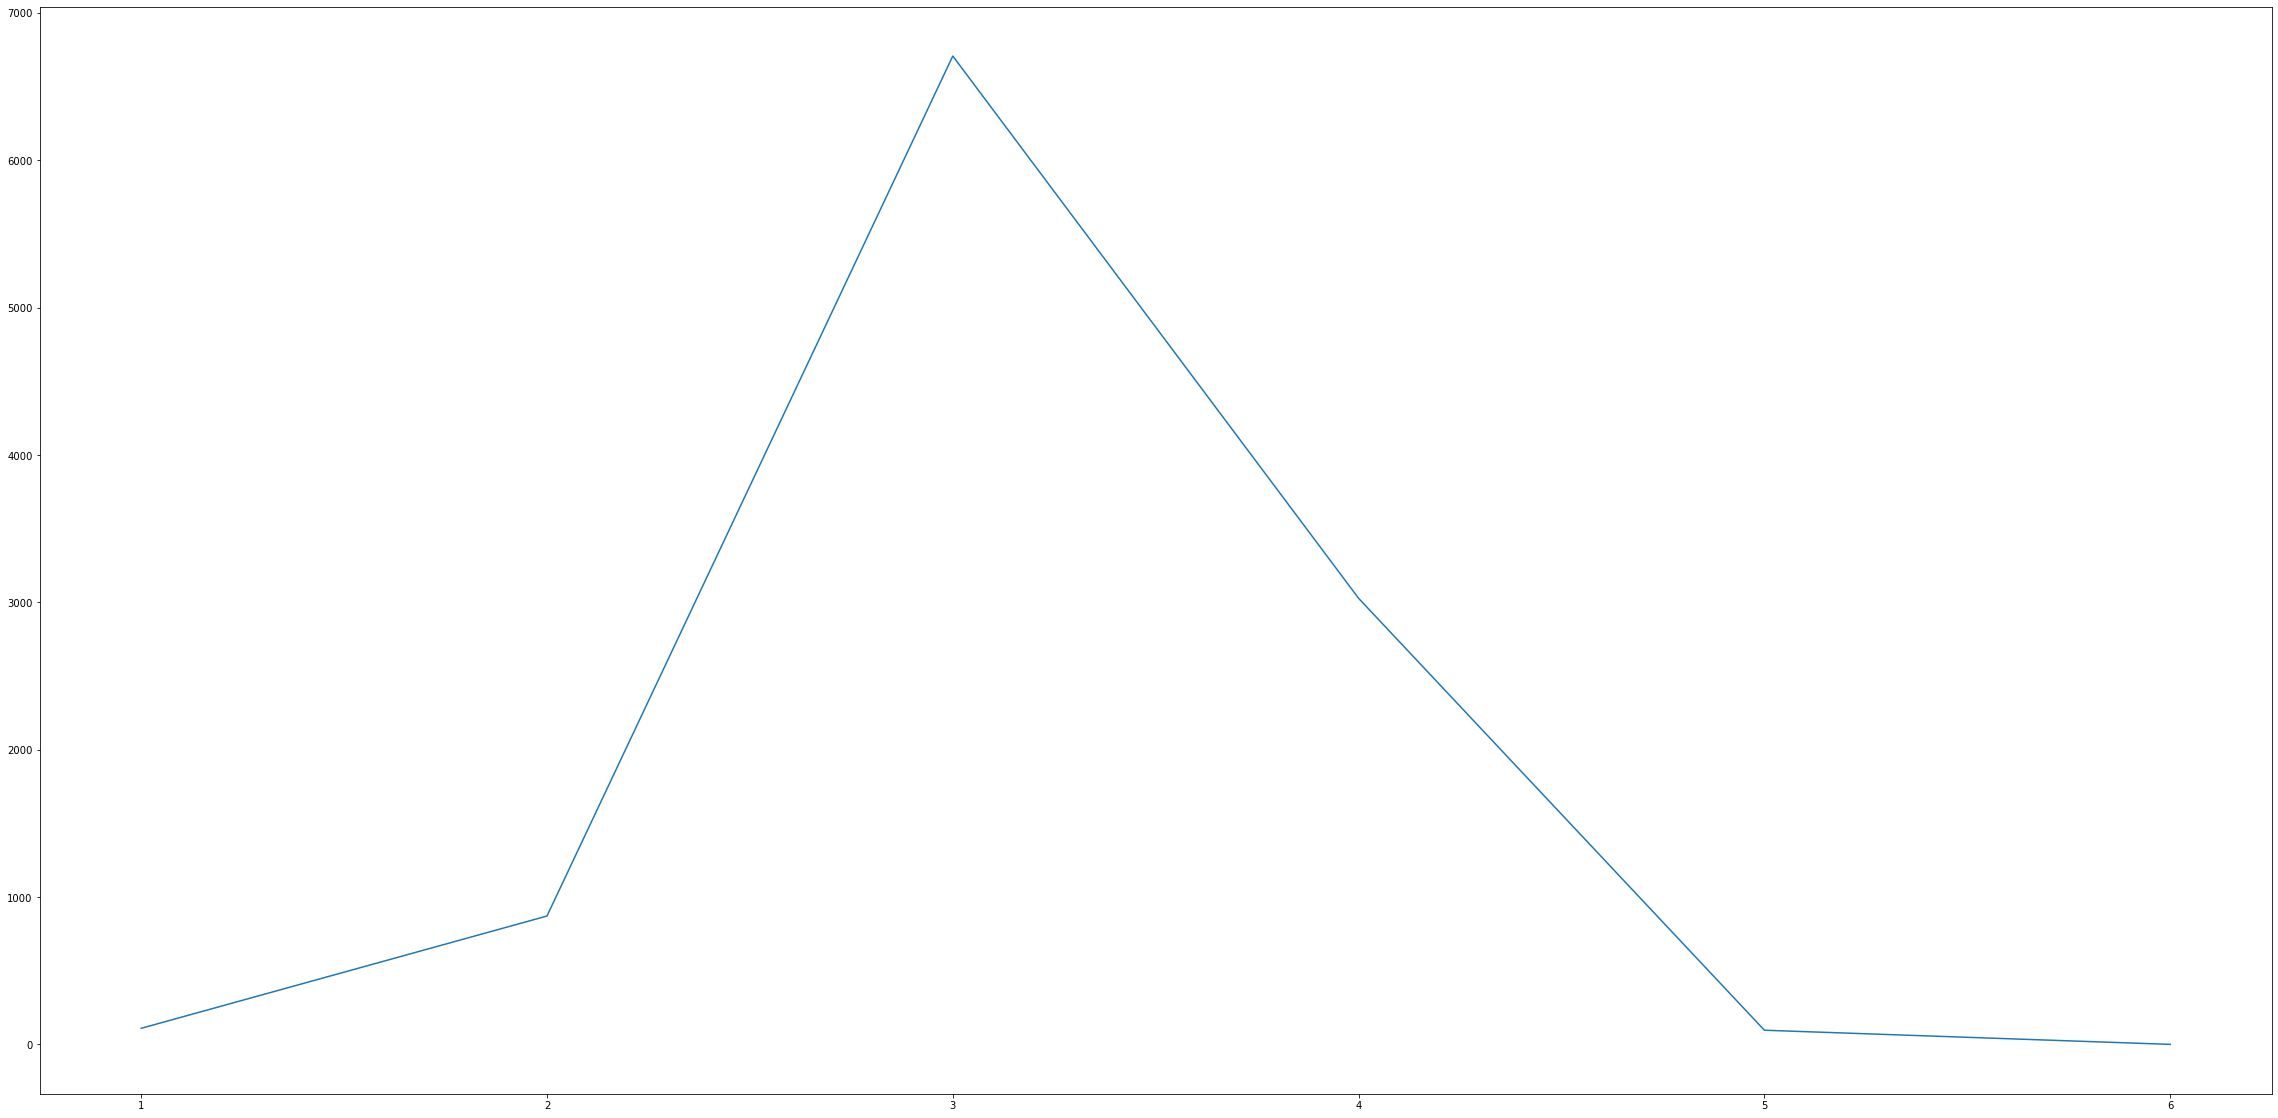

In [27]:
#Shortest path distribution # branch weight not considered
list_path=[1,2,3,4,5,6]
list_shortest_path=[109,871,6707,3027,96,0]
plt.plot(list_path,list_shortest_path)
plt.show()

In [28]:
#average clustering coefficient of our nw and random nw
avg_clster=nx.average_clustering(G, weight='weight', count_zeros=True)
avg_clster_rndm=avg_shortest_path/N
print('Average Clustering coff of our network',avg_clster)
print('Average Clustering coff of random network',avg_clster_rndm)

Average Clustering coff of our network 0.03372370566493121
Average Clustering coff of random network 0.018421314398084032


In [31]:
dict_1=(nx.clustering(G,weight='weight'))
keys, values = zip(*dict_1.items())

#print(keys)
degree_1=G.in_degree(keys,'weight')


df = pd.DataFrame(list(dict_1.items()))
df.drop(df.tail(1).index,inplace=True) 
df['degree_1'] = list_1
df
df.sort_values(by=[1])
#plt.figure(
df.plot(x='degree_1', y=1, style='o')
print(values)

ValueError: Length of values (110) does not match length of index (109)

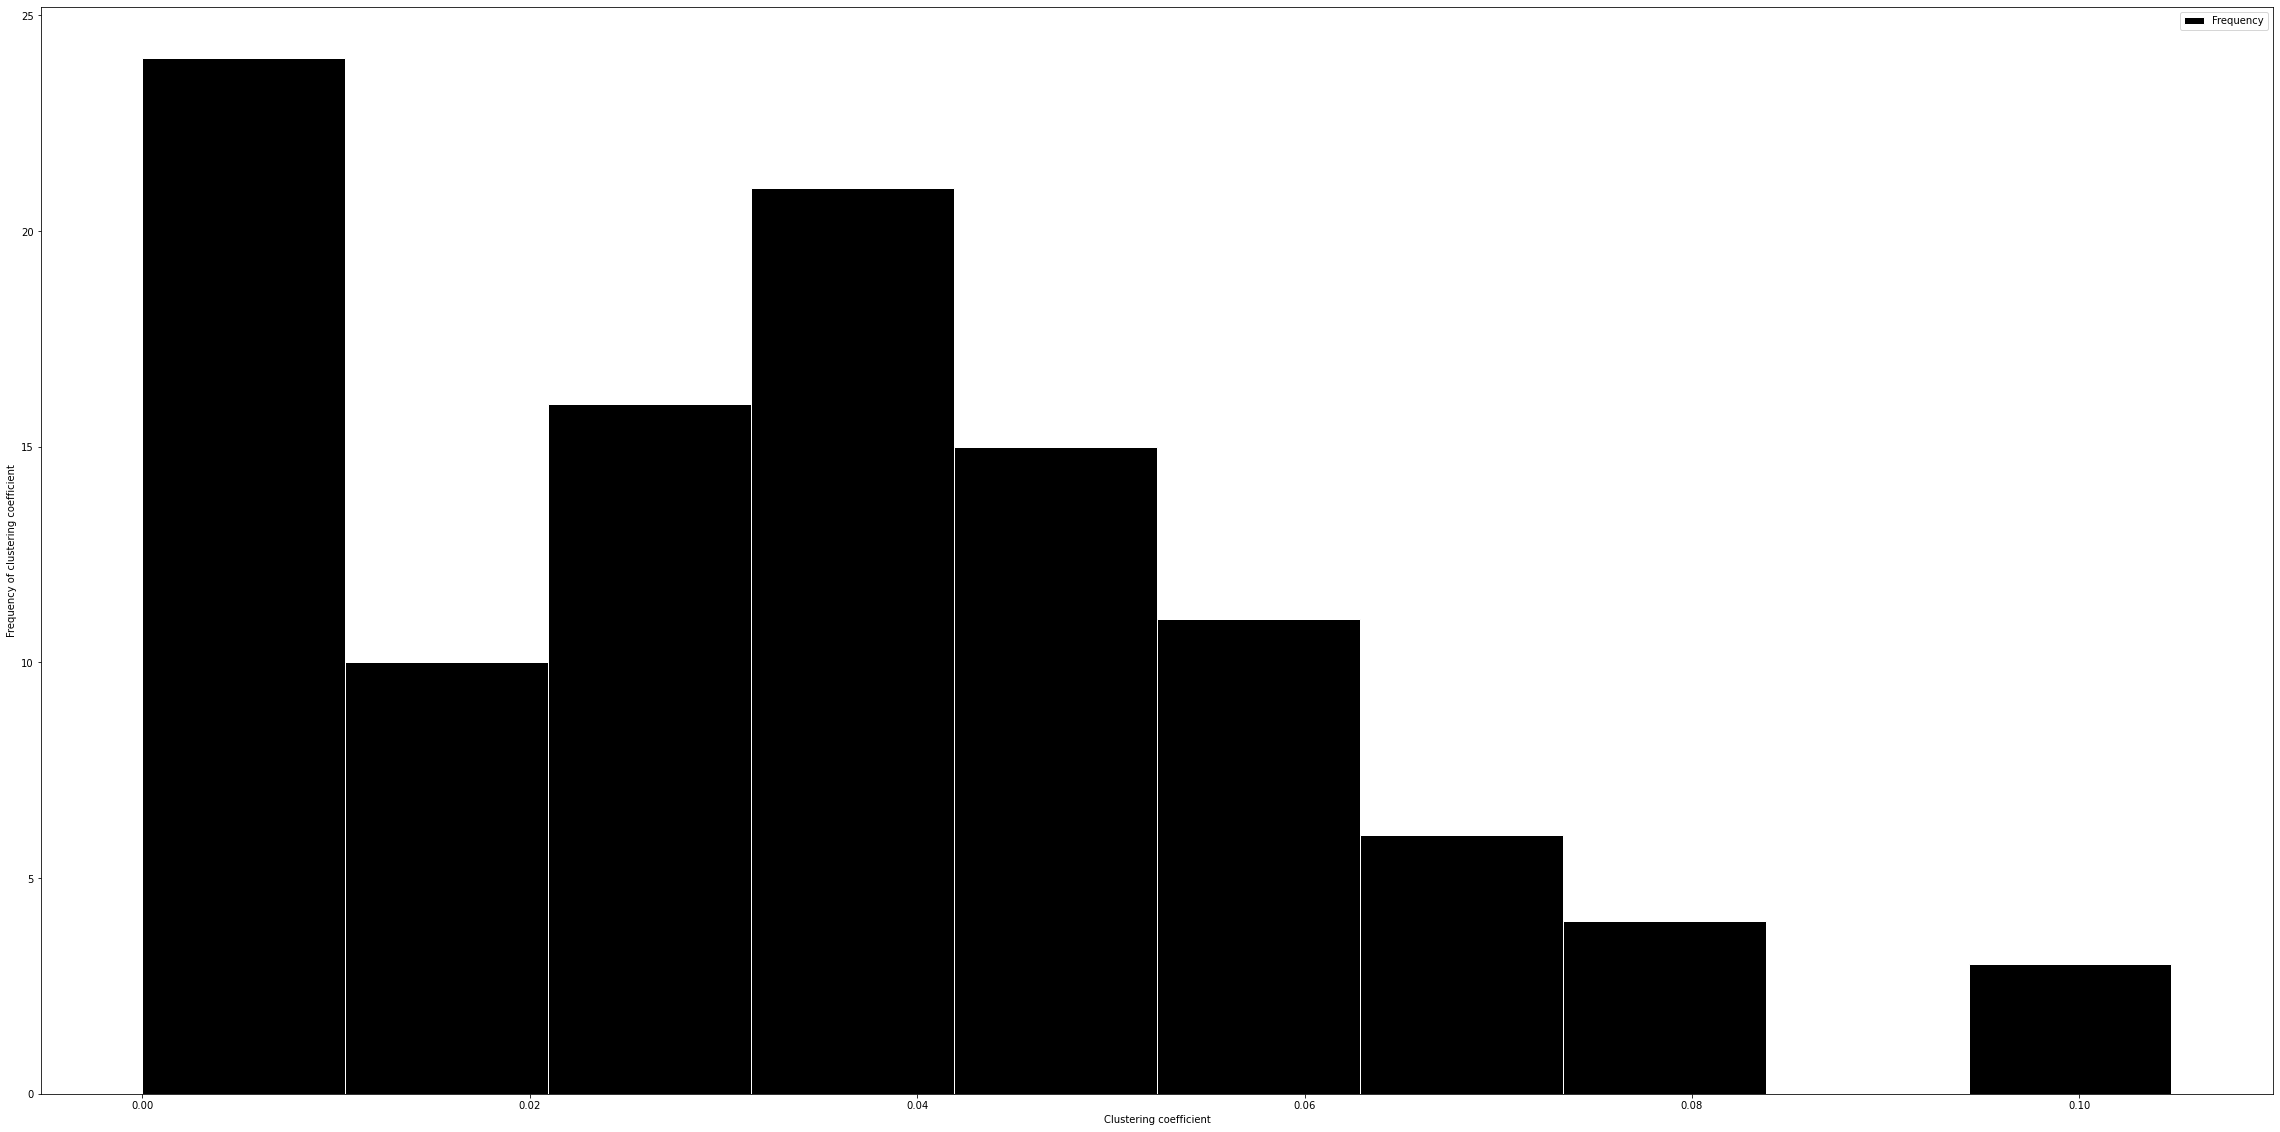

In [30]:
"""plt.hist(values, bins=10,color='black',edgecolor='white')
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency of clustering coefficient')
plt.legend(['Frequency'])
plt.savefig('clustering coeff.pdf') 
plt.show()"""

0.09606228086880693


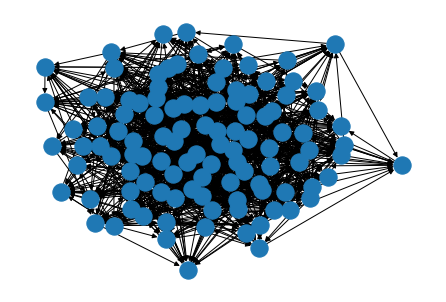

In [93]:
G2=nx.erdos_renyi_graph(109, 0.1, seed=None, directed=True)
print(nx.average_clustering(G2, weight='weight', count_zeros=True))
plt.figure()
nx.draw(G2)

In [94]:
from collections import defaultdict
list_wt_1_element=[]
list_wt_2_element=[]
list_wt_3_element=[]
list_wt_4_element=[]
list_wt_5_element=[]
##


list_wt_6_element=[]
for i in a_list:
    for j in a_list: 
       # print([p for p in nx.all_shortest_paths(G, source=i[0], target=j[0])])
        try:   
            shtst_pat_list=([p for p in nx.all_shortest_paths(G, source=i[0], target=j[0])])
            print(shtst_pat_list)
            print("no. of list",len(shtst_pat_list))
            count = 0
            for listElem in shtst_pat_list:
                count += len(listElem)                    
                print('Total Number of elements : ', count)
                if count == 3:
                    if count == [6,9,12,15,18,21,24,27,30]:
                        list_wt_3_element.append([count]*len(shtst_pat_list))
                else :
                    list_wt_3_element.append(count)
                
        except nx.exception.NetworkXNoPath:
            continue

print("Number of path with shortest path lenght 3 :",len(list_wt_3_element))


[['Delhi']]
no. of list 1
Total Number of elements :  1
[['Delhi', 'Mumbai']]
no. of list 1
Total Number of elements :  2
[['Delhi', 'Kolkata']]
no. of list 1
Total Number of elements :  2
[['Delhi', 'Chennai']]
no. of list 1
Total Number of elements :  2
[['Delhi', 'Agartala']]
no. of list 1
Total Number of elements :  2
[['Delhi', 'Cochin', 'Agatti']]
no. of list 1
Total Number of elements :  3
[['Delhi', 'Ahmedabad']]
no. of list 1
Total Number of elements :  2
[['Delhi', 'Ahmedabad', 'Bhavnagar'], ['Delhi', 'Surat', 'Bhavnagar']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Delhi', 'Ahmedabad', 'Porbandar'], ['Delhi', 'Mumbai', 'Porbandar']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Delhi', 'Mumbai', 'Jamnagar']]
no. of list 1
Total Number of elements :  3
[['Delhi', 'Rajkot']]
no. of list 1
Total Number of elements :  2
[['Delhi', 'Mumbai', 'Bhuj']]
no. of list 1
Total Number of elements :  3
[['Delhi', 'Ahmedabad'

Total Number of elements :  1
[['Agartala', 'Kolkata', 'Cochin', 'Agatti'], ['Agartala', 'Bangalore', 'Cochin', 'Agatti']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Agartala', 'Kolkata', 'Ahmedabad'], ['Agartala', 'Bangalore', 'Ahmedabad'], ['Agartala', 'Guwahati', 'Ahmedabad']]
no. of list 3
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
[['Agartala', 'Kolkata', 'Ahmedabad', 'Bhavnagar'], ['Agartala', 'Bangalore', 'Ahmedabad', 'Bhavnagar'], ['Agartala', 'Guwahati', 'Ahmedabad', 'Bhavnagar'], ['Agartala', 'Kolkata', 'Surat', 'Bhavnagar'], ['Agartala', 'Bangalore', 'Surat', 'Bhavnagar']]
no. of list 5
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
[['Agartala', 'Kolkata', 'Ahmedabad', 'Porbandar'], ['Agartala', 'Bangalore', 'Ahmedabad', 'Porbandar'], ['Agartala', 'Guwahati', 'Ahmedabad', 'Porbandar'], ['Ag

no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Bhavnagar', 'Ahmedabad', 'Kanpur'], ['Bhavnagar', 'Mumbai', 'Kanpur']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Bhavnagar', 'Ahmedabad', 'Lucknow'], ['Bhavnagar', 'Mumbai', 'Lucknow']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Bhavnagar', 'Ahmedabad', 'Varanasi'], ['Bhavnagar', 'Mumbai', 'Varanasi']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Bhavnagar', 'Ahmedabad', 'Delhi', 'Adampur'], ['Bhavnagar', 'Surat', 'Delhi', 'Adampur'], ['Bhavnagar', 'Mumbai', 'Delhi', 'Adampur']]
no. of list 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
[['Bhavnagar', 'Mumbai', 'Amritsar']]
no. of list 1
Total Number of elements :  3
[['Bhavnagar', 'Ahmedabad', 'Delhi', 'Bathinda'], ['Bhavnagar', 'Surat', 'Delhi', 'Bathinda'], ['Bhavnagar', 'Mumbai', 'Delhi', 'Bathinda']]
no. of lis

no. of list 8
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
[['Rajkot', 'Delhi', 'Tirupathi']]
no. of list 1
Total Number of elements :  3
[['Rajkot', 'Delhi', 'Vijaywada']]
no. of list 1
Total Number of elements :  3
[['Rajkot', 'Delhi', 'Visakhapatnam'], ['Rajkot', 'Mumbai', 'Visakhapatnam']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Rajkot', 'Delhi', 'Ranchi'], ['Rajkot', 'Mumbai', 'Ranchi']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Rajkot', 'Delhi', 'Kolkata', 'Shillong'], ['Rajkot', 'Mumbai', 'Kolkata', 'Shillong']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Rajkot', 'Delhi', 'Dharamshala']]
no. of list 1
Total Number of elements :  3
[['Rajkot', 'Delhi', 'Kullu']]
no. of list 1
To

[['Vadodara', 'Bangalore', 'Coimbatore'], ['Vadodara', 'Delhi', 'Coimbatore'], ['Vadodara', 'Hyderabad', 'Coimbatore'], ['Vadodara', 'Mumbai', 'Coimbatore']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Vadodara', 'Bangalore', 'Madurai'], ['Vadodara', 'Delhi', 'Madurai'], ['Vadodara', 'Hyderabad', 'Madurai'], ['Vadodara', 'Mumbai', 'Madurai']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Vadodara', 'Bangalore', 'Trichy'], ['Vadodara', 'Hyderabad', 'Trichy']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Vadodara', 'Bangalore', 'Tuticorin']]
no. of list 1
Total Number of elements :  3
[['Vadodara', 'Bangalore', 'Chennai', 'Salem'], ['Vadodara', 'Delhi', 'Chennai', 'Salem'], ['Vadodara', 'Hyderabad', 'Chennai', 'Salem'], ['Vadodara', 'Mumbai', 'Chennai', 'Salem']]
no. of lis

[['Allahabad', 'Kolkata', 'Dibrugarh'], ['Allahabad', 'Delhi', 'Dibrugarh']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Allahabad', 'Kolkata', 'Guwahati'], ['Allahabad', 'Bangalore', 'Guwahati'], ['Allahabad', 'Delhi', 'Guwahati'], ['Allahabad', 'Mumbai', 'Guwahati']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Allahabad', 'Kolkata', 'Jorhat']]
no. of list 1
Total Number of elements :  3
[['Allahabad', 'Kolkata', 'Silchar'], ['Allahabad', 'Delhi', 'Silchar']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Allahabad', 'Kolkata', 'Guwahati', 'Tezpur'], ['Allahabad', 'Bangalore', 'Guwahati', 'Tezpur'], ['Allahabad', 'Delhi', 'Guwahati', 'Tezpur'], ['Allahabad', 'Mumbai', 'Guwahati', 'Tezpur']]
no. of list 4
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
[['All

no. of list 9
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
[['Kanpur', 'Ahmedabad', 'Bangalore', 'Tuticorin'], ['Kanpur', 'Delhi', 'Bangalore', 'Tuticorin'], ['Kanpur', 'Mumbai', 'Bangalore', 'Tuticorin'], ['Kanpur', 'Ahmedabad', 'Chennai', 'Tuticorin'], ['Kanpur', 'Delhi', 'Chennai', 'Tuticorin'], ['Kanpur', 'Mumbai', 'Chennai', 'Tuticorin']]
no. of list 6
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
[['Kanpur', 'Ahmedabad', 'Chennai', 'Salem'], ['Kanpur', 'Delhi', 'Chennai', 'Salem'], ['Kanpur', 'Mumbai', 'Chennai', 'Salem']]
no. of list 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of eleme

no. of list 1
Total Number of elements :  3
[['Adampur', 'Delhi', 'Guwahati', 'Passighat']]
no. of list 1
Total Number of elements :  4
[['Adampur', 'Delhi', 'Kolkata', 'Pakyong']]
no. of list 1
Total Number of elements :  4
[['Adampur', 'Delhi', 'Bangalore', 'Pondicherry'], ['Adampur', 'Delhi', 'Hyderabad', 'Pondicherry']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Amritsar', 'Delhi']]
no. of list 1
Total Number of elements :  2
[['Amritsar', 'Mumbai']]
no. of list 1
Total Number of elements :  2
[['Amritsar', 'Kolkata']]
no. of list 1
Total Number of elements :  2
[['Amritsar', 'Kolkata', 'Chennai'], ['Amritsar', 'Bangalore', 'Chennai'], ['Amritsar', 'Delhi', 'Chennai'], ['Amritsar', 'Patna', 'Chennai'], ['Amritsar', 'Hyderabad', 'Chennai'], ['Amritsar', 'Jaipur', 'Chennai'], ['Amritsar', 'Mumbai', 'Chennai'], ['Amritsar', 'Nagpur', 'Chennai']]
no. of list 8
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Tot

Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
[['Bagdogra', 'Bangalore', 'Kannur'], ['Bagdogra', 'Chennai', 'Kannur'], ['Bagdogra', 'Delhi', 'Kannur'], ['Bagdogra', 'Hyderabad', 'Kannur'], ['Bagdogra', 'Mumbai', 'Kannur']]
no. of list 5
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
[['Bagdogra', 'Bangalore', 'Trivandrum'], ['Bagdogra', 'Chennai', 'Trivandrum'], ['Bagdogra', 'Delhi', 'Trivandrum'], ['Bagdogra', 'Hyderabad', 'Trivandrum'], ['Bagdogra', 'Mumbai', 'Trivandrum']]
no. of list 5
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
[['Bagdogra', 'Bangalore', 'Coimbatore'], ['Bagdogra', 'Chennai', 'Coimbatore'], ['Bagdogra', 'Delhi', 'Coimbatore'], ['Bagdogra', 'Hyderabad', 'Coimbatore'], ['Bagdogra'

[['Mangalore', 'Bangalore', 'Kolkata', 'Aizwal'], ['Mangalore', 'Chennai', 'Kolkata', 'Aizwal'], ['Mangalore', 'Delhi', 'Kolkata', 'Aizwal'], ['Mangalore', 'Hyderabad', 'Kolkata', 'Aizwal'], ['Mangalore', 'Mumbai', 'Kolkata', 'Aizwal'], ['Mangalore', 'Bangalore', 'Guwahati', 'Aizwal'], ['Mangalore', 'Chennai', 'Guwahati', 'Aizwal'], ['Mangalore', 'Delhi', 'Guwahati', 'Aizwal'], ['Mangalore', 'Hyderabad', 'Guwahati', 'Aizwal'], ['Mangalore', 'Mumbai', 'Guwahati', 'Aizwal'], ['Mangalore', 'Bangalore', 'Imphal', 'Aizwal'], ['Mangalore', 'Delhi', 'Imphal', 'Aizwal']]
no. of list 12
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
[['Mangalore', 'Bangalore', 'Jaipur', 'Agra']

Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
[['Bhopal', 'Ahmedabad', 'Jabalpur'], ['Bhopal', 'Delhi', 'Jabalpur'], ['Bhopal', 'Hyderabad', 'Jabalpur'], ['Bhopal', 'Mumbai', 'Jabalpur']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Bhopal', 'Ahmedabad', 'Bhubaneshwar'], ['Bhopal', 'Bangalore', 'Bhubaneshwar'], ['Bhopal', 'Delhi', 'Bhubaneshwar'], ['Bhopal', 'Hyderabad', 'Bhubaneshwar'], ['Bhopal', 'Mumbai', 'Bhubaneshwar'], ['Bhopal', 'Nagpur', 'Bhubaneshwar']]
no. of list 6
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
[['Bhopal', 'Delhi', 'Jharsuguda'], ['Bhopal', 'Hyderabad', 'Jharsuguda'], ['Bhopal', 'Raipur', 'Jharsug

[['Khajuraho', 'Varanasi', 'Bangalore', 'Tirupathi'], ['Khajuraho', 'Varanasi', 'Delhi', 'Tirupathi'], ['Khajuraho', 'Varanasi', 'Hyderabad', 'Tirupathi']]
no. of list 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
[['Khajuraho', 'Varanasi', 'Bangalore', 'Vijaywada'], ['Khajuraho', 'Varanasi', 'Chennai', 'Vijaywada'], ['Khajuraho', 'Varanasi', 'Delhi', 'Vijaywada'], ['Khajuraho', 'Varanasi', 'Hyderabad', 'Vijaywada']]
no. of list 4
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
[['Khajuraho', 'Varanasi', 'Kolkata', 'Visakhapatnam'], ['Khajuraho', 'Varanasi', 'Bangalore', 'Visakhapatnam'], ['Khajuraho', 'Varanasi', 'Chennai', 'Visakhapatnam'], ['Khajuraho', 'Varanasi', 'Delhi', 'Visakhapatnam'], ['Khajuraho', 'Varanasi', 'Hyderabad', 'Visakhapatnam'], ['Khajuraho', 'Varanasi', 'Mumbai', 'Visakhapatnam']]
no. of list 6
Total Number of elements :  4
Total Number of elem

[['Calicut', 'Bangalore', 'Bagdogra'], ['Calicut', 'Chennai', 'Bagdogra'], ['Calicut', 'Delhi', 'Bagdogra'], ['Calicut', 'Mumbai', 'Bagdogra']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Calicut', 'Delhi', 'Durgapur']]
no. of list 1
Total Number of elements :  3
[['Calicut', 'Bangalore']]
no. of list 1
Total Number of elements :  2
[['Calicut', 'Bangalore', 'Belgaum'], ['Calicut', 'Mumbai', 'Belgaum']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Calicut', 'Bangalore', 'Hubli'], ['Calicut', 'Kannur', 'Hubli'], ['Calicut', 'Chennai', 'Hubli'], ['Calicut', 'Mumbai', 'Hubli']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Calicut', 'Bangalore', 'Mangalore'], ['Calicut', 'Chennai', 'Mangalore'], ['Calicut', 'Delhi', 'Mangalore'], ['Calicut', 'Mumbai', 'Mangalore']]
no. of li

[['Trivandrum', 'Bangalore', 'Guwahati'], ['Trivandrum', 'Chennai', 'Guwahati'], ['Trivandrum', 'Delhi', 'Guwahati'], ['Trivandrum', 'Hyderabad', 'Guwahati'], ['Trivandrum', 'Mumbai', 'Guwahati']]
no. of list 5
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
[['Trivandrum', 'Bangalore', 'Kolkata', 'Jorhat'], ['Trivandrum', 'Cochin', 'Kolkata', 'Jorhat'], ['Trivandrum', 'Chennai', 'Kolkata', 'Jorhat'], ['Trivandrum', 'Delhi', 'Kolkata', 'Jorhat'], ['Trivandrum', 'Hyderabad', 'Kolkata', 'Jorhat'], ['Trivandrum', 'Mumbai', 'Kolkata', 'Jorhat'], ['Trivandrum', 'Bangalore', 'Guwahati', 'Jorhat'], ['Trivandrum', 'Chennai', 'Guwahati', 'Jorhat'], ['Trivandrum', 'Delhi', 'Guwahati', 'Jorhat'], ['Trivandrum', 'Hyderabad', 'Guwahati', 'Jorhat'], ['Trivandrum', 'Mumbai', 'Guwahati', 'Jorhat']]
no. of list 11
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements : 

[['Trichy', 'Bangalore', 'Pondicherry'], ['Trichy', 'Hyderabad', 'Pondicherry']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tuticorin', 'Bangalore', 'Delhi'], ['Tuticorin', 'Chennai', 'Delhi']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tuticorin', 'Bangalore', 'Mumbai'], ['Tuticorin', 'Chennai', 'Mumbai']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tuticorin', 'Bangalore', 'Kolkata'], ['Tuticorin', 'Chennai', 'Kolkata']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tuticorin', 'Chennai']]
no. of list 1
Total Number of elements :  2
[['Tuticorin', 'Bangalore', 'Agartala']]
no. of list 1
Total Number of elements :  3
[['Tuticorin', 'Bangalore', 'Cochin', 'Agatti'], ['Tuticorin', 'Chennai', 'Cochin', 'Agatti']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Tuticorin', 'Bangalore', 'Ahmedabad'], ['Tuticorin', 'Chennai', 'Ahmed

[['Pithoragarh', 'Dehradun', 'Ahmedabad']]
no. of list 1
Total Number of elements :  3
[['Pithoragarh', 'Dehradun', 'Ahmedabad', 'Bhavnagar']]
no. of list 1
Total Number of elements :  4
[['Pithoragarh', 'Dehradun', 'Ahmedabad', 'Porbandar'], ['Pithoragarh', 'Dehradun', 'Mumbai', 'Porbandar']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Pithoragarh', 'Dehradun', 'Mumbai', 'Jamnagar']]
no. of list 1
Total Number of elements :  4
[['Pithoragarh', 'Dehradun', 'Delhi', 'Rajkot'], ['Pithoragarh', 'Dehradun', 'Mumbai', 'Rajkot']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Pithoragarh', 'Dehradun', 'Mumbai', 'Bhuj']]
no. of list 1
Total Number of elements :  4
[['Pithoragarh', 'Dehradun', 'Ahmedabad', 'Kandla'], ['Pithoragarh', 'Dehradun', 'Mumbai', 'Kandla']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Pithoragarh', 'Dehradun', 'Bangalore', 'Surat'], ['Pithoragarh', 'Dehradun', 'Delhi', 'Surat

no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Jorhat', 'Kolkata', 'Delhi'], ['Jorhat', 'Guwahati', 'Delhi']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Jorhat', 'Kolkata', 'Mumbai'], ['Jorhat', 'Guwahati', 'Mumbai']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Jorhat', 'Kolkata']]
no. of list 1
Total Number of elements :  2
[['Jorhat', 'Kolkata', 'Chennai'], ['Jorhat', 'Guwahati', 'Chennai']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Jorhat', 'Kolkata', 'Agartala'], ['Jorhat', 'Guwahati', 'Agartala']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Jorhat', 'Kolkata', 'Cochin', 'Agatti']]
no. of list 1
Total Number of elements :  4
[['Jorhat', 'Kolkata', 'Ahmedabad'], ['Jorhat', 'Guwahati', 'Ahmedabad']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Jorhat', 'Kolkata', 'Ahmedabad', 'Bhavnagar'], 

[['Tezpur', 'Guwahati', 'Bangalore', 'Shirdi'], ['Tezpur', 'Guwahati', 'Chennai', 'Shirdi'], ['Tezpur', 'Guwahati', 'Delhi', 'Shirdi'], ['Tezpur', 'Guwahati', 'Hyderabad', 'Shirdi'], ['Tezpur', 'Guwahati', 'Mumbai', 'Shirdi']]
no. of list 5
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
[['Tezpur', 'Guwahati', 'Ahmedabad', 'Nashik'], ['Tezpur', 'Guwahati', 'Hyderabad', 'Nashik']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Tezpur', 'Guwahati', 'Hyderabad', 'Nanded'], ['Tezpur', 'Guwahati', 'Mumbai', 'Nanded']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Tezpur', 'Guwahati', 'Ahmedabad', 'Jalgaon'], ['Tezpur', 'Guwahati', 'Mumbai', 'Jalgaon']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Tezpur', 'Guwahati', 'Kolkata', 'Port Blair'], ['Tezpur', 'Guwahati', 'Bangalore', 'Port Blair'], ['

Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
[['Patna', 'Ahmedabad', 'Jaisalmer'], ['Patna', 'Bangalore', 'Jaisalmer'], ['Patna', 'Delhi', 'Jaisalmer'], ['Patna', 'Mumbai', 'Jaisalmer']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Patna', 'Ahmedabad', 'Jodhpur'], ['Patna', 'Bangalore', 'Jodhpur'], ['Patna', 'Delhi', 'Jodhpur'], ['Patna', 'Mumbai', 'Jodhpur']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Patna', 'Ahmedabad', 'Kishangarh'], ['Patna', 'Delhi', 'Kishangarh'], ['Patna', 'Hyderabad', 'Kishangarh']]
no. of list 3
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
[['Patna', 'Ahmedabad', 'Udaipur'], ['Patna', 'Bangalore', 'Udaipur'], ['Patna', 'Delhi', 'Udaipur'], ['Patna', 'Hyderabad', 'Udaipur'], ['Patna',

no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Bikaner', 'Delhi', 'Chennai', 'Salem']]
no. of list 1
Total Number of elements :  4
[['Bikaner', 'Delhi', 'Dehradun']]
no. of list 1
Total Number of elements :  3
[['Bikaner', 'Delhi', 'Dehradun', 'Pithoragarh']]
no. of list 1
Total Number of elements :  4
[['Bikaner', 'Delhi', 'Dibrugarh']]
no. of list 1
Total Number of elements :  3
[['Bikaner', 'Delhi', 'Guwahati']]
no. of list 1
Total Number of elements :  3
[['Bikaner', 'Delhi', 'Kolkata', 'Jorhat'], ['Bikaner', 'Delhi', 'Guwahati', 'Jorhat']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Bikaner', 'Delhi', 'Silchar']]
no. of list 1
Total Number of elements :  3
[['Bikaner', 'Delhi', 'Guwahati', 'Tezpur']]
no. of list 1
Total Number of elements :  4
[['Bikaner', 'Delhi', 'Kolkata', 'Lilabari']]
no. of list 1
Total Number of elements :  4
[['Bikaner', 'Delhi', 'Kolkata', 'Dimapur']]
no. of list 1
Total Number of elements :  4

no. of list 1
Total Number of elements :  3
[['Kishangarh', 'Delhi']]
no. of list 1
Total Number of elements :  2
[['Kishangarh', 'Ahmedabad', 'Mumbai'], ['Kishangarh', 'Indore', 'Mumbai'], ['Kishangarh', 'Delhi', 'Mumbai'], ['Kishangarh', 'Hyderabad', 'Mumbai']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Kishangarh', 'Ahmedabad', 'Kolkata'], ['Kishangarh', 'Indore', 'Kolkata'], ['Kishangarh', 'Delhi', 'Kolkata'], ['Kishangarh', 'Hyderabad', 'Kolkata']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Kishangarh', 'Ahmedabad', 'Chennai'], ['Kishangarh', 'Indore', 'Chennai'], ['Kishangarh', 'Delhi', 'Chennai'], ['Kishangarh', 'Hyderabad', 'Chennai']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Kishangarh', 'Delhi'

[['Srinagar', 'Ahmedabad', 'Goa'], ['Srinagar', 'Lucknow', 'Goa'], ['Srinagar', 'Delhi', 'Goa'], ['Srinagar', 'Mumbai', 'Goa']]
no. of list 4
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Srinagar', 'Ahmedabad', 'Hyderabad'], ['Srinagar', 'Lucknow', 'Hyderabad'], ['Srinagar', 'Amritsar', 'Hyderabad'], ['Srinagar', 'Chandigarh', 'Hyderabad'], ['Srinagar', 'Delhi', 'Hyderabad'], ['Srinagar', 'Mumbai', 'Hyderabad']]
no. of list 6
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
[['Srinagar', 'Delhi', 'Imphal']]
no. of list 1
Total Number of elements :  3
[['Srinagar', 'Delhi', 'Bikaner']]
no. of list 1
Total Number of elements :  3
[['Srinagar', 'Ahmedabad', 'Jaipur'], ['Srinagar', 'Amritsar', 'Jaipur'], ['Srinagar', 'Delhi', 'Jaipur'], ['Srinagar', 'Mumbai', 'Jaipur']]
no. of lis

Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
[['Pune', 'Ahmedabad', 'Hubli', 'Hindon'], ['Pune', 'Bangalore', 'Hubli', 'Hindon'], ['Pune', 'Cochin', 'Hubli', 'Hindon'], ['Pune', 'Chennai', 'Hubli', 'Hindon'], ['Pune', 'Goa', 'Hubli', 'Hindon'], ['Pune', 'Hyderabad', 'Hubli', 'Hindon']]
no. of list 6
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
[['Pune', 'Ahmedabad', 'Kanpur'], ['Pune', 'Delhi', 'Kanpur']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Pune', 'Lucknow']]
no. of list 1
Total Number of elements :  2
[['Pune', 'Ahmedabad', 'Varanasi'], ['Pune', 'Kolkata', 'Varanasi'], ['Pune', 'Bangalore', 'Varanasi'], ['Pune', 'Chennai', 'Varanasi'], ['Pune', 'Delhi', 'Varanasi'], ['Pune', 'Hyderabad', 'Varanasi'], ['Pune', 'Jaipur', 'Varanasi']]
n

no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Nanded', 'Hyderabad', 'Kolkata', 'Jorhat'], ['Nanded', 'Mumbai', 'Kolkata', 'Jorhat'], ['Nanded', 'Hyderabad', 'Guwahati', 'Jorhat'], ['Nanded', 'Mumbai', 'Guwahati', 'Jorhat']]
no. of list 4
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
[['Nanded', 'Hyderabad', 'Kolkata', 'Silchar'], ['Nanded', 'Mumbai', 'Kolkata', 'Silchar'], ['Nanded', 'Hyderabad', 'Delhi', 'Silchar'], ['Nanded', 'Mumbai', 'Delhi', 'Silchar'], ['Nanded', 'Hyderabad', 'Guwahati', 'Silchar'], ['Nanded', 'Mumbai', 'Guwahati', 'Silchar']]
no. of list 6
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
[['Nanded', 'Hyderabad', 'Guwahati', 'Tezpur'], ['Nanded', 'Mumbai', 'Guwahati', 'Tezpur']]
no. of list 2
Total Number of elements :  4
Tot

[['Raipur', 'Delhi', 'Adampur']]
no. of list 1
Total Number of elements :  3
[['Raipur', 'Kolkata', 'Amritsar'], ['Raipur', 'Bangalore', 'Amritsar'], ['Raipur', 'Delhi', 'Amritsar'], ['Raipur', 'Hyderabad', 'Amritsar'], ['Raipur', 'Mumbai', 'Amritsar']]
no. of list 5
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
[['Raipur', 'Delhi', 'Bathinda']]
no. of list 1
Total Number of elements :  3
[['Raipur', 'Kolkata', 'Chandigarh'], ['Raipur', 'Bangalore', 'Chandigarh'], ['Raipur', 'Delhi', 'Chandigarh'], ['Raipur', 'Hyderabad', 'Chandigarh'], ['Raipur', 'Mumbai', 'Chandigarh']]
no. of list 5
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
[['Raipur', 'Kolkata', 'Bagdogra'], ['Raipur', 'Bangalore', 'Bagdogra'], ['Raipur', 'Chennai', 'Bagdogra'], ['Raipur', 'Delhi', 'Bagdogra'], ['Raipur

[['Tirupathi', 'Bangalore', 'Madurai'], ['Tirupathi', 'Hyderabad', 'Madurai']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tirupathi', 'Bangalore', 'Trichy'], ['Tirupathi', 'Hyderabad', 'Trichy']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tirupathi', 'Bangalore', 'Tuticorin']]
no. of list 1
Total Number of elements :  3
[['Tirupathi', 'Bangalore', 'Chennai', 'Salem'], ['Tirupathi', 'Hubli', 'Chennai', 'Salem'], ['Tirupathi', 'Cochin', 'Chennai', 'Salem'], ['Tirupathi', 'Hyderabad', 'Chennai', 'Salem'], ['Tirupathi', 'Vijaywada', 'Chennai', 'Salem']]
no. of list 5
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
[['Tirupathi', 'Bangalore', 'Dehradun'], ['Tirupathi', 'Hyderabad', 'Dehradun']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Tirupathi', 'Bangalore', 'Dehradun', 'Pithoragarh']

no. of list 7
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
[['Ranchi', 'Delhi', 'Dharamshala']]
no. of list 1
Total Number of elements :  3
[['Ranchi', 'Delhi', 'Kullu']]
no. of list 1
Total Number of elements :  3
[['Ranchi', 'Delhi', 'Shimla']]
no. of list 1
Total Number of elements :  3
[['Ranchi', 'Mumbai', 'Diu']]
no. of list 1
Total Number of elements :  3
[['Ranchi', 'Delhi', 'Leh']]
no. of list 1
Total Number of elements :  3
[['Ranchi', 'Delhi', 'Thoise']]
no. of list 1
Total Number of elements :  3
[['Ranchi', 'Bangalore', 'Guwahati', 'Passighat'], ['Ranchi', 'Bhubaneshwar', 'Guwahati', 'Passighat'], ['Ranchi', 'Delhi', 'Guwahati', 'Passighat'], ['Ranchi', 'Hyderabad', 'Guwahati', 'Passighat'], ['Ranchi', 'Mumbai', 'Guwahati', 'Passighat']]
no. of list 5
Total Number of elements :  4
Total Number of elements 

no. of list 7
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
[['Shimla', 'Chandigarh', 'Nagpur'], ['Shimla', 'Delhi', 'Nagpur']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Shimla', 'Chandigarh', 'Pune'], ['Shimla', 'Delhi', 'Pune']]
no. of list 2
Total Number of elements :  3
Total Number of elements :  6
[['Shimla', 'Delhi', 'Shirdi']]
no. of list 1
Total Number of elements :  3
[['Shimla', 'Chandigarh', 'Ahmedabad', 'Nashik'], ['Shimla', 'Delhi', 'Ahmedabad', 'Nashik'], ['Shimla', 'Chandigarh', 'Hyderabad', 'Nashik'], ['Shimla', 'Delhi', 'Hyderabad', 'Nashik'], ['Shimla', 'Chandigarh', 'Pune', 'Nashik'], ['Shimla', 'Delhi', 'Pune', 'Nashik']]
no. of list 6
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Num

[['Passighat', 'Guwahati', 'Ahmedabad', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Kolkata', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Bangalore', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Bhubaneshwar', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Chennai', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Delhi', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Hyderabad', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Jaipur', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Mumbai', 'Varanasi', 'Khajuraho'], ['Passighat', 'Guwahati', 'Jaipur', 'Agra', 'Khajuraho']]
no. of list 10
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Total Number of elements :  50
[['Passighat', 'Guwahati', 'Ahmedabad', 'Ja

[['Belagavi', 'Tirupathi']]
no. of list 1
Total Number of elements :  2
[['Belagavi', 'Bangalore', 'Vijaywada'], ['Belagavi', 'Hyderabad', 'Vijaywada'], ['Belagavi', 'Tirupathi', 'Vijaywada']]
no. of list 3
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
[['Belagavi', 'Bangalore', 'Visakhapatnam'], ['Belagavi', 'Hyderabad', 'Visakhapatnam'], ['Belagavi', 'Mumbai', 'Visakhapatnam']]
no. of list 3
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
[['Belagavi', 'Bangalore', 'Ranchi'], ['Belagavi', 'Hyderabad', 'Ranchi'], ['Belagavi', 'Mumbai', 'Ranchi']]
no. of list 3
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
[['Belagavi', 'Bangalore', 'Kolkata', 'Shillong'], ['Belagavi', 'Hyderabad', 'Kolkata', 'Shillong'], ['Belagavi', 'Mumbai', 'Kolkata', 'Shillong'], ['Belagavi', 'Pune', 'Kolkata', 'Shillong']]
no. of list 4
Total Number of elements :  4
Total Number of ele

[['Pathankot', 'Delhi', 'Trivandrum']]
no. of list 1
Total Number of elements :  3
[['Pathankot', 'Delhi', 'Coimbatore']]
no. of list 1
Total Number of elements :  3
[['Pathankot', 'Delhi', 'Madurai']]
no. of list 1
Total Number of elements :  3
[['Pathankot', 'Delhi', 'Bangalore', 'Trichy'], ['Pathankot', 'Delhi', 'Chennai', 'Trichy'], ['Pathankot', 'Delhi', 'Hyderabad', 'Trichy']]
no. of list 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
[['Pathankot', 'Delhi', 'Bangalore', 'Tuticorin'], ['Pathankot', 'Delhi', 'Chennai', 'Tuticorin']]
no. of list 2
Total Number of elements :  4
Total Number of elements :  8
[['Pathankot', 'Delhi', 'Chennai', 'Salem']]
no. of list 1
Total Number of elements :  4
[['Pathankot', 'Delhi', 'Dehradun']]
no. of list 1
Total Number of elements :  3
[['Pathankot', 'Delhi', 'Dehradun', 'Pithoragarh']]
no. of list 1
Total Number of elements :  4
[['Pathankot', 'Delhi', 'Dibrugarh']]
no. of list 1
Total Number of el

[['Bidar', 'Bangalore', 'Ahmedabad', 'Kishangarh'], ['Bidar', 'Bangalore', 'Delhi', 'Kishangarh'], ['Bidar', 'Bangalore', 'Hyderabad', 'Kishangarh']]
no. of list 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
[['Bidar', 'Bangalore', 'Udaipur']]
no. of list 1
Total Number of elements :  3
[['Bidar', 'Bangalore', 'Lucknow', 'Jammu'], ['Bidar', 'Bangalore', 'Gwalior', 'Jammu'], ['Bidar', 'Bangalore', 'Delhi', 'Jammu'], ['Bidar', 'Bangalore', 'Mumbai', 'Jammu']]
no. of list 4
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
[['Bidar', 'Bangalore', 'Amritsar', 'Srinagar'], ['Bidar', 'Bangalore', 'Chandigarh', 'Srinagar'], ['Bidar', 'Bangalore', 'Delhi', 'Srinagar'], ['Bidar', 'Bangalore', 'Mumbai', 'Srinagar']]
no. of list 4
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
[['Bidar', 'Bangalore', 'Ahme

In [95]:
#bet_centrality=nx.betweenness_centrality(G, k=None, normalized=True, weight="weight")
bet_centrality=nx.betweenness_centrality(G, k=None, normalized=False, weight="weight")
bet_centrality

{'Delhi': 2726.9916666666663,
 'Mumbai': 1641.1825396825388,
 'Kolkata': 1034.1984126984125,
 'Chennai': 590.0,
 'Agartala': 43.5,
 'Agatti': 0.0,
 'Ahmedabad': 1023.2777777777775,
 'Bhavnagar': 13.5,
 'Porbandar': 0.0,
 'Jamnagar': 0.0,
 'Rajkot': 0.0,
 'Bhuj': 0.0,
 'Kandla': 0.0,
 'Surat': 104.17777777777779,
 'Vadodara': 0.0,
 'Aizwal': 23.5,
 'Agra': 39.5,
 'Allahabad': 21.2,
 'Gorakhpur': 149.17857142857144,
 'Hindon': 165.5,
 'Kanpur': 44.91666666666668,
 'Lucknow': 154.6952380952381,
 'Varanasi': 242.21666666666667,
 'Adampur': 0.0,
 'Amritsar': 252.53809523809522,
 'Bathinda': 123.16666666666667,
 'Chandigarh': 684.1333333333333,
 'Bagdogra': 159.5888888888889,
 'Durgapur': 0.0,
 'Bangalore': 1380.391666666667,
 'Belgaum': 436.09999999999997,
 'Hubli': 800.0055555555554,
 'Mangalore': 69.2,
 'Vidyanagar': 0.0,
 'Mysore': 20.283333333333335,
 'Bhopal': 114.28571428571429,
 'Gwalior': 1413.0285714285717,
 'Indore': 545.7333333333333,
 'Khajuraho': 0.0,
 'Jabalpur': 2.5,
 'Bhuban

(2726.9916666666663, 1641.1825396825388, 1034.1984126984125, 590.0, 43.5, 0.0, 1023.2777777777775, 13.5, 0.0, 0.0, 0.0, 0.0, 0.0, 104.17777777777779, 0.0, 23.5, 39.5, 21.2, 149.17857142857144, 165.5, 44.91666666666668, 154.6952380952381, 242.21666666666667, 0.0, 252.53809523809522, 123.16666666666667, 684.1333333333333, 159.5888888888889, 0.0, 1380.391666666667, 436.09999999999997, 800.0055555555554, 69.2, 0.0, 20.283333333333335, 114.28571428571429, 1413.0285714285717, 545.7333333333333, 0.0, 2.5, 233.70000000000002, 118.59444444444443, 275.85, 197.66666666666669, 130.5, 0.0, 16.5, 0.0, 0.0, 0.0, 0.0, 625.4880952380952, 0.0, 0.0, 630.7333333333332, 46.5, 0.0, 0.0, 0.0, 0.0, 0.0, 13.338888888888889, 117.76190476190474, 1766.8972222222214, 162.4333333333333, 0.0, 277.968253968254, 110.5595238095238, 17.45, 99.29999999999998, 195.6666666666667, 134.25, 124.28333333333332, 6.333333333333334, 91.70000000000002, 460.5912698412698, 446.75000000000006, 11.0, 35.28333333333333, 0.0, 7.83333333

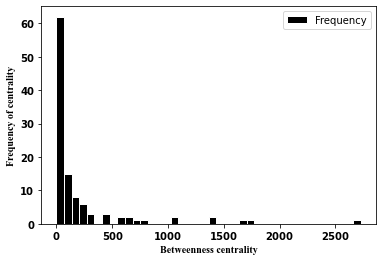

In [98]:
# between ness centrality 
keys, values1 = zip(*bet_centrality.items())
print(values1)
#betweenness centrality power law
plt.hist(values1, bins=40,color='black',edgecolor='white')
plt.xlabel('Betweenness centrality',fontname='Times New Roman',weight="bold")
plt.ylabel('Frequency of centrality',fontname='Times New Roman',weight="bold")
plt.legend(['Frequency'])
plt.savefig('Betweenness centrality.pdf') 
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [24]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=78dd46529135b0253815cb4f61fae8ca2b021972fafff425b1f85cdcadd97b72
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
